# <center> Bienes Raices - Mercado Australiano - Prediccion de Precios - Regresion Avanzada

# Tabla de Contenido

1. [Introduccion](#introduccion)
2. [Configuracion e Instalacion](#configuracion-e-instalacion)
3. [Entendimiento de los Datos](#entendimiento-de-los-datos)
4. [Manipulacion y Limpieza de Datos](#manipulacion-y-limpieza-de-datos)

5. [Analisis de Datos](#analisis-de-datos)

6. [Preparacion de Datos y Modelado](#preparacion-de-datos-y-modelado)
   
7. [Construccion-del-Modelo](#construccion-del-modelo)

8. [Conclusions y Observaciones](#conclusiones-y-observaciones)

##1. Introduccion

### Integrates de Grupo:
* ISRAEL ROSENDO SALINAS RAMIREZ
* JOSE GUSTAVO LAUREL COSSIO
* FRANZ ERICK MOLLERICONA PATTY
## Entendimiento del Negocio
Una empresa de vivienda con sede en EE. UU. llamada Surprise Housing ha decidido ingresar al mercado australiano. La empresa utiliza el análisis de datos para comprar casas a un precio inferior a sus valores reales y venderlas a un precio más alto. Con el mismo propósito, la empresa ha recopilado un conjunto de datos de la venta de casas en Australia. Los datos se proporcionan en el archivo CSV a continuación.

La compañía está buscando posibles propiedades para comprar e ingresar al mercado. Debe construir un modelo de regresión utilizando la regularización para predecir el valor real de las posibles propiedades y decidir si invertir en ellas o no.

La empresa quiere saber:

* Qué variables son significativas para predecir el precio de una casa, y
* Qué tan bien esas variables describen el precio de una casa.

Además, determine el valor óptimo de lambda para la regresión de Ridge y Lasso.

### Objetivo del Negocio:

Debe modelar el precio de las casas con las variables independientes disponibles. Luego, la gerencia utilizará este modelo para comprender cómo varían exactamente los precios con las variables. En consecuencia, pueden manipular la estrategia de la empresa y concentrarse en áreas que generarán altos rendimientos. Además, el modelo será una buena manera para que la gerencia entienda la dinámica de precios de un nuevo mercado.

## 2. Configuracion e Instalacion

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 3. Entendimiento de los Datos

* MSSubClass: Identifies the type of dwelling involved in the sale.
* MSZoning: Identifies the general zoning classification of the sale.
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access to property
* Alley: Type of alley access to property
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to various conditions
* Condition2: Proximity to various conditions (if more than one is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Rates the overall material and finish of the house
* OverallCond: Rates the overall condition of the house
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Evaluates the quality of the material on the exterior
* ExterCond: Evaluates the present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Evaluates the height of the basement
* BsmtCond: Evaluates the general condition of the basement
* BsmtExposure: Refers to walkout or garden level walls
* BsmtFinType1: Rating of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Rating of basement finished area (if multiple types)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet

* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
* Kitchen: Kitchens above grade
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality (Assume typical unless deductions are warranted)
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold (MM)
* YrSold: Year Sold (YYYY)
* SaleType: Type of sale
* SaleCondition: Condition of sale

















In [14]:
path = "../dataset/dataset.csv"
df=pd.read_csv(path)
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

## 4. Manipulacion y Limpieza de Datos

In [15]:
for col in df.columns:
    print(f"Column '{col}': {df[col].nunique()} unique values")

Column 'Id': 1460 unique values
Column 'MSSubClass': 15 unique values
Column 'MSZoning': 5 unique values
Column 'LotFrontage': 110 unique values
Column 'LotArea': 1073 unique values
Column 'Street': 2 unique values
Column 'Alley': 2 unique values
Column 'LotShape': 4 unique values
Column 'LandContour': 4 unique values
Column 'Utilities': 2 unique values
Column 'LotConfig': 5 unique values
Column 'LandSlope': 3 unique values
Column 'Neighborhood': 25 unique values
Column 'Condition1': 9 unique values
Column 'Condition2': 8 unique values
Column 'BldgType': 5 unique values
Column 'HouseStyle': 8 unique values
Column 'OverallQual': 10 unique values
Column 'OverallCond': 9 unique values
Column 'YearBuilt': 112 unique values
Column 'YearRemodAdd': 61 unique values
Column 'RoofStyle': 6 unique values
Column 'RoofMatl': 8 unique values
Column 'Exterior1st': 15 unique values
Column 'Exterior2nd': 16 unique values
Column 'MasVnrType': 3 unique values
Column 'MasVnrArea': 327 unique values
Column

In [16]:
missing_values = df.isnull().sum()
column_types = df.dtypes

missing_info = pd.DataFrame({'Missing Values': missing_values, 'Column Type': column_types})
print(missing_info[missing_info['Missing Values'] > 0])

              Missing Values Column Type
LotFrontage              259     float64
Alley                   1369      object
MasVnrType               872      object
MasVnrArea                 8     float64
BsmtQual                  37      object
BsmtCond                  37      object
BsmtExposure              38      object
BsmtFinType1              37      object
BsmtFinType2              38      object
Electrical                 1      object
FireplaceQu              690      object
GarageType                81      object
GarageYrBlt               81     float64
GarageFinish              81      object
GarageQual                81      object
GarageCond                81      object
PoolQC                  1453      object
Fence                   1179      object
MiscFeature             1406      object


In [17]:
categorical_cols_to_fill = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
df[categorical_cols_to_fill] = df[categorical_cols_to_fill].fillna('None')

In [18]:
numerical_cols_to_fill = ['MasVnrArea', 'GarageYrBlt']
df[numerical_cols_to_fill] = df[numerical_cols_to_fill].fillna(0)

In [19]:
electrical_mode = df['Electrical'].mode()[0]
df['Electrical'] = df['Electrical'].fillna(electrical_mode)

In [20]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [21]:
imputation_report = {}

categorical_cols_filled = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for col in categorical_cols_filled:
    imputation_report[col] = 'filled with "None"'

numerical_cols_filled_with_zero = ['MasVnrArea', 'GarageYrBlt']
for col in numerical_cols_filled_with_zero:
    imputation_report[col] = 'filled with 0'

imputation_report['Electrical'] = 'filled with mode'

imputation_report['LotFrontage'] = 'filled with median grouped by Neighborhood'

print("Imputation Report:")
for col, method in imputation_report.items():
    print(f"- '{col}': {method}")

Imputation Report:
- 'Alley': filled with "None"
- 'MasVnrType': filled with "None"
- 'BsmtQual': filled with "None"
- 'BsmtCond': filled with "None"
- 'BsmtExposure': filled with "None"
- 'BsmtFinType1': filled with "None"
- 'BsmtFinType2': filled with "None"
- 'FireplaceQu': filled with "None"
- 'GarageType': filled with "None"
- 'GarageFinish': filled with "None"
- 'GarageQual': filled with "None"
- 'GarageCond': filled with "None"
- 'PoolQC': filled with "None"
- 'Fence': filled with "None"
- 'MiscFeature': filled with "None"
- 'MasVnrArea': filled with 0
- 'GarageYrBlt': filled with 0
- 'Electrical': filled with mode
- 'LotFrontage': filled with median grouped by Neighborhood


In [22]:
imputed_cols = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrArea', 'GarageYrBlt', 'Electrical', 'LotFrontage']
remaining_missing_values = df[imputed_cols].isnull().sum()
print("Remaining missing values in imputed columns:")
print(remaining_missing_values[remaining_missing_values > 0])

Remaining missing values in imputed columns:
Series([], dtype: int64)


In [23]:
df = df.drop('Id', axis=1)
display(df.head())

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   
3          70       RL         60.0     9550   Pave  None      IR1   
4          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0   None  None        None   
1         Lvl    AllPub       FR2  ...        0   None  None        None   
2         Lvl    AllPub    Inside  ...        0   None  None        None   
3         Lvl    AllPub    Corner  ...        0   None  None        None   
4         Lvl    AllPub       FR2  ...        0   None  None        None   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [25]:
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
rows_after_dropping = df.shape[0]

duplicates_removed = initial_rows - rows_after_dropping

if duplicates_removed > 0:
    print(f"Se eliminaron {duplicates_removed} filas duplicadas.")
else:
    print("No existen filas duplicadas en el dataset.")

display(df.head())

No existen filas duplicadas en el dataset.


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   
3          70       RL         60.0     9550   Pave  None      IR1   
4          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0   None  None        None   
1         Lvl    AllPub       FR2  ...        0   None  None        None   
2         Lvl    AllPub    Inside  ...        0   None  None        None   
3         Lvl    AllPub    Corner  ...        0   None  None        None   
4         Lvl    AllPub       FR2  ...        0   None  None        None   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

##5. Analisis de Datos



In [26]:
pd.set_option('display.max_columns', None)
display(df.describe())

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.199658   10516.828082     6.099315     5.575342   
std      42.300571    22.431902    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    70.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315   
std      30.202904     20.645407   180.731373   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean       2.866438      1.046575      6.517808     0.613014  1868.739726   
std        0.815778      0.220338      1.625393     0.644666   453.697295   
min        0.000000      0.000000      2.000000     0.000000     0.000000   
25%        2.000000      1.000000      5.000000     0.000000  1958.000000   
50%        3.000000      1.000000      6.000000     1.000000  1977.000000   
75%        3.000000      1.000000      7.000000     1.000000  2001.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

### Matriz de correlacion de caracterisictas numericas

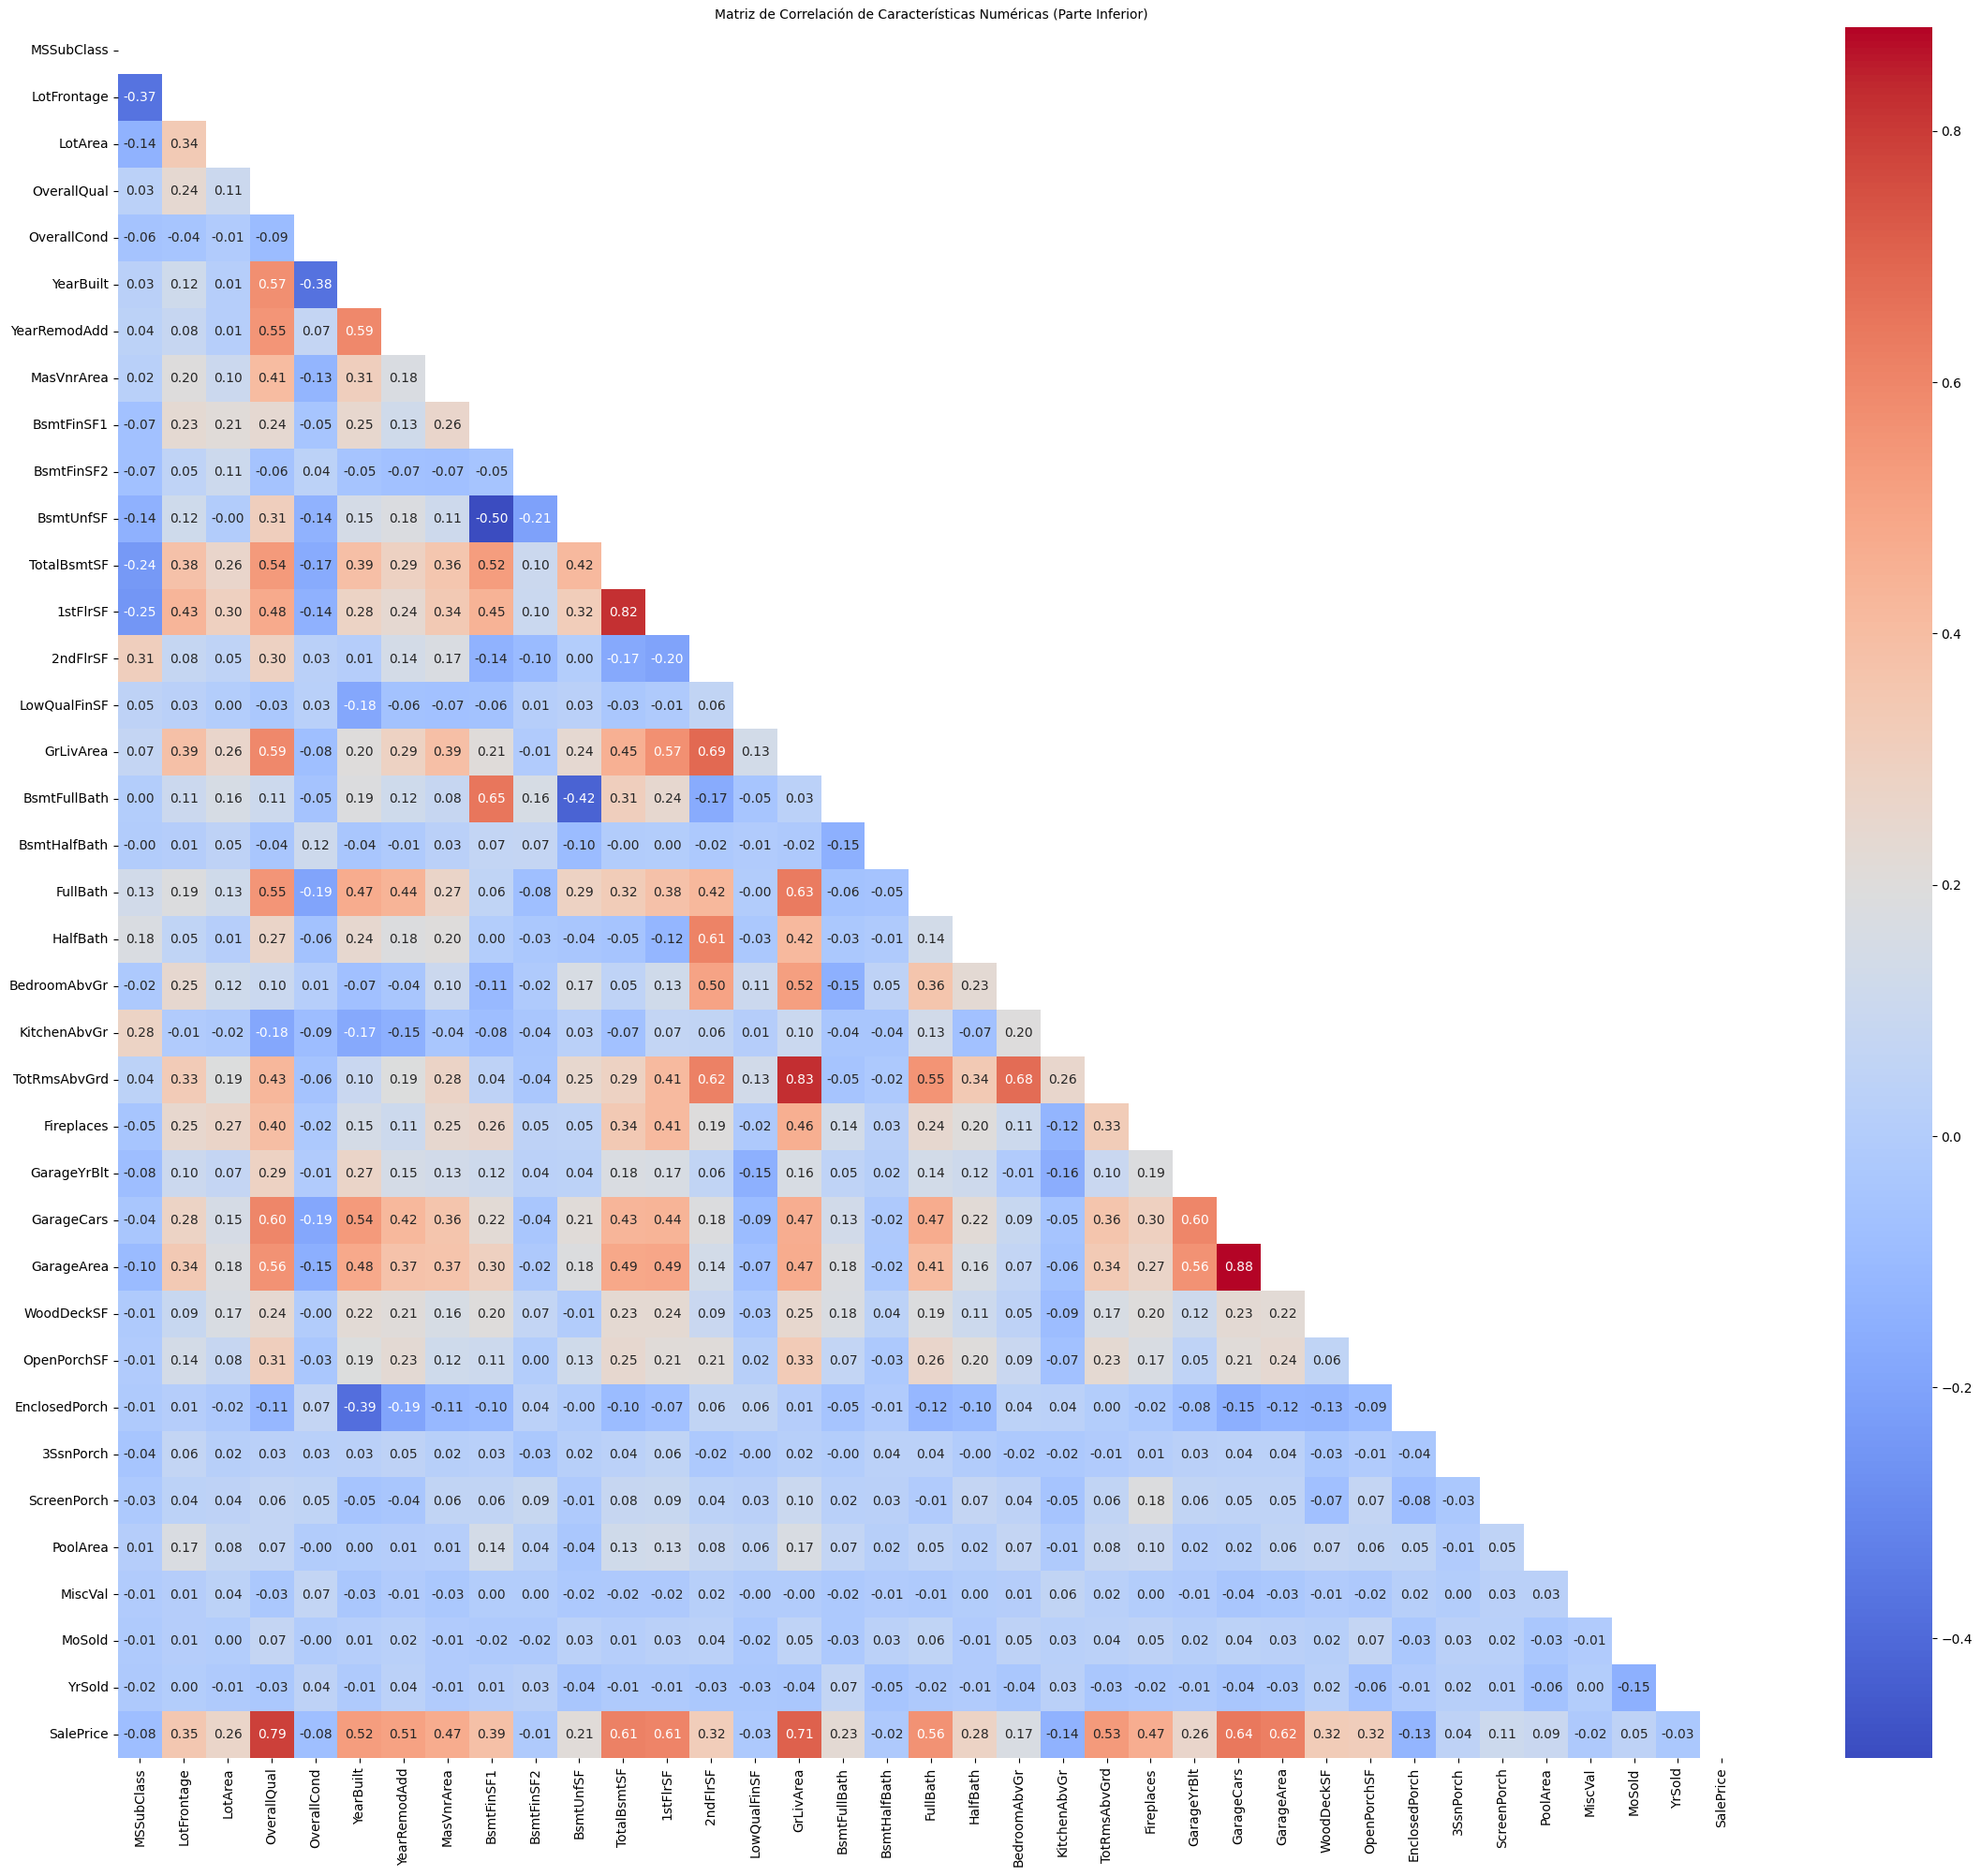

In [27]:
correlation_matrix = df.corr(numeric_only=True)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(28, 24))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación de Características Numéricas (Parte Inferior)', fontsize=10)
plt.show()

### Distribucion de SalePrice

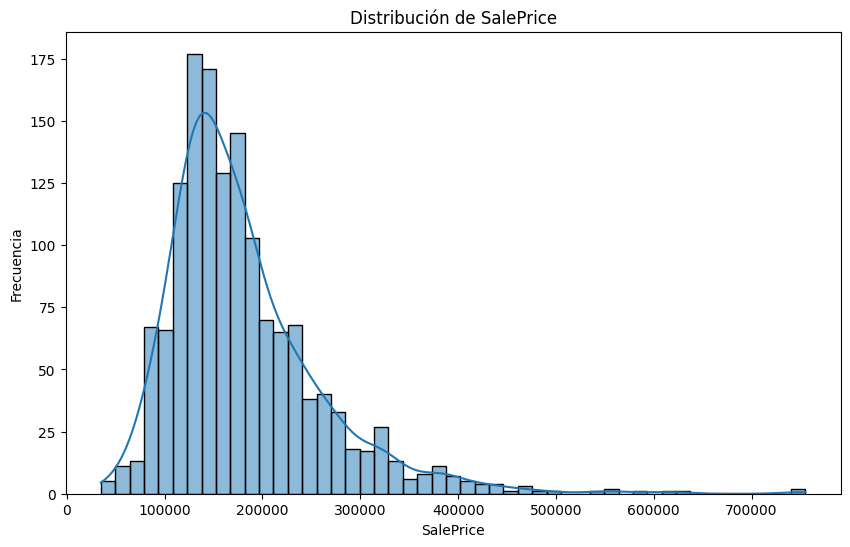

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribución de SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')
plt.show()

### Valores unicos para las variables categoricas

In [29]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'MSZoning': ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in column 'Street': ['Pave' 'Grvl']
Unique values in column 'Alley': ['None' 'Grvl' 'Pave']
Unique values in column 'LotShape': ['Reg' 'IR1' 'IR2' 'IR3']
Unique values in column 'LandContour': ['Lvl' 'Bnk' 'Low' 'HLS']
Unique values in column 'Utilities': ['AllPub' 'NoSeWa']
Unique values in column 'LotConfig': ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Unique values in column 'LandSlope': ['Gtl' 'Mod' 'Sev']
Unique values in column 'Neighborhood': ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Unique values in column 'Condition1': ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Unique values in column 'Condition2': ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Unique values i

### Histograma de las variables categoricas

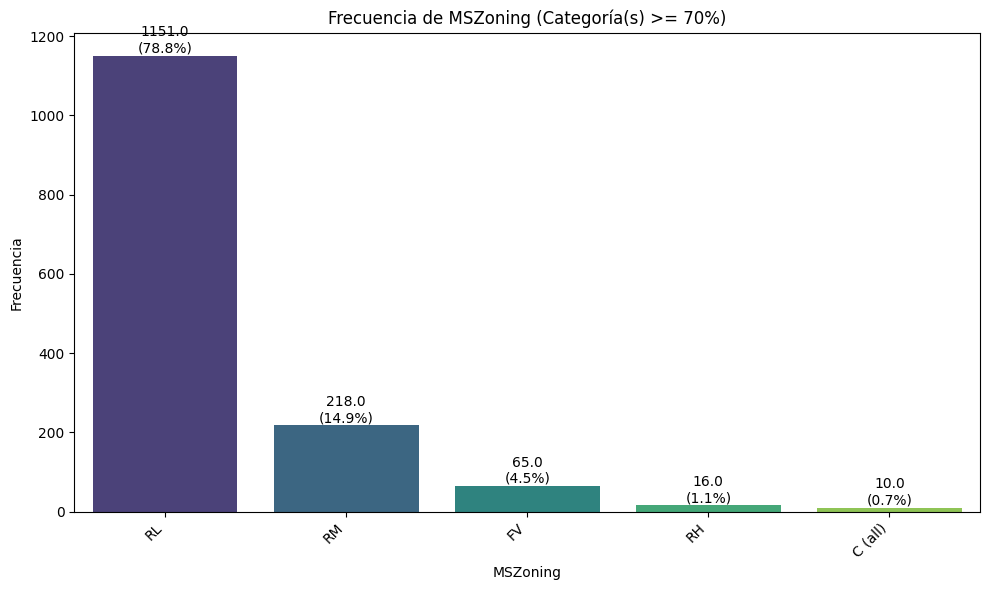

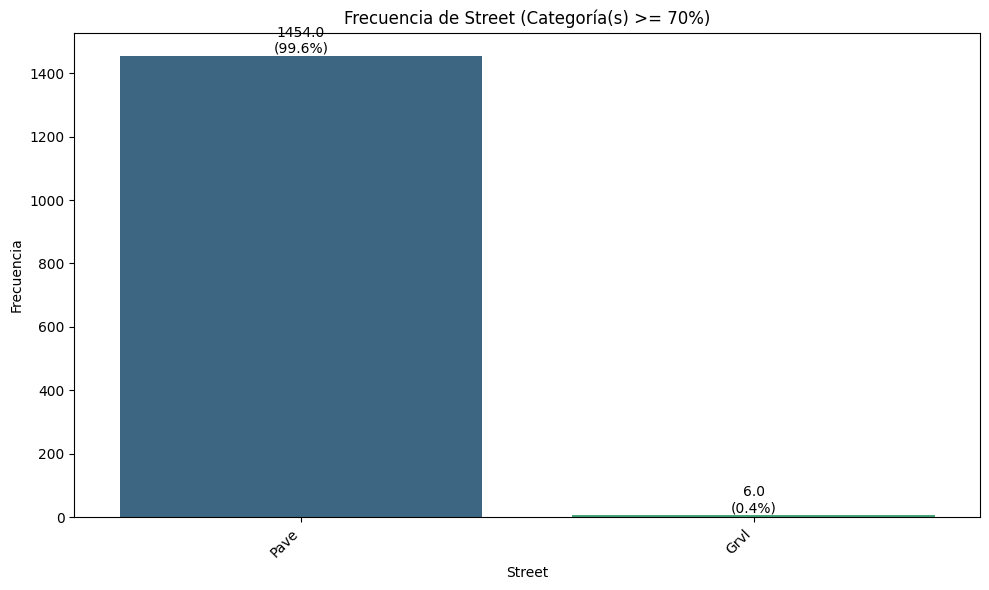

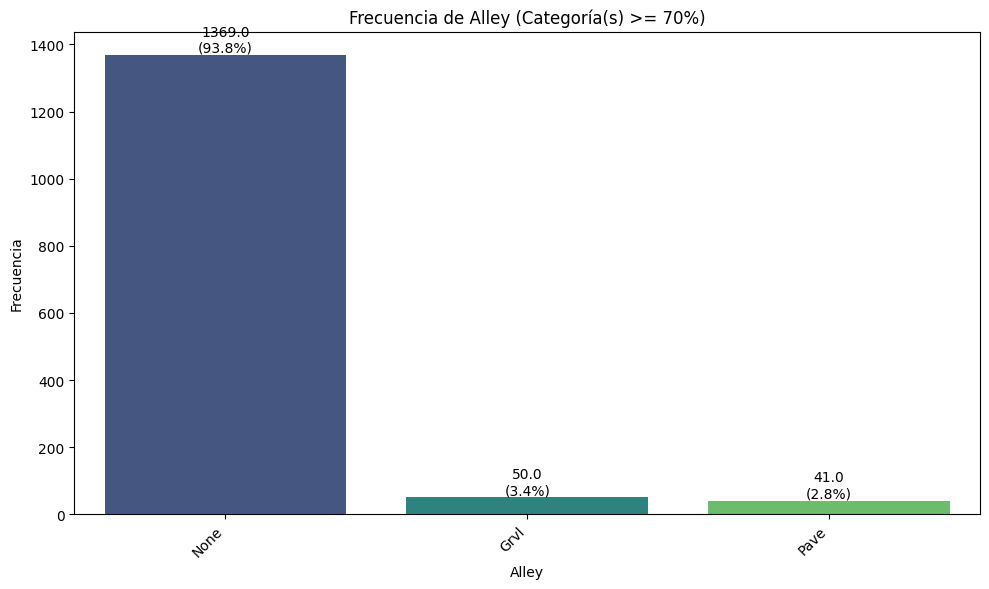

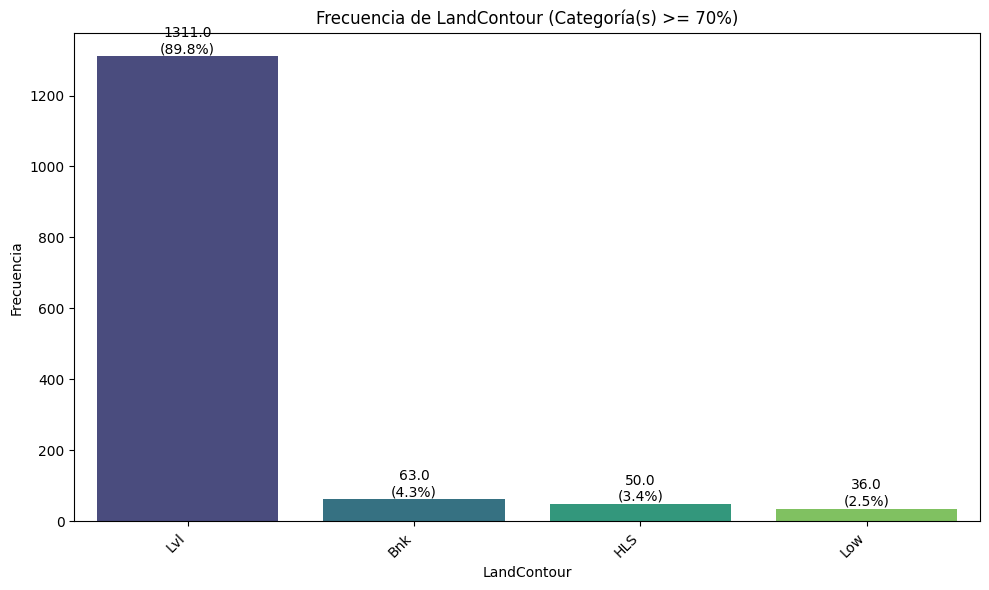

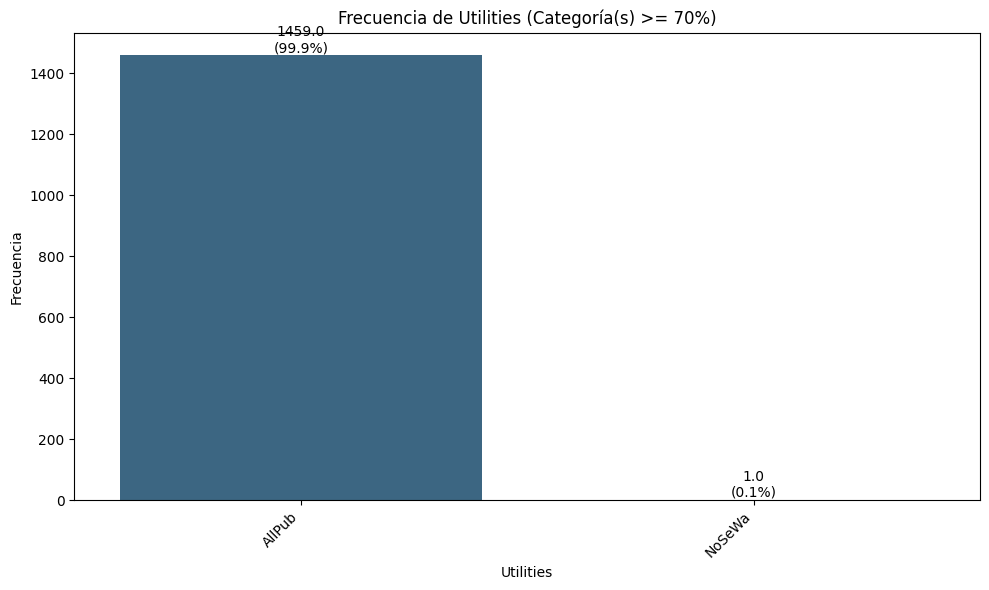

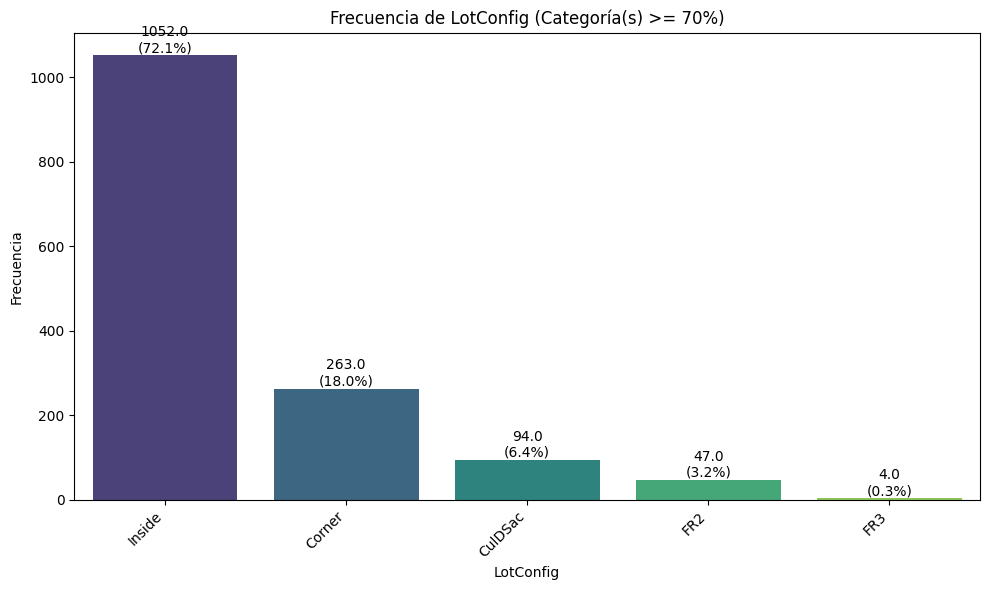

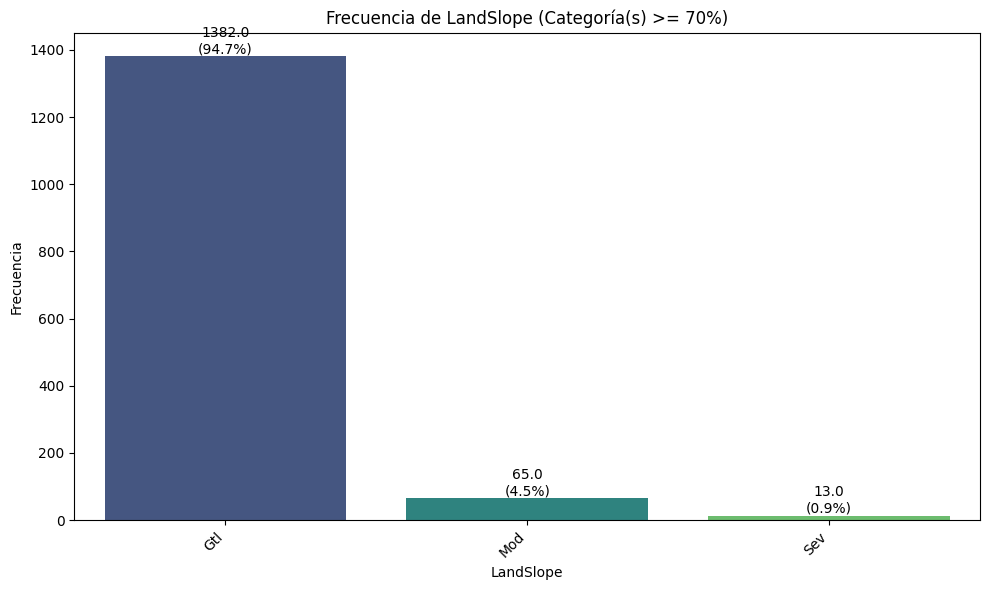

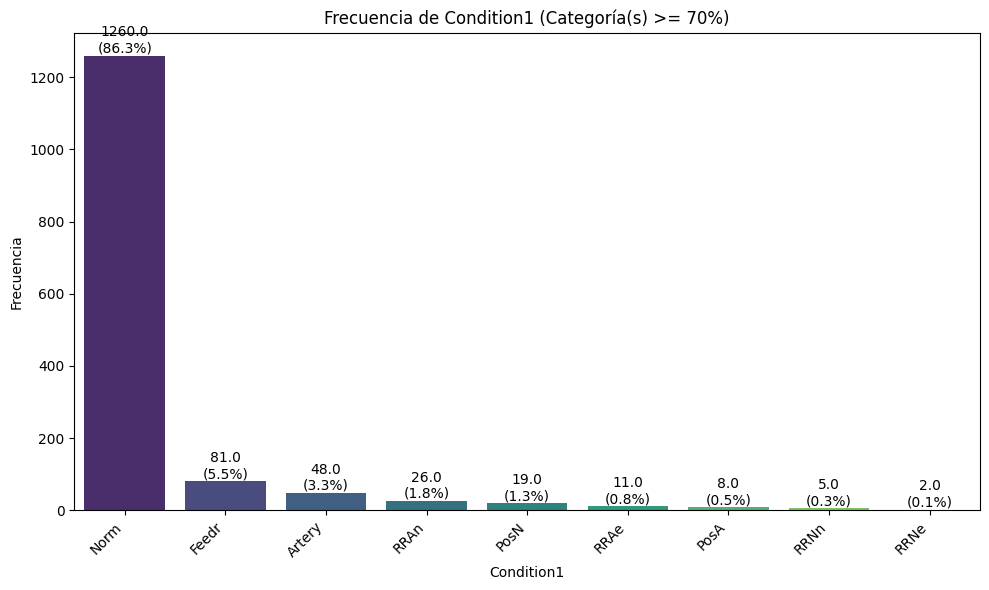

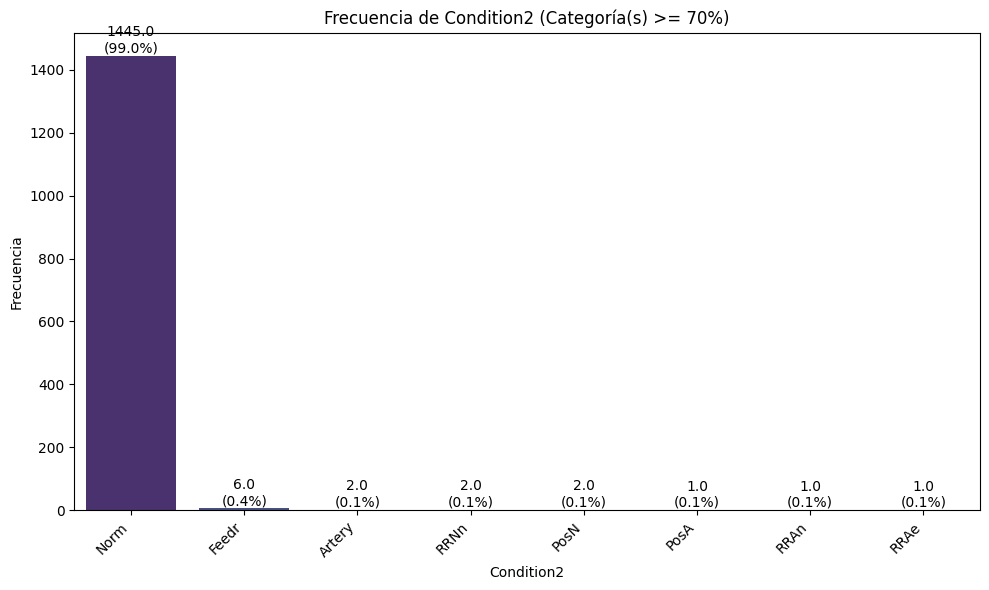

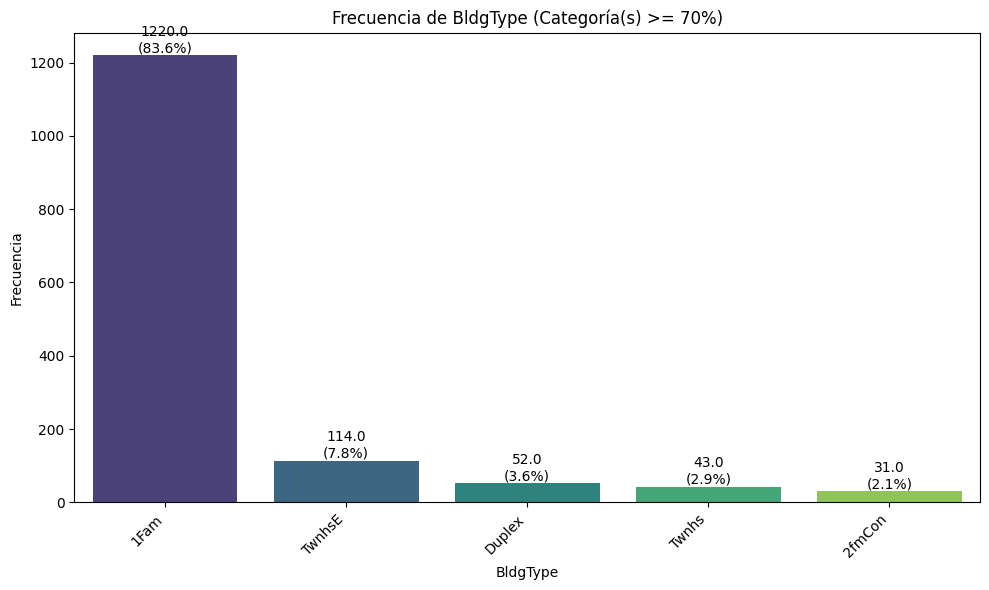

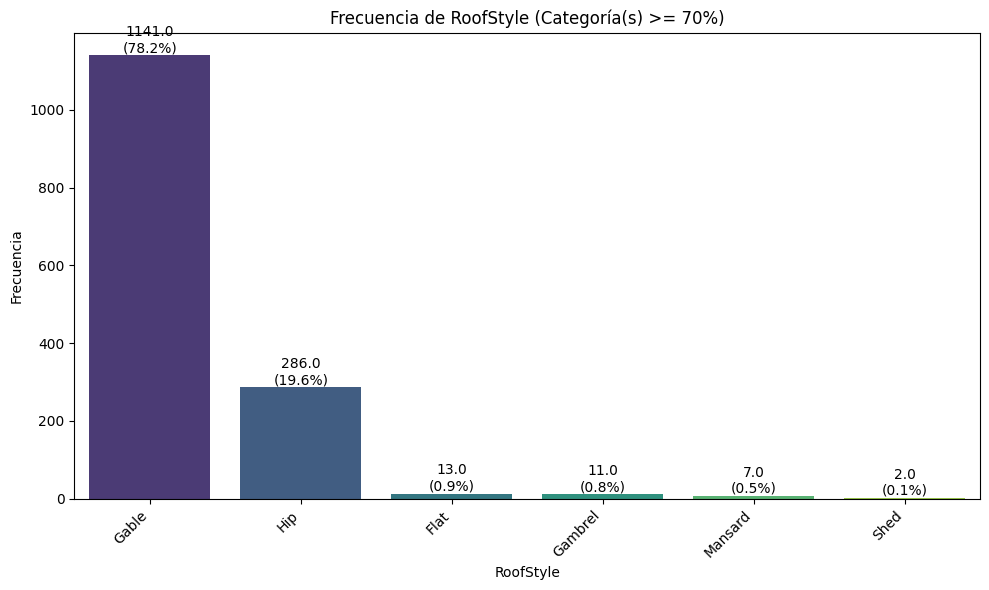

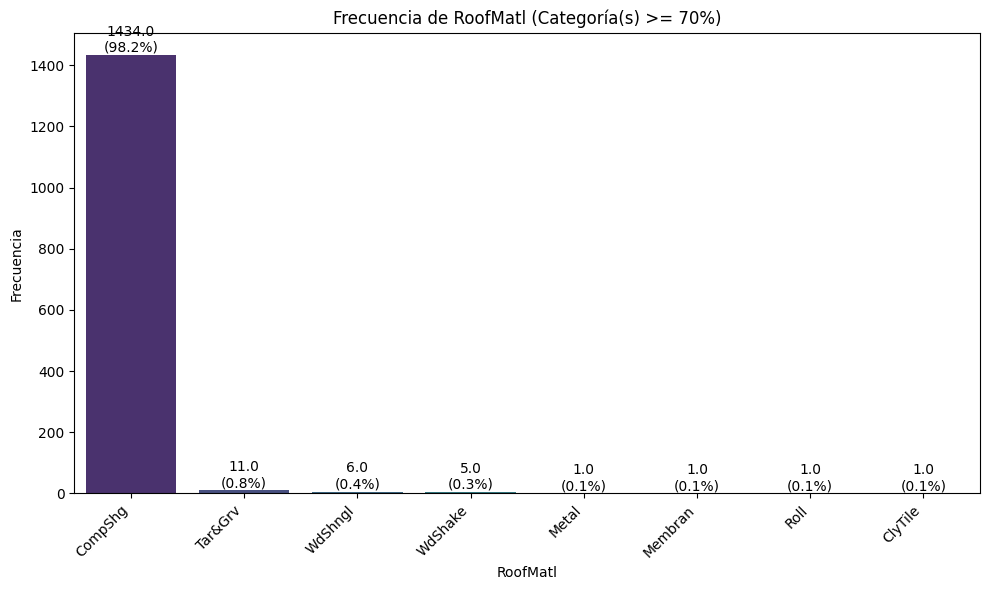

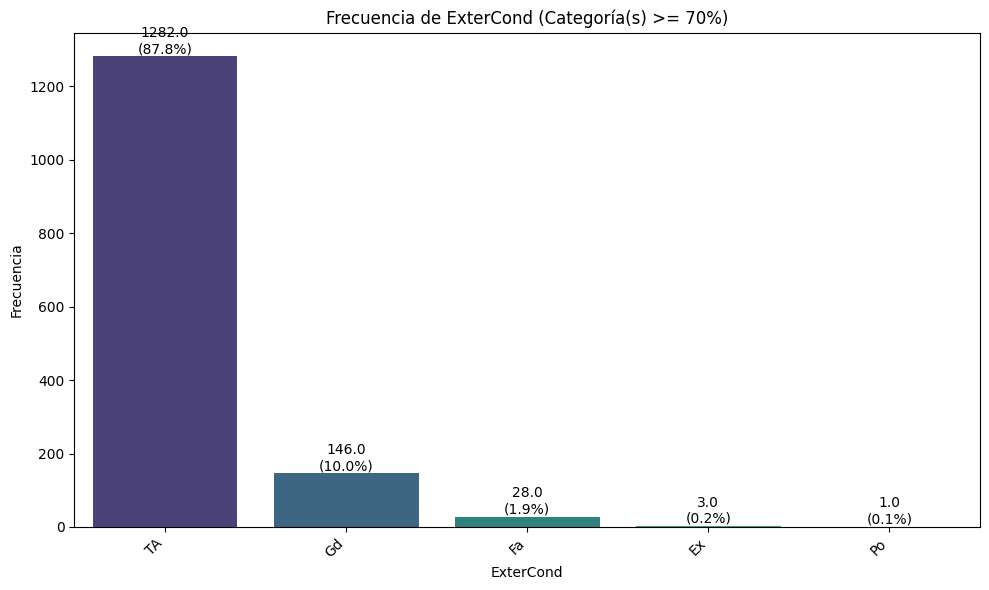

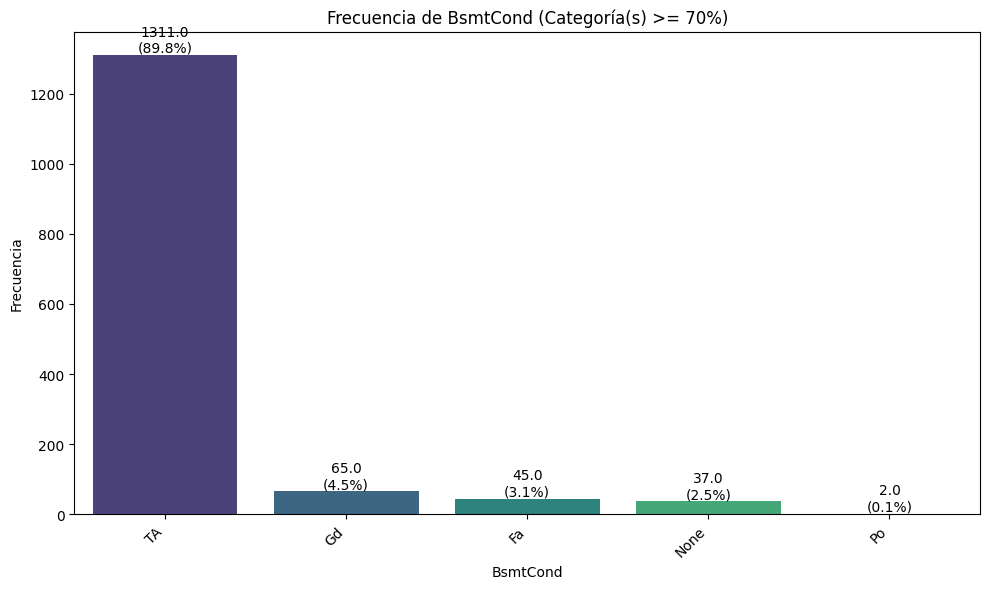

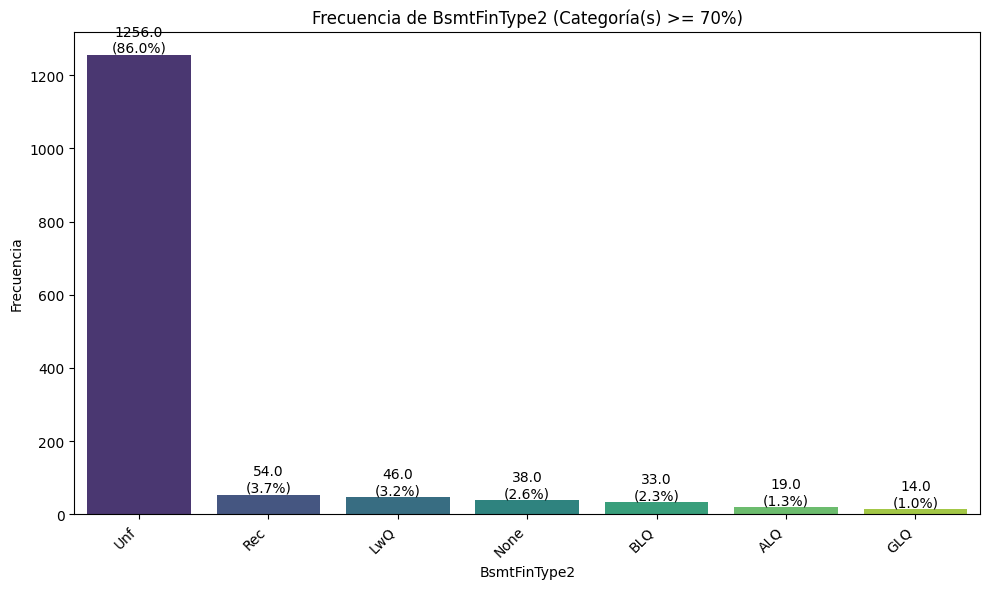

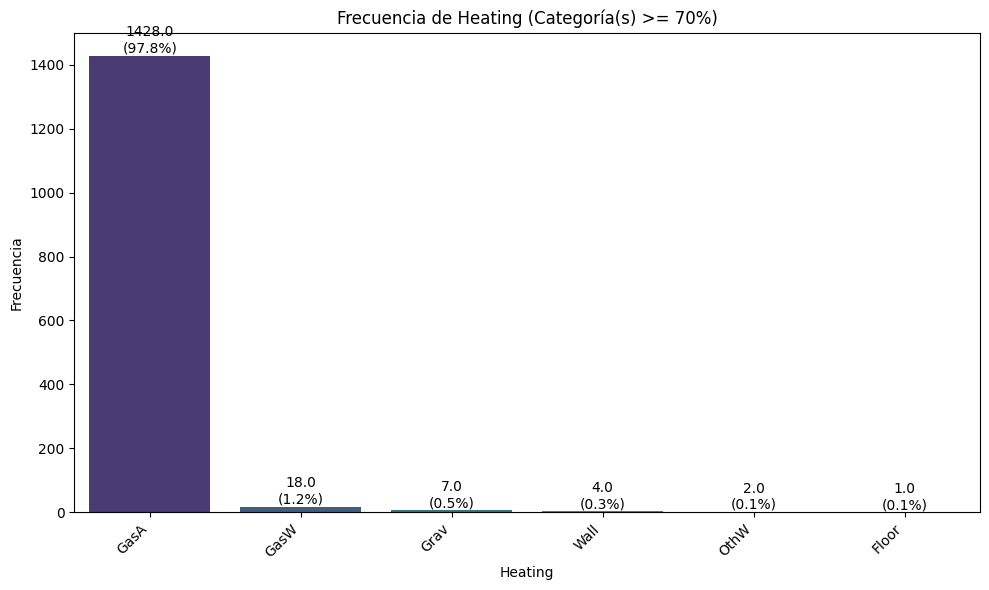

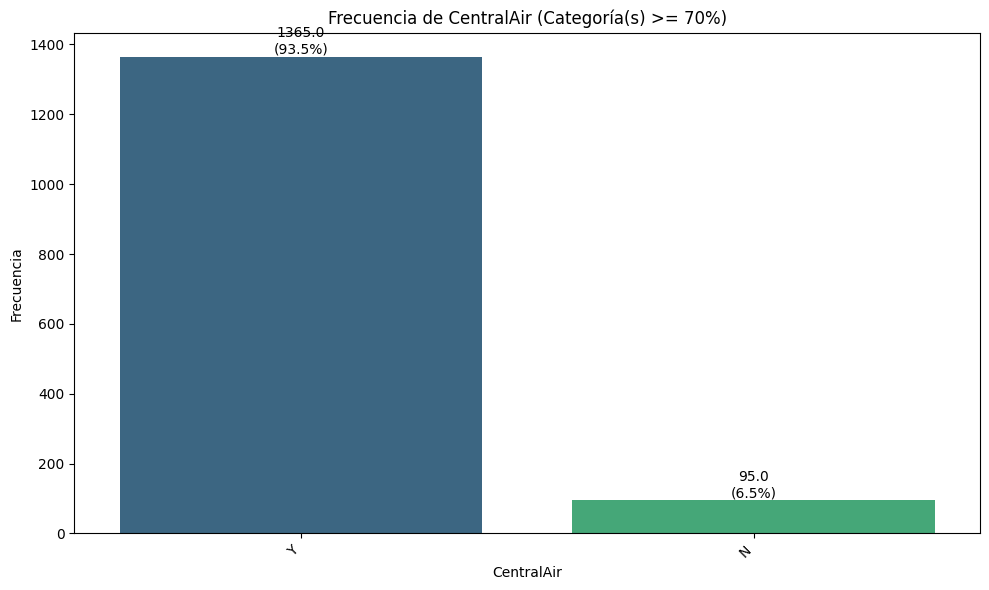

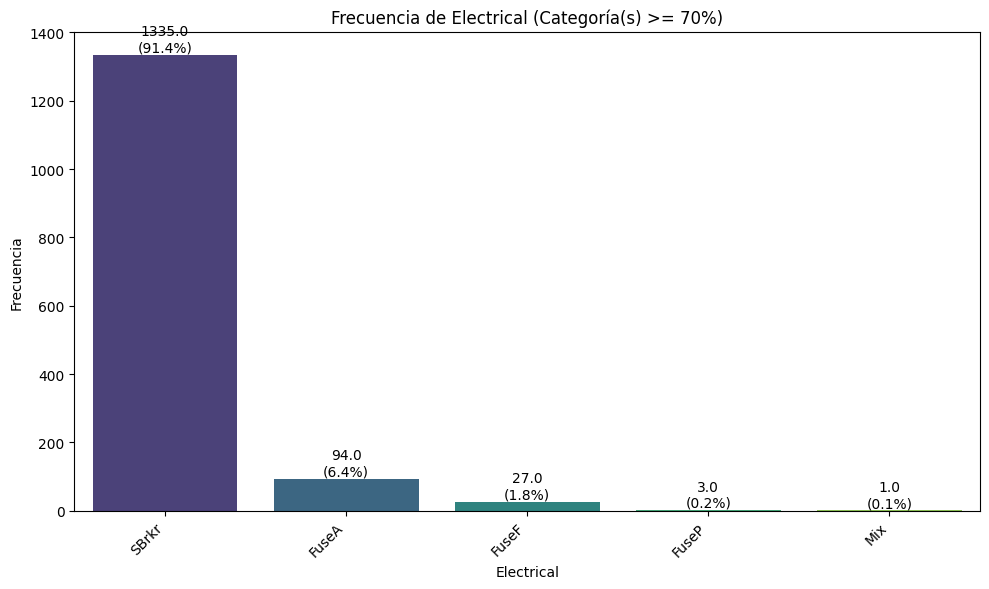

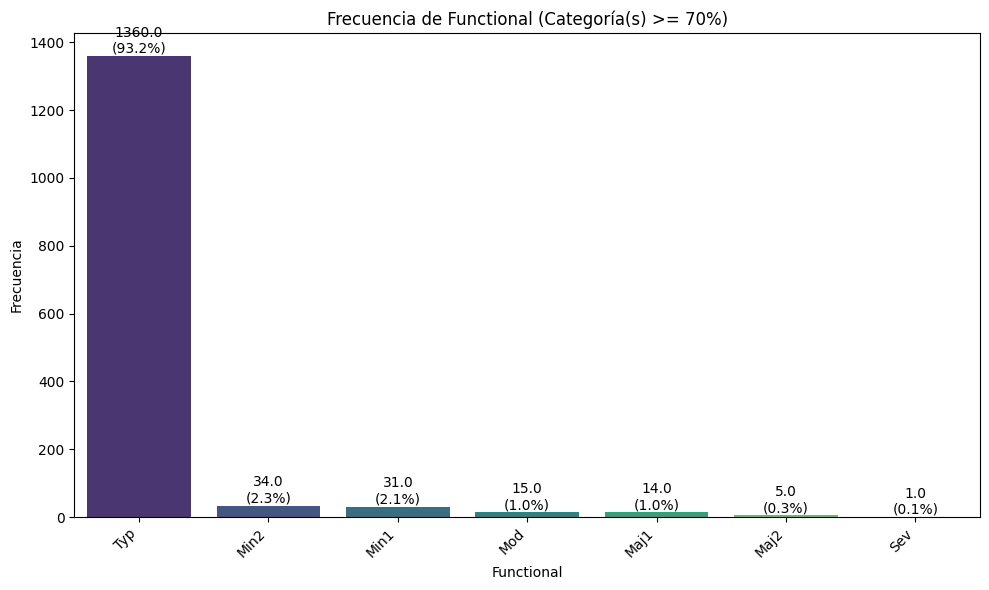

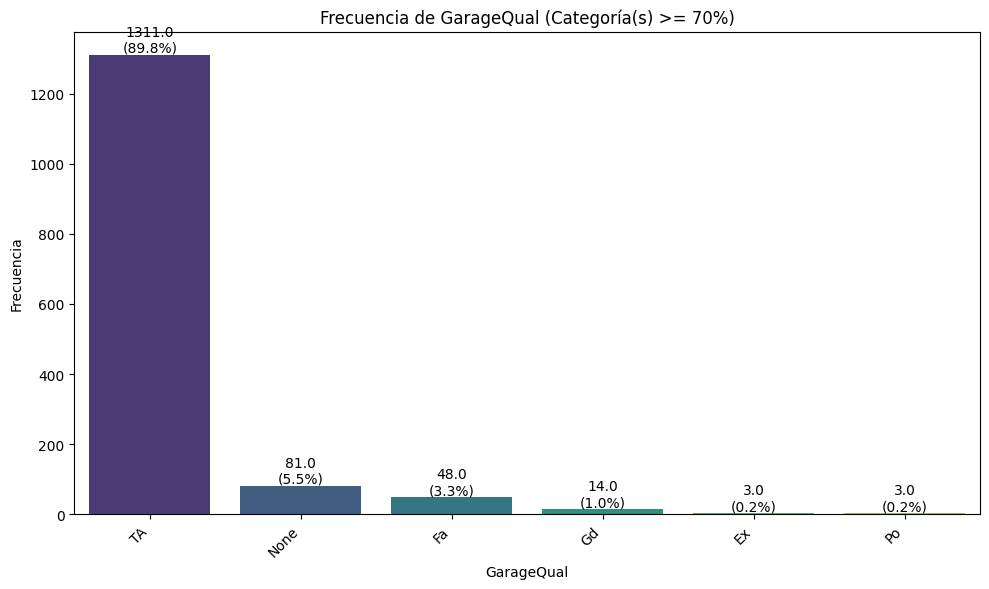

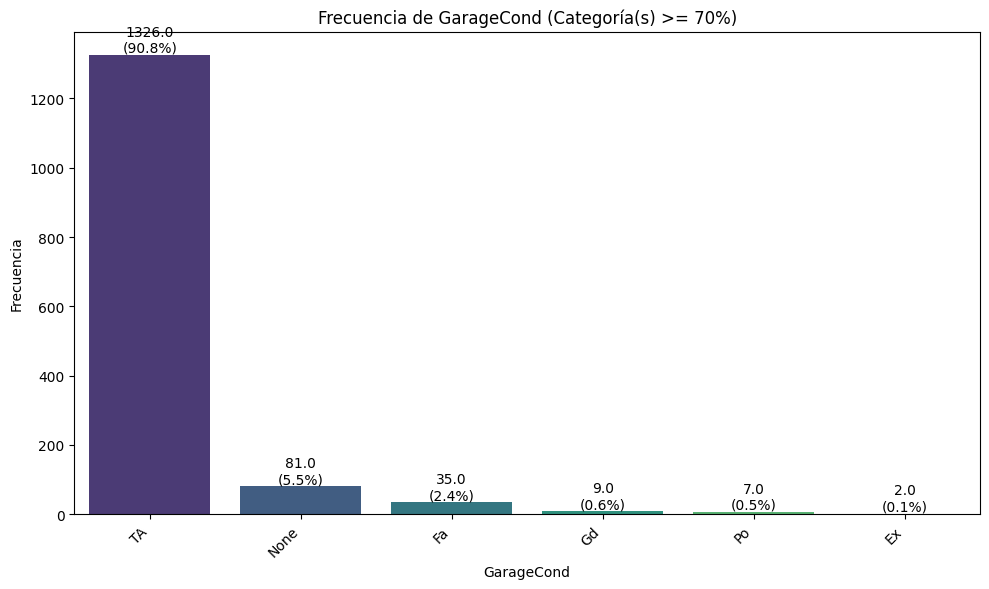

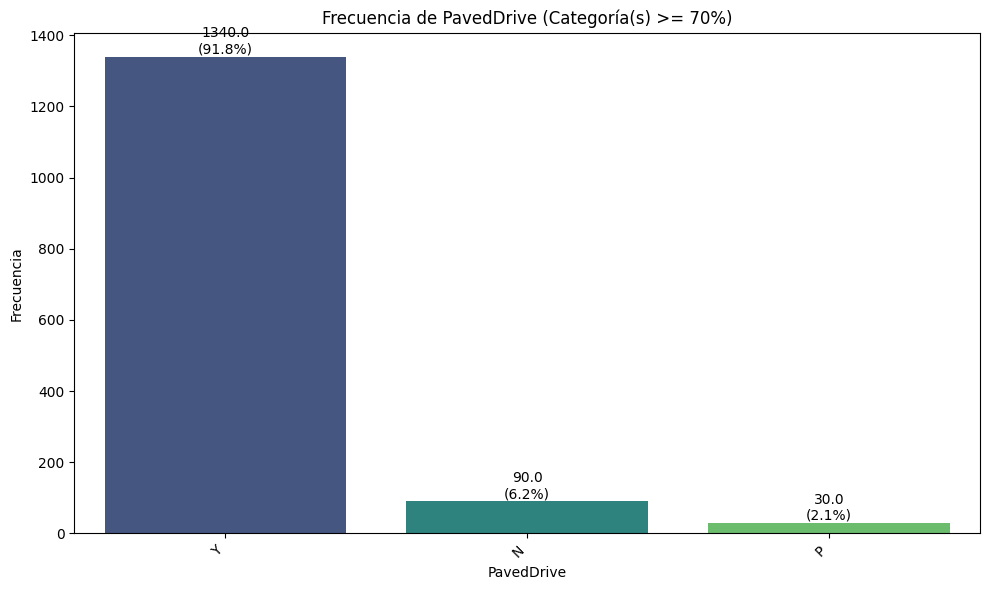

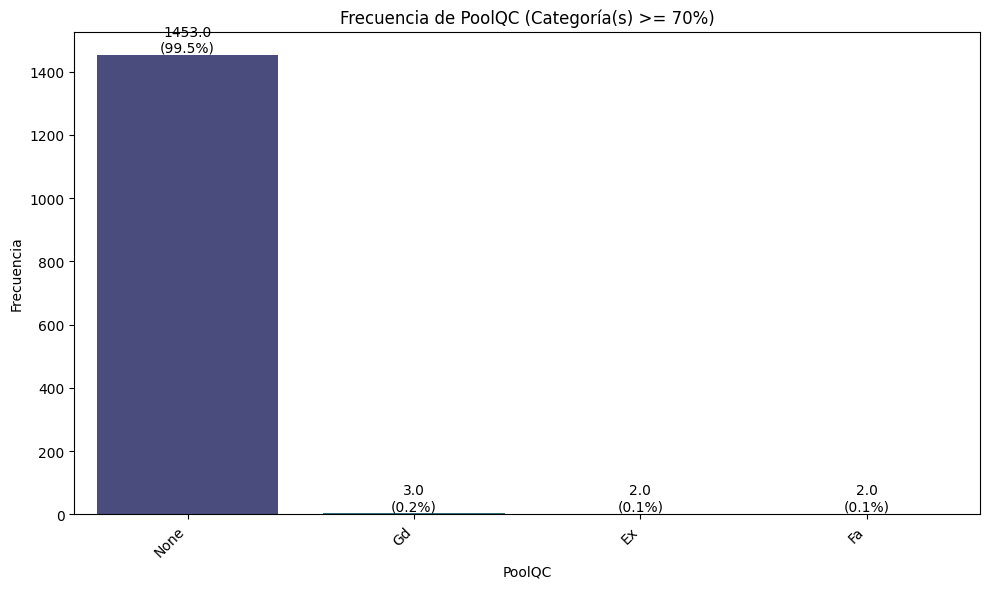

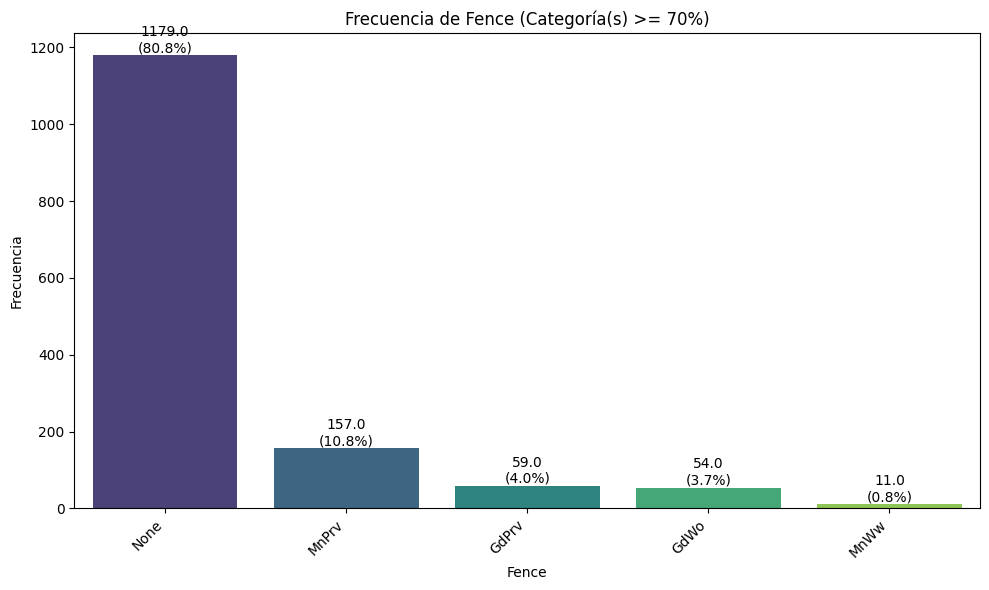

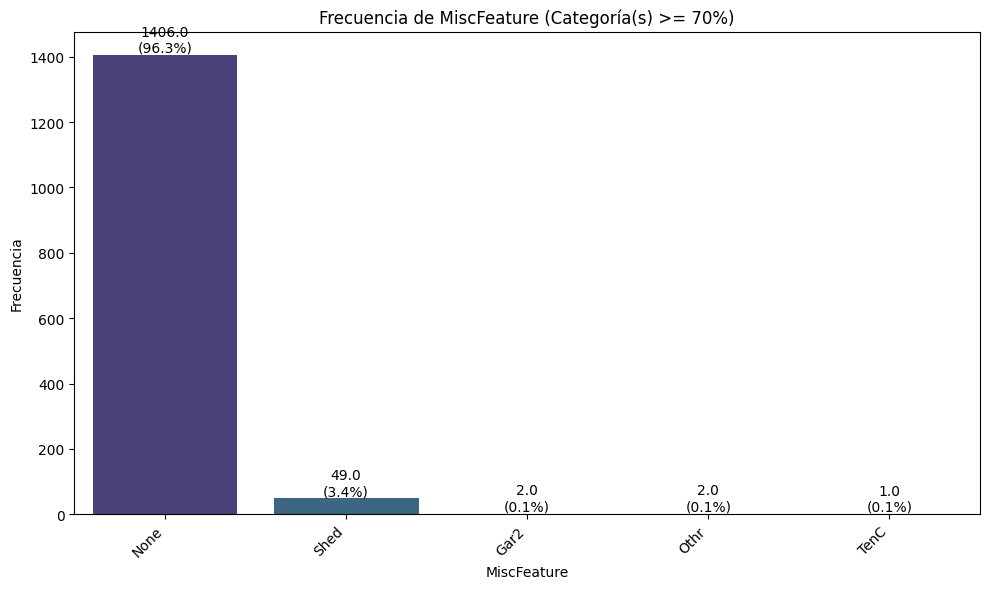

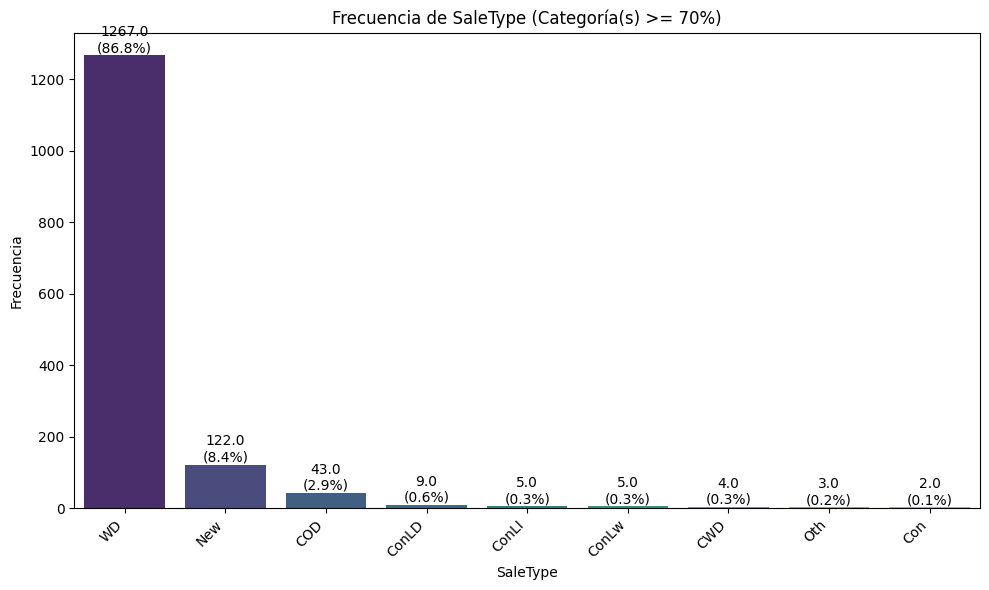

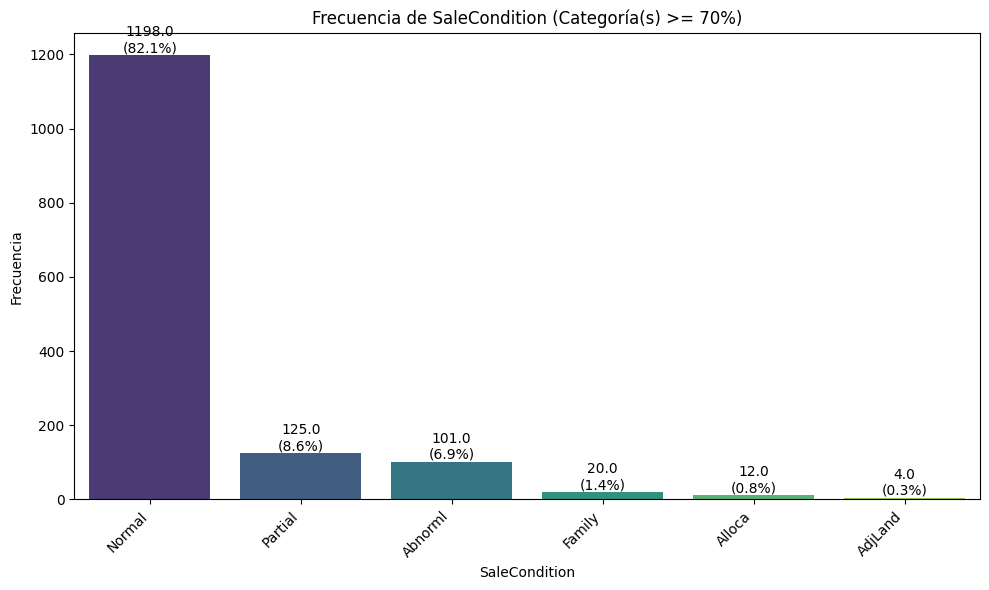

In [30]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    frequency = df[col].value_counts(normalize=True) * 100
    if (frequency >= 70).any():
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')

        # Add annotations for count and percentage
        total = len(df)
        for p in ax.patches:
            count = p.get_height()
            percentage = '{:.1f}%'.format(100 * count / total)
            x = p.get_x() + p.get_width() / 2
            y = count
            ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom', fontsize=10, color='black')


        plt.title(f'Frecuencia de {col} (Categoría(s) >= 70%)')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

In [31]:
categorical_cols = df.select_dtypes(include='object').columns

print("Frecuencias y Porcentajes para Columnas Categóricas con una Categoría >= 70%:")
print("-" * 80)

for col in categorical_cols:
    frequency = df[col].value_counts(normalize=True) * 100
    if (frequency >= 70).any():
        counts = df[col].value_counts()
        percentages = df[col].value_counts(normalize=True) * 100

        frequency_table = pd.DataFrame({
            'Count': counts,
            'Percentage': percentages.round(2)
        })

        print(f"\nColumna: '{col}'")
        display(frequency_table)
        print("-" * 30)

Frecuencias y Porcentajes para Columnas Categóricas con una Categoría >= 70%:
--------------------------------------------------------------------------------

Columna: 'MSZoning'


Count  Percentage
MSZoning                   
RL         1151       78.84
RM          218       14.93
FV           65        4.45
RH           16        1.10
C (all)      10        0.68

------------------------------

Columna: 'Street'


Count  Percentage
Street                   
Pave     1454       99.59
Grvl        6        0.41

------------------------------

Columna: 'Alley'


Count  Percentage
Alley                   
None    1369       93.77
Grvl      50        3.42
Pave      41        2.81

------------------------------

Columna: 'LandContour'


Count  Percentage
LandContour                   
Lvl           1311       89.79
Bnk             63        4.32
HLS             50        3.42
Low             36        2.47

------------------------------

Columna: 'Utilities'


Count  Percentage
Utilities                   
AllPub      1459       99.93
NoSeWa         1        0.07

------------------------------

Columna: 'LotConfig'


Count  Percentage
LotConfig                   
Inside      1052       72.05
Corner       263       18.01
CulDSac       94        6.44
FR2           47        3.22
FR3            4        0.27

------------------------------

Columna: 'LandSlope'


Count  Percentage
LandSlope                   
Gtl         1382       94.66
Mod           65        4.45
Sev           13        0.89

------------------------------

Columna: 'Condition1'


Count  Percentage
Condition1                   
Norm         1260       86.30
Feedr          81        5.55
Artery         48        3.29
RRAn           26        1.78
PosN           19        1.30
RRAe           11        0.75
PosA            8        0.55
RRNn            5        0.34
RRNe            2        0.14

------------------------------

Columna: 'Condition2'


Count  Percentage
Condition2                   
Norm         1445       98.97
Feedr           6        0.41
Artery          2        0.14
RRNn            2        0.14
PosN            2        0.14
PosA            1        0.07
RRAn            1        0.07
RRAe            1        0.07

------------------------------

Columna: 'BldgType'


Count  Percentage
BldgType                   
1Fam       1220       83.56
TwnhsE      114        7.81
Duplex       52        3.56
Twnhs        43        2.95
2fmCon       31        2.12

------------------------------

Columna: 'RoofStyle'


Count  Percentage
RoofStyle                   
Gable       1141       78.15
Hip          286       19.59
Flat          13        0.89
Gambrel       11        0.75
Mansard        7        0.48
Shed           2        0.14

------------------------------

Columna: 'RoofMatl'


Count  Percentage
RoofMatl                   
CompShg    1434       98.22
Tar&Grv      11        0.75
WdShngl       6        0.41
WdShake       5        0.34
Metal         1        0.07
Membran       1        0.07
Roll          1        0.07
ClyTile       1        0.07

------------------------------

Columna: 'ExterCond'


Count  Percentage
ExterCond                   
TA          1282       87.81
Gd           146       10.00
Fa            28        1.92
Ex             3        0.21
Po             1        0.07

------------------------------

Columna: 'BsmtCond'


Count  Percentage
BsmtCond                   
TA         1311       89.79
Gd           65        4.45
Fa           45        3.08
None         37        2.53
Po            2        0.14

------------------------------

Columna: 'BsmtFinType2'


Count  Percentage
BsmtFinType2                   
Unf            1256       86.03
Rec              54        3.70
LwQ              46        3.15
None             38        2.60
BLQ              33        2.26
ALQ              19        1.30
GLQ              14        0.96

------------------------------

Columna: 'Heating'


Count  Percentage
Heating                   
GasA      1428       97.81
GasW        18        1.23
Grav         7        0.48
Wall         4        0.27
OthW         2        0.14
Floor        1        0.07

------------------------------

Columna: 'CentralAir'


Count  Percentage
CentralAir                   
Y            1365       93.49
N              95        6.51

------------------------------

Columna: 'Electrical'


Count  Percentage
Electrical                   
SBrkr        1335       91.44
FuseA          94        6.44
FuseF          27        1.85
FuseP           3        0.21
Mix             1        0.07

------------------------------

Columna: 'Functional'


Count  Percentage
Functional                   
Typ          1360       93.15
Min2           34        2.33
Min1           31        2.12
Mod            15        1.03
Maj1           14        0.96
Maj2            5        0.34
Sev             1        0.07

------------------------------

Columna: 'GarageQual'


Count  Percentage
GarageQual                   
TA           1311       89.79
None           81        5.55
Fa             48        3.29
Gd             14        0.96
Ex              3        0.21
Po              3        0.21

------------------------------

Columna: 'GarageCond'


Count  Percentage
GarageCond                   
TA           1326       90.82
None           81        5.55
Fa             35        2.40
Gd              9        0.62
Po              7        0.48
Ex              2        0.14

------------------------------

Columna: 'PavedDrive'


Count  Percentage
PavedDrive                   
Y            1340       91.78
N              90        6.16
P              30        2.05

------------------------------

Columna: 'PoolQC'


Count  Percentage
PoolQC                   
None     1453       99.52
Gd          3        0.21
Ex          2        0.14
Fa          2        0.14

------------------------------

Columna: 'Fence'


Count  Percentage
Fence                   
None    1179       80.75
MnPrv    157       10.75
GdPrv     59        4.04
GdWo      54        3.70
MnWw      11        0.75

------------------------------

Columna: 'MiscFeature'


Count  Percentage
MiscFeature                   
None          1406       96.30
Shed            49        3.36
Gar2             2        0.14
Othr             2        0.14
TenC             1        0.07

------------------------------

Columna: 'SaleType'


Count  Percentage
SaleType                   
WD         1267       86.78
New         122        8.36
COD          43        2.95
ConLD         9        0.62
ConLI         5        0.34
ConLw         5        0.34
CWD           4        0.27
Oth           3        0.21
Con           2        0.14

------------------------------

Columna: 'SaleCondition'


Count  Percentage
SaleCondition                   
Normal          1198       82.05
Partial          125        8.56
Abnorml          101        6.92
Family            20        1.37
Alloca            12        0.82
AdjLand            4        0.27

------------------------------


### Manejo de valores no mapeados

In [32]:
# ------------------------------------------------------------
# Código completo de preprocesamiento del dataset para ML
# CORREGIDO: Manejo de valores no mapeados con fillna
# ------------------------------------------------------------

# PASO 1: ELIMINAR COLUMNAS CON MUY BAJA VARIABILIDAD
cols_to_drop = ['Utilities', 'Condition2', 'RoofMatl', 'PoolQC']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors='ignore')

# PASO 2: BINARIZACIONES (Variables con dos clases donde una domina)

# Street: 1 si pavimentado (Pave), 0 si grava (Grvl)
if 'Street' in df.columns:
    df['Street_Paved'] = df['Street'].apply(lambda x: 1 if x == 'Pave' else 0)
    df = df.drop(columns=['Street'])

# Alley: 1 si tiene alley (Grvl o Pave), 0 si no tiene (None)
if 'Alley' in df.columns:
    df['Alley_Present'] = df['Alley'].apply(lambda x: 0 if x == 'None' else 1)
    df = df.drop(columns=['Alley'])

# LandSlope: 1 si pendiente suave (Gtl), 0 si moderada o severa (Mod/Sev)
if 'LandSlope' in df.columns:
    df['LandSlope_Gtl'] = df['LandSlope'].apply(lambda x: 1 if x == 'Gtl' else 0)
    df = df.drop(columns=['LandSlope'])

# Heating: 1 si GasA (gas forzado aire), 0 si otro tipo
if 'Heating' in df.columns:
    df['GasA'] = df['Heating'].apply(lambda x: 1 if x == 'GasA' else 0)
    df = df.drop(columns=['Heating'])

# CentralAir: 1 si tiene aire acondicionado central (Y), 0 si no (N)
if 'CentralAir' in df.columns:
    df['CentralAir'] = df['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)

# Electrical: 1 si sistema eléctrico estándar (SBrkr), 0 si otro
if 'Electrical' in df.columns:
    df['EstElec'] = df['Electrical'].apply(lambda x: 1 if x == 'SBrkr' else 0)
    df = df.drop(columns=['Electrical'])

# PavedDrive: 1 si entrada pavimentada (Y), 0 si no o parcial (N/P)
if 'PavedDrive' in df.columns:
    df['PavedDrive_Y'] = df['PavedDrive'].apply(lambda x: 1 if x == 'Y' else 0)
    df = df.drop(columns=['PavedDrive'])

# Fence: 1 si tiene cerca, 0 si no tiene (None)
if 'Fence' in df.columns:
    fence_values = ['MnPrv', 'GdPrv', 'GdWo', 'MnWw']
    df['Fence_Present'] = df['Fence'].apply(lambda x: 1 if x in fence_values else 0)
    df = df.drop(columns=['Fence'])

# MiscFeature: crear variable Shed (1 si tiene cobertizo, 0 si no)
if 'MiscFeature' in df.columns:
    df['Shed'] = df['MiscFeature'].apply(lambda x: 1 if x == 'Shed' else 0)
    df = df.drop(columns=['MiscFeature'])

# PASO 3: CODIFICACIÓN ORDINAL (Variables con jerarquía clara de calidad/estado)
# IMPORTANTE: Agregar fillna(0) después de map() para manejar valores no contemplados

# LotShape: regularidad del lote
lotshape_map = {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}
if 'LotShape' in df.columns:
    df['LotShape'] = df['LotShape'].map(lotshape_map).fillna(0).astype(int)

# ExterQual: calidad del material exterior
exter_qual_map = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
if 'ExterQual' in df.columns:
    df['ExterQual'] = df['ExterQual'].map(exter_qual_map).fillna(0).astype(int)

# ExterCond: condición actual del material exterior
if 'ExterCond' in df.columns:
    df['ExterCond'] = df['ExterCond'].map(exter_qual_map).fillna(0).astype(int)

# BsmtQual: altura del sótano (calidad estructural)
bsmt_qual_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
if 'BsmtQual' in df.columns:
    df['BsmtQual'] = df['BsmtQual'].map(bsmt_qual_map).fillna(0).astype(int)

# BsmtCond: condición general del sótano
bsmt_cond_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
if 'BsmtCond' in df.columns:
    df['BsmtCond'] = df['BsmtCond'].map(bsmt_cond_map).fillna(0).astype(int)

# BsmtExposure: nivel de exposición de paredes del sótano
bsmt_exposure_map = {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
if 'BsmtExposure' in df.columns:
    df['BsmtExposure'] = df['BsmtExposure'].map(bsmt_exposure_map).fillna(0).astype(int)

# BsmtFinType1: calidad del área acabada del sótano
bsmt_fin_map = {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
if 'BsmtFinType1' in df.columns:
    df['BsmtFinType1'] = df['BsmtFinType1'].map(bsmt_fin_map).fillna(0).astype(int)

# BsmtFinType2: calidad del área acabada secundaria del sótano
if 'BsmtFinType2' in df.columns:
    df['BsmtFinType2'] = df['BsmtFinType2'].map(bsmt_fin_map).fillna(0).astype(int)

# HeatingQC: calidad y condición del sistema de calefacción
heating_qc_map = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
if 'HeatingQC' in df.columns:
    df['HeatingQC'] = df['HeatingQC'].map(heating_qc_map).fillna(0).astype(int)

# KitchenQual: calidad de la cocina
if 'KitchenQual' in df.columns:
    df['KitchenQual'] = df['KitchenQual'].map(exter_qual_map).fillna(0).astype(int)

# Functional: funcionalidad del hogar (deducción por problemas)
functional_map = {'Sev': 0, 'Maj2': 1, 'Maj1': 2, 'Mod': 3, 'Min1': 4, 'Min2': 5, 'Typ': 6}
if 'Functional' in df.columns:
    df['Functional'] = df['Functional'].map(functional_map).fillna(0).astype(int)

# FireplaceQu: calidad de la chimenea
fireplace_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
if 'FireplaceQu' in df.columns:
    df['FireplaceQu'] = df['FireplaceQu'].map(fireplace_map).fillna(0).astype(int)

# GarageFinish: acabado interior del garaje
garage_finish_map = {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
if 'GarageFinish' in df.columns:
    df['GarageFinish'] = df['GarageFinish'].map(garage_finish_map).fillna(0).astype(int)

# GarageQual: calidad del garaje
garage_qual_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
if 'GarageQual' in df.columns:
    df['GarageQual'] = df['GarageQual'].map(garage_qual_map).fillna(0).astype(int)

# GarageCond: condición actual del garaje
if 'GarageCond' in df.columns:
    df['GarageCond'] = df['GarageCond'].map(garage_qual_map).fillna(0).astype(int)

# PASO 4: ONE-HOT ENCODING (Variables categóricas nominales sin orden jerárquico)

cols_to_onehot = [
    'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1',
    'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
    'MasVnrType', 'Foundation', 'GarageType', 'SaleType', 'SaleCondition'
]

# Filtrar solo las columnas que existen
cols_to_onehot = [col for col in cols_to_onehot if col in df.columns]

# Aplicar OneHot encoding
df = pd.get_dummies(df, columns=cols_to_onehot, drop_first=False)

# PASO 5: CONVERTIR TODAS LAS COLUMNAS BOOLEANAS A 0/1
# Este paso AL FINAL captura columnas generadas por get_dummies
bool_cols = df.select_dtypes(include='bool').columns.tolist()
for col in bool_cols:
    df[col] = df[col].astype(int)

# RESULTADO FINAL
print("="*60)
print("PREPROCESAMIENTO COMPLETADO")
print("="*60)
print(f"\nPrimeras 5 filas del dataset procesado:")
print(df.head(10))
print(f"\nDimensiones finales: {df.shape}")
print(f"\nTipos de datos:")
print(df.dtypes.value_counts())

# Opcional: Guardar dataset procesado
# df.to_csv('dataset_preprocesado_final.csv', index=False)


PREPROCESAMIENTO COMPLETADO

Primeras 5 filas del dataset procesado:
   MSSubClass  LotFrontage  LotArea  LotShape  OverallQual  OverallCond  \
0          60         65.0     8450         0            7            5   
1          20         80.0     9600         0            6            8   
2          60         68.0    11250         1            7            5   
3          70         60.0     9550         1            7            5   
4          60         84.0    14260         1            8            5   
5          50         85.0    14115         1            5            5   
6          20         75.0    10084         0            8            5   
7          60         80.0    10382         1            7            6   
8          50         51.0     6120         0            7            5   
9         190         50.0     7420         0            5            6   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  \
0       2003          2003     

In [33]:
# Ver las columnas que son float
float_cols = df.select_dtypes(include='float64').columns.tolist()
print("Columnas con tipo float64:")
print(float_cols)


Columnas con tipo float64:
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [34]:
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)
display(df['GarageYrBlt'].dtype)

dtype('int64')

### Analisis Univariable - Variables numericas

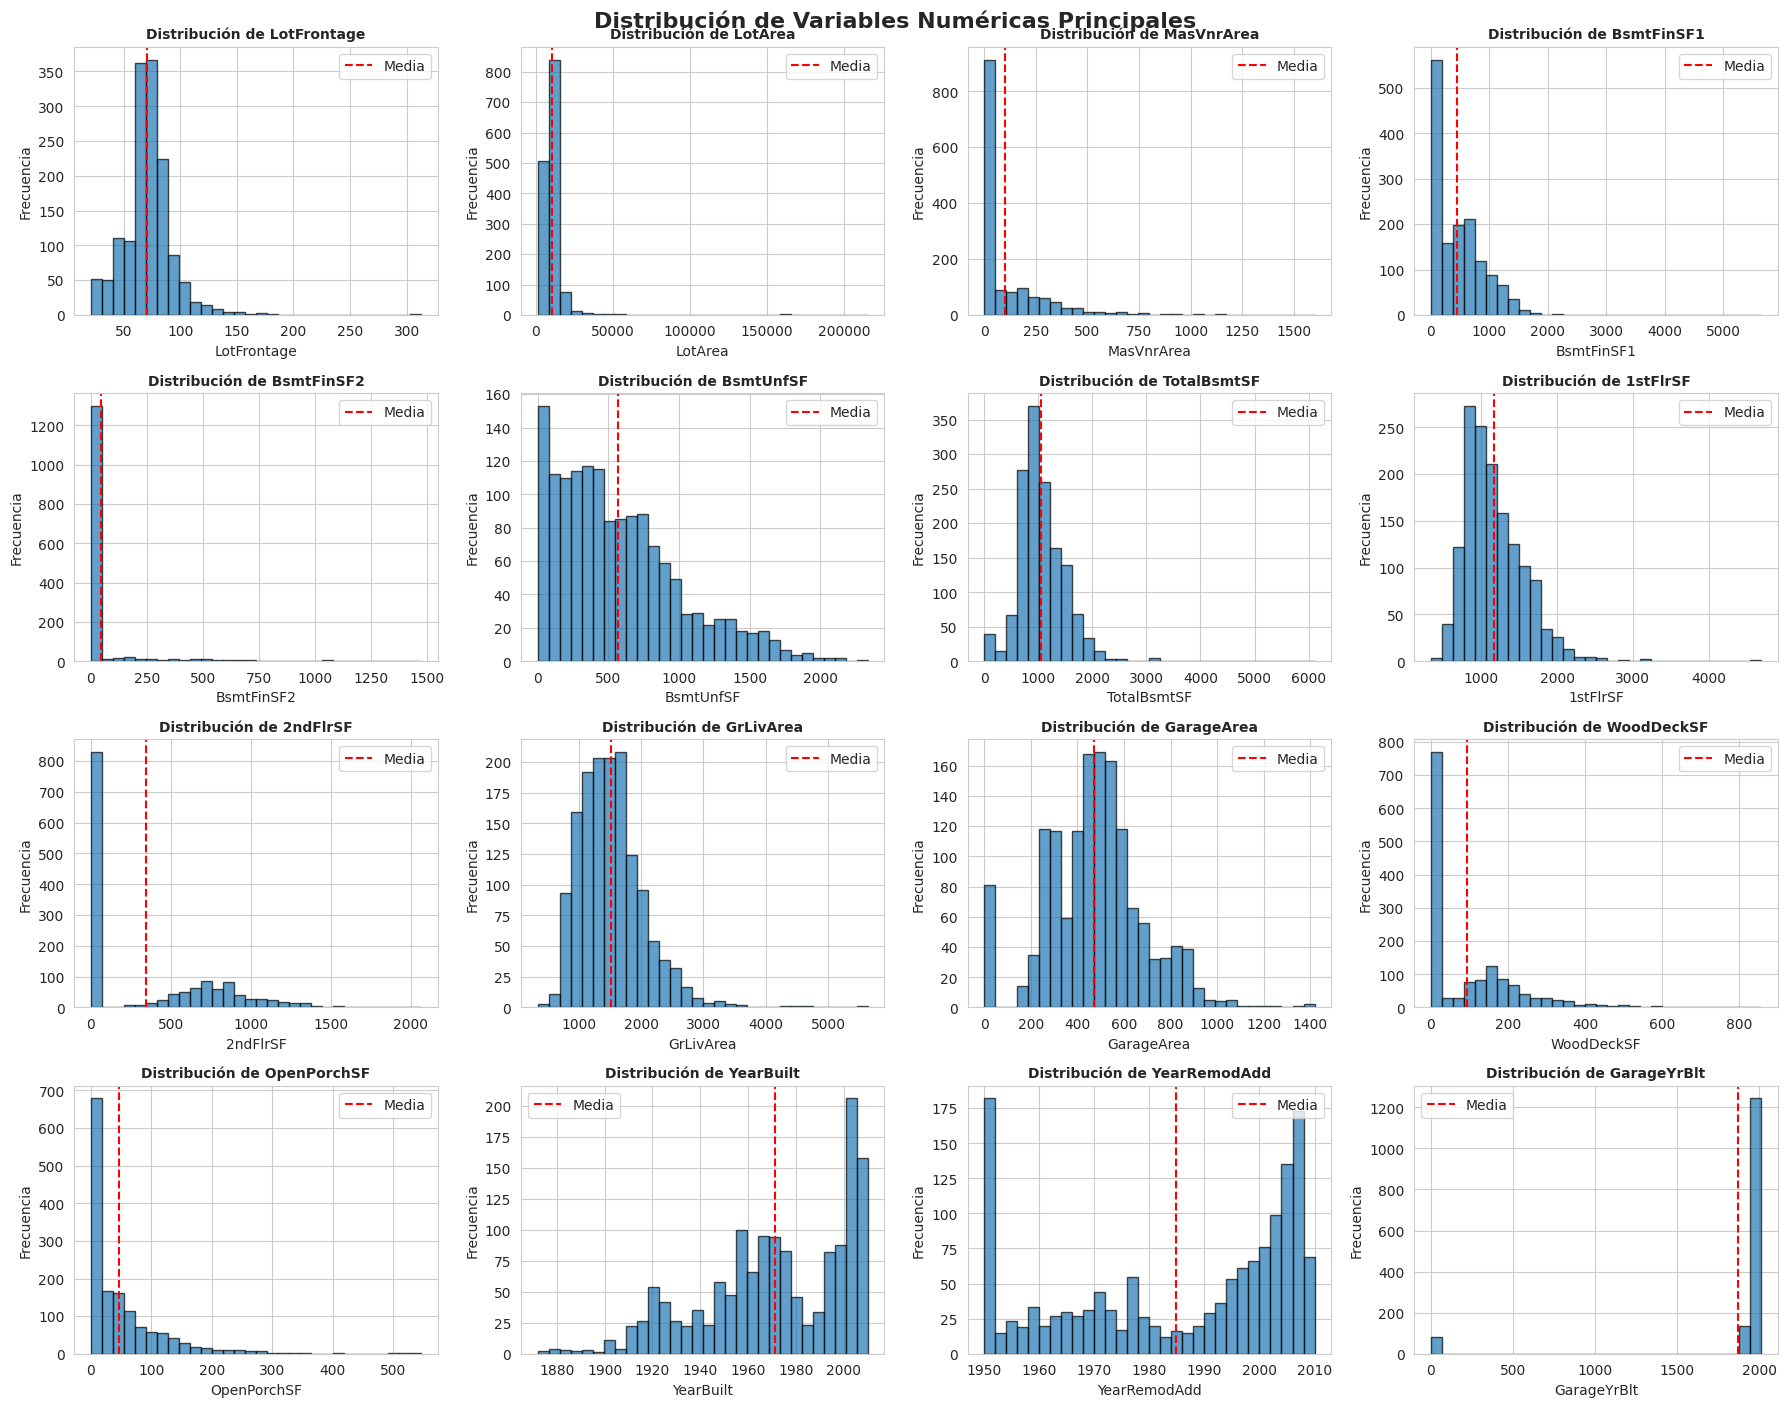

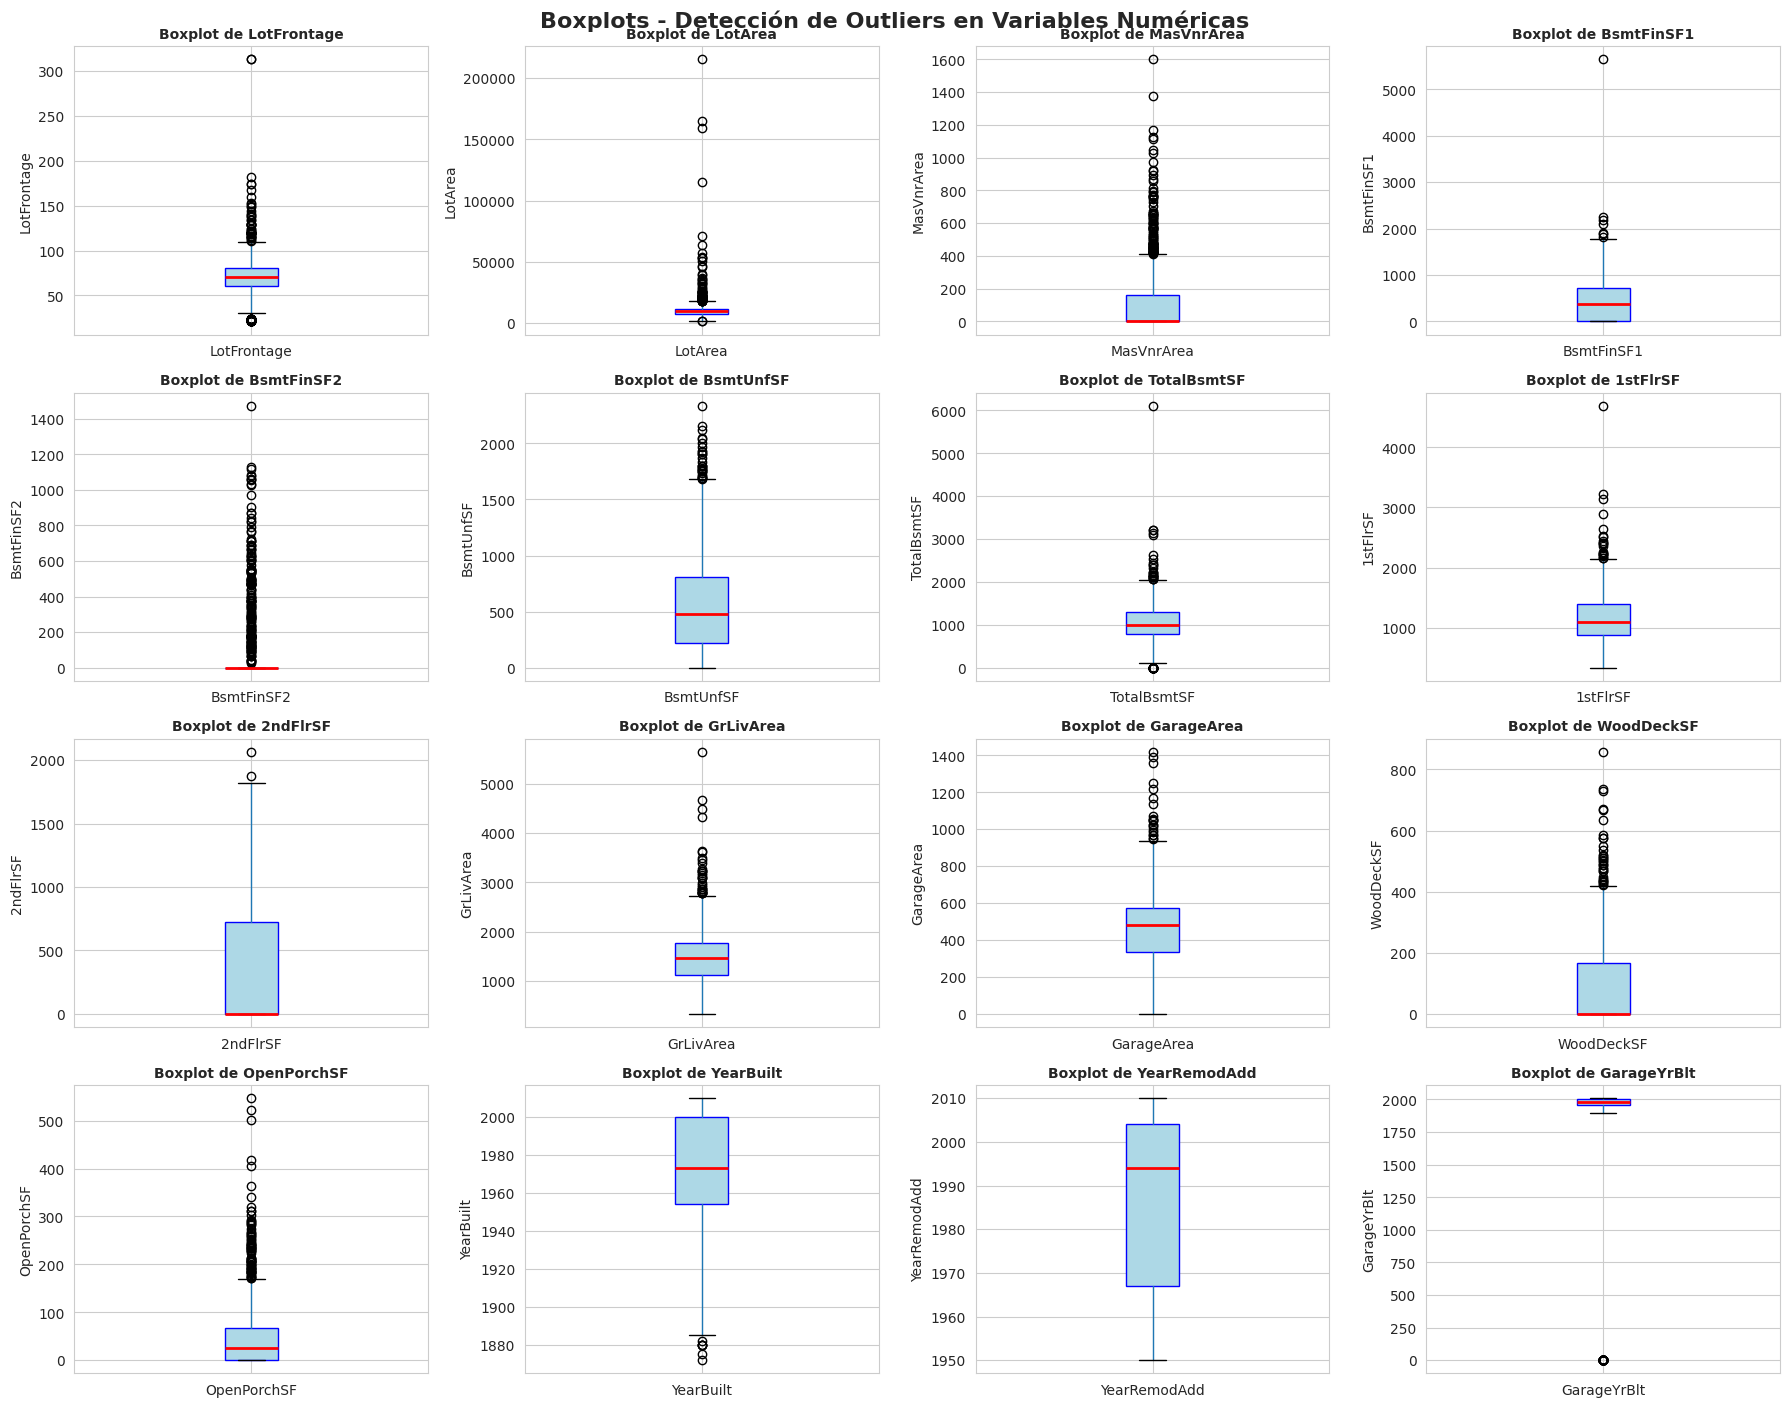


ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES NUMÉRICAS
               count          mean          std     min      25%     50%  \
LotFrontage   1460.0     70.199658    22.431902    21.0    60.00    70.0   
LotArea       1460.0  10516.828082  9981.264932  1300.0  7553.50  9478.5   
MasVnrArea    1460.0    103.117123   180.731373     0.0     0.00     0.0   
BsmtFinSF1    1460.0    443.639726   456.098091     0.0     0.00   383.5   
BsmtFinSF2    1460.0     46.549315   161.319273     0.0     0.00     0.0   
BsmtUnfSF     1460.0    567.240411   441.866955     0.0   223.00   477.5   
TotalBsmtSF   1460.0   1057.429452   438.705324     0.0   795.75   991.5   
1stFlrSF      1460.0   1162.626712   386.587738   334.0   882.00  1087.0   
2ndFlrSF      1460.0    346.992466   436.528436     0.0     0.00     0.0   
GrLivArea     1460.0   1515.463699   525.480383   334.0  1129.50  1464.0   
GarageArea    1460.0    472.980137   213.804841     0.0   334.50   480.0   
WoodDeckSF    1460.0     94.244521   1

In [35]:
# ------------------------------------------------------------
# 5.1.1 Análisis Univariable - Variables Numéricas
# Visualización de distribuciones, outliers y estadísticas descriptivas
# ------------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo de visualizaciones
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Identificar variables numéricas principales (excluyendo binarias y target)
numeric_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
                    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'YearBuilt',
                    'YearRemodAdd', 'GarageYrBlt']

# Seleccionar solo las que existen en el dataframe
numeric_features = [col for col in numeric_features if col in df.columns]

# 1. HISTOGRAMAS DE DISTRIBUCIÓN
fig, axes = plt.subplots(4, 4, figsize=(18, 14))
axes = axes.flatten()

for idx, col in enumerate(numeric_features):
    if idx < len(axes):
        df[col].hist(bins=30, ax=axes[idx], edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribución de {col}', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frecuencia')

        # Agregar línea de media
        axes[idx].axvline(df[col].mean(), color='red', linestyle='--', linewidth=1.5, label='Media')
        axes[idx].legend()

# Ocultar ejes vacíos
for idx in range(len(numeric_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Distribución de Variables Numéricas Principales',
             fontsize=16, fontweight='bold', y=1.002)
plt.show()

# 2. BOXPLOTS PARA DETECTAR OUTLIERS
fig, axes = plt.subplots(4, 4, figsize=(18, 14))
axes = axes.flatten()

for idx, col in enumerate(numeric_features):
    if idx < len(axes):
        df.boxplot(column=col, ax=axes[idx], patch_artist=True,
                   boxprops=dict(facecolor='lightblue', color='blue'),
                   medianprops=dict(color='red', linewidth=2))
        axes[idx].set_title(f'Boxplot de {col}', fontsize=10, fontweight='bold')
        axes[idx].set_ylabel(col)

# Ocultar ejes vacíos
for idx in range(len(numeric_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Boxplots - Detección de Outliers en Variables Numéricas',
             fontsize=16, fontweight='bold', y=1.002)
plt.show()

# 3. ESTADÍSTICAS DESCRIPTIVAS
print("\n" + "="*80)
print("ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES NUMÉRICAS")
print("="*80)
print(df[numeric_features].describe().T)


### Analisis Univariable - Variables categoricas

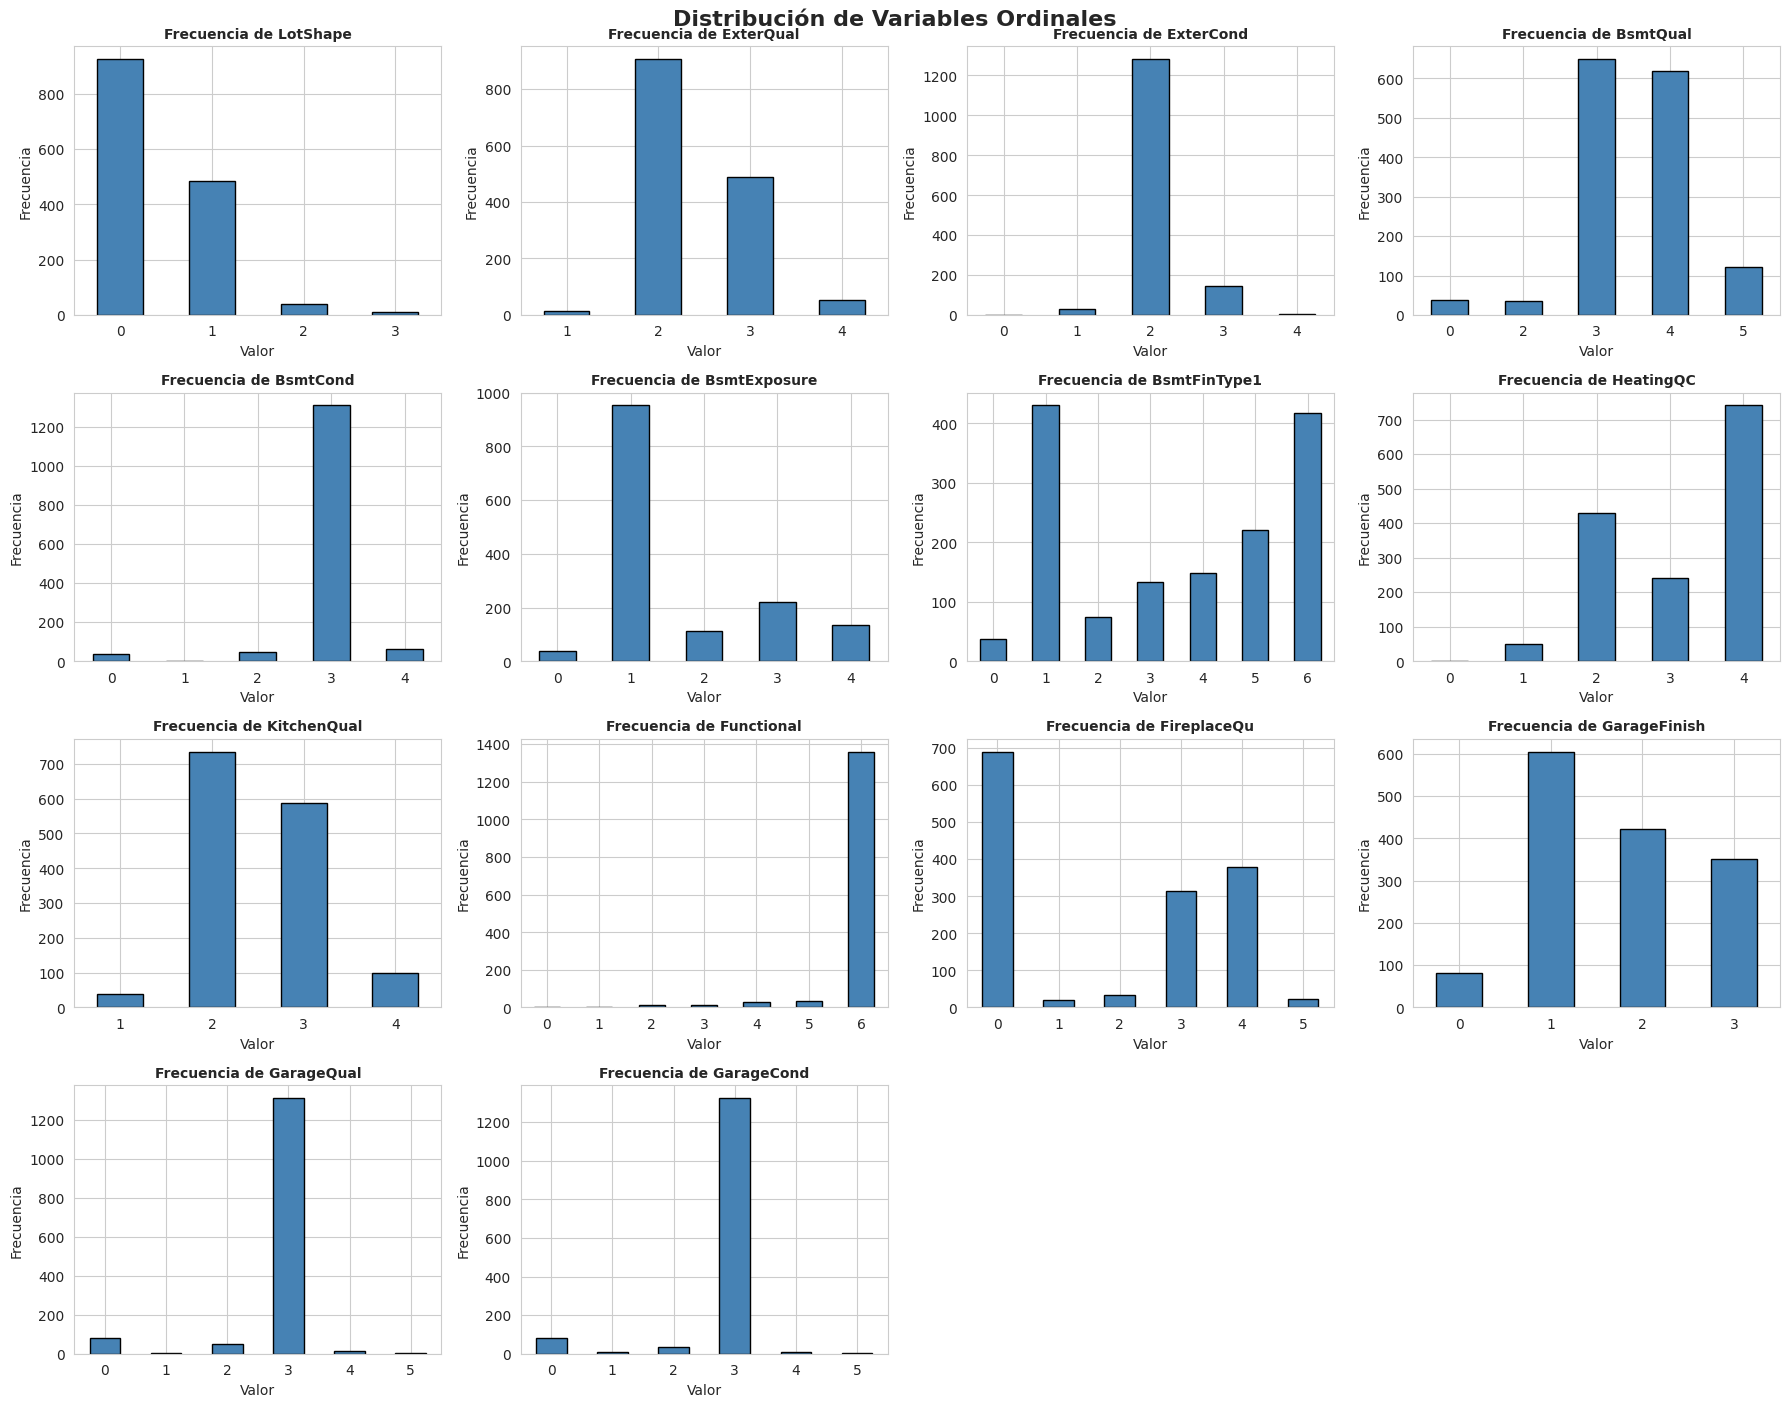

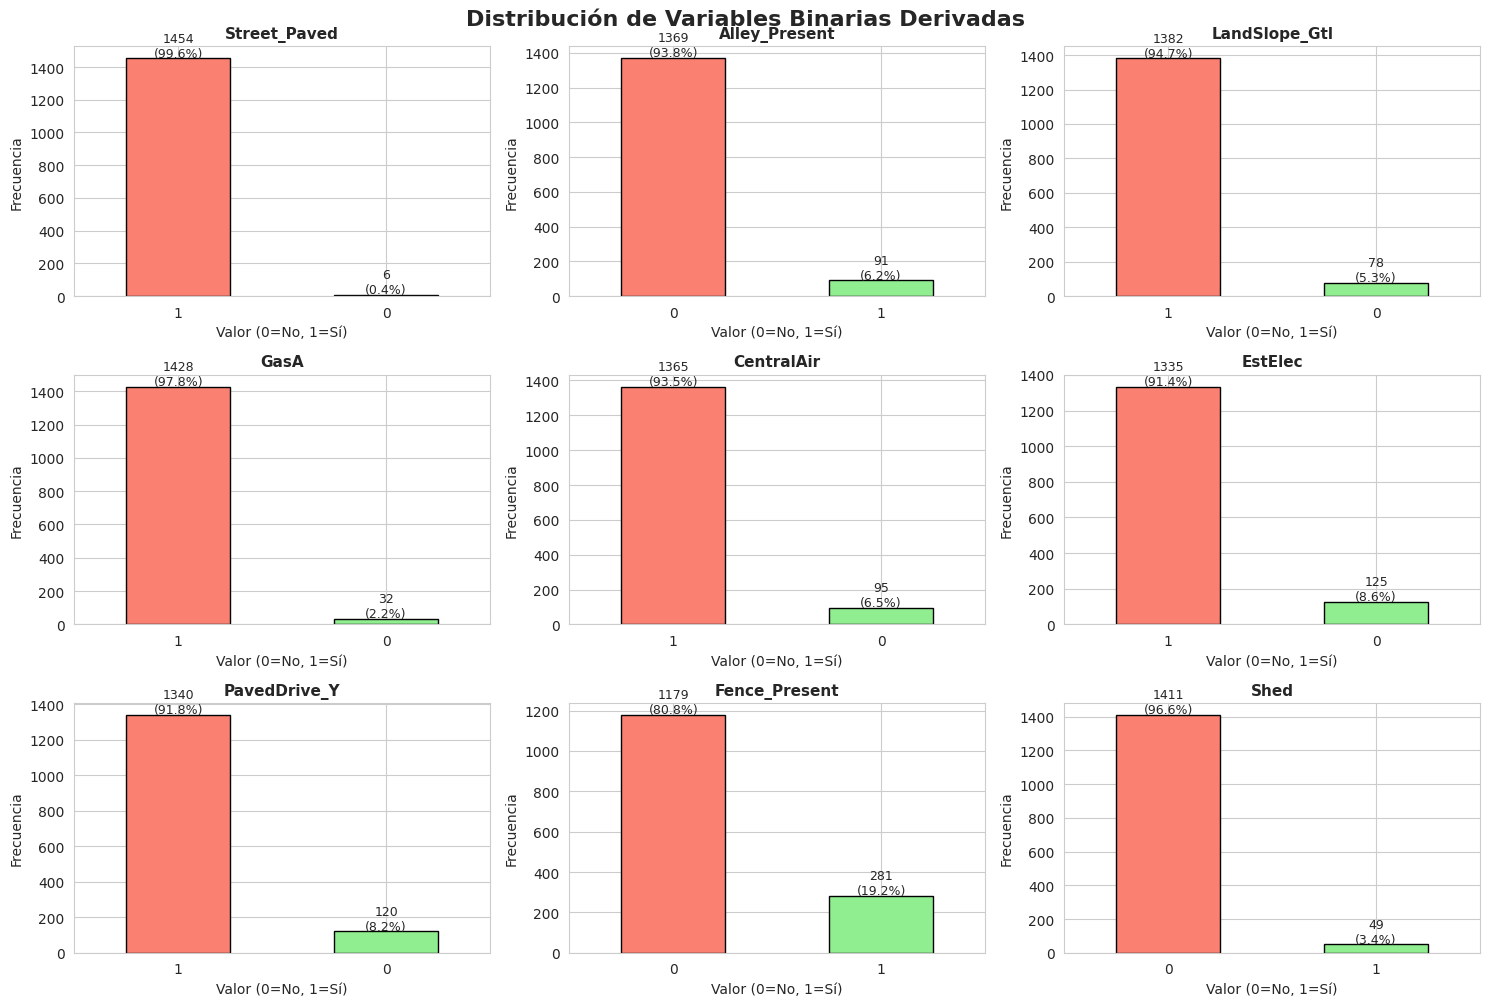

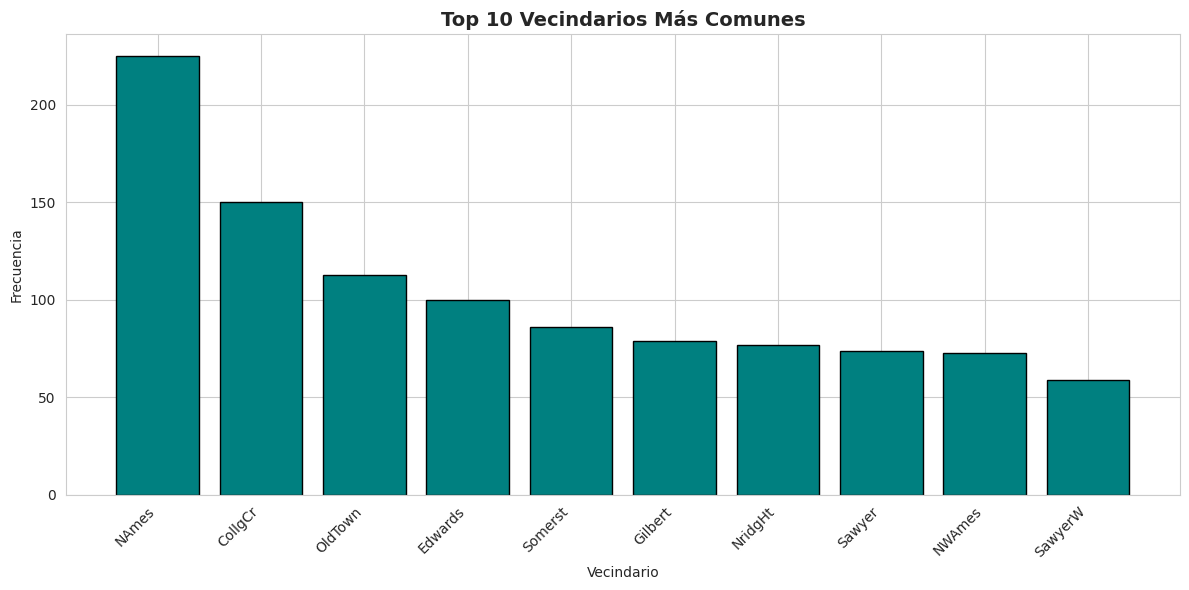


ANÁLISIS UNIVARIABLE DE VARIABLES CATEGÓRICAS COMPLETADO


In [36]:
# ------------------------------------------------------------
# 5.1.2 Análisis Univariable - Variables Categóricas
# Visualización de frecuencias de variables ordinales y binarias
# ------------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Variables ordinales codificadas (de interés para análisis)
ordinal_features = ['LotShape', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                    'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
                    'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']

# Filtrar solo las que existen
ordinal_features = [col for col in ordinal_features if col in df.columns]

# 1. GRÁFICOS DE BARRAS PARA VARIABLES ORDINALES
fig, axes = plt.subplots(4, 4, figsize=(18, 14))
axes = axes.flatten()

for idx, col in enumerate(ordinal_features):
    if idx < len(axes):
        df[col].value_counts().sort_index().plot(kind='bar', ax=axes[idx],
                                                   color='steelblue', edgecolor='black')
        axes[idx].set_title(f'Frecuencia de {col}', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel('Valor')
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].tick_params(axis='x', rotation=0)

# Ocultar ejes vacíos
for idx in range(len(ordinal_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Distribución de Variables Ordinales',
             fontsize=16, fontweight='bold', y=1.002)
plt.show()

# 2. ANÁLISIS DE VARIABLES BINARIAS CREADAS
binary_features = ['Street_Paved', 'Alley_Present', 'LandSlope_Gtl', 'GasA',
                   'CentralAir', 'EstElec', 'PavedDrive_Y', 'Fence_Present', 'Shed']

# Filtrar solo las que existen
binary_features = [col for col in binary_features if col in df.columns]

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(binary_features):
    if idx < len(axes):
        df[col].value_counts().plot(kind='bar', ax=axes[idx],
                                     color=['salmon', 'lightgreen'], edgecolor='black')
        axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel('Valor (0=No, 1=Sí)')
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].tick_params(axis='x', rotation=0)

        # Agregar porcentajes en las barras
        total = len(df)
        for p in axes[idx].patches:
            height = p.get_height()
            axes[idx].text(p.get_x() + p.get_width()/2., height + 10,
                          f'{int(height)}\n({height/total*100:.1f}%)',
                          ha='center', fontsize=9)

# Ocultar ejes vacíos
for idx in range(len(binary_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Distribución de Variables Binarias Derivadas',
             fontsize=16, fontweight='bold', y=1.002)
plt.show()

# 3. TOP 10 VECINDARIOS MÁS COMUNES
if 'Neighborhood_CollgCr' in df.columns:  # Verificar si hay columnas de vecindario
    # Reconstruir variable original desde one-hot
    neighborhood_cols = [col for col in df.columns if col.startswith('Neighborhood_')]

    # Contar frecuencias sumando columnas one-hot
    neighborhood_counts = {}
    for col in neighborhood_cols:
        neighborhood_name = col.replace('Neighborhood_', '')
        neighborhood_counts[neighborhood_name] = df[col].sum()

    # Crear DataFrame y graficar
    import pandas as pd
    neighborhood_df = pd.DataFrame(list(neighborhood_counts.items()),
                                    columns=['Vecindario', 'Frecuencia'])
    neighborhood_df = neighborhood_df.sort_values('Frecuencia', ascending=False).head(10)

    plt.figure(figsize=(12, 6))
    plt.bar(neighborhood_df['Vecindario'], neighborhood_df['Frecuencia'],
            color='teal', edgecolor='black')
    plt.title('Top 10 Vecindarios Más Comunes', fontsize=14, fontweight='bold')
    plt.xlabel('Vecindario')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

print("\n" + "="*80)
print("ANÁLISIS UNIVARIABLE DE VARIABLES CATEGÓRICAS COMPLETADO")
print("="*80)


### Analisis Bivariable

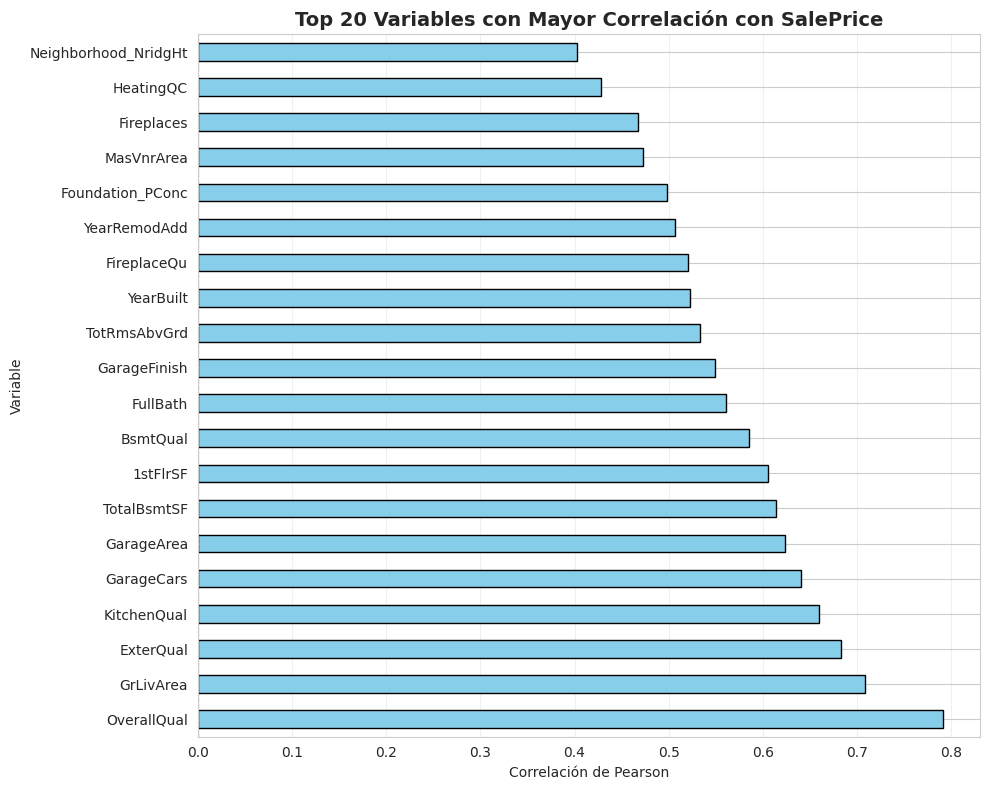


TOP 15 VARIABLES MÁS CORRELACIONADAS CON SALEPRICE
OverallQual     0.790982
GrLivArea       0.708624
ExterQual       0.682639
KitchenQual     0.659600
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
BsmtQual        0.585207
FullBath        0.560664
GarageFinish    0.549247
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
FireplaceQu     0.520438
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


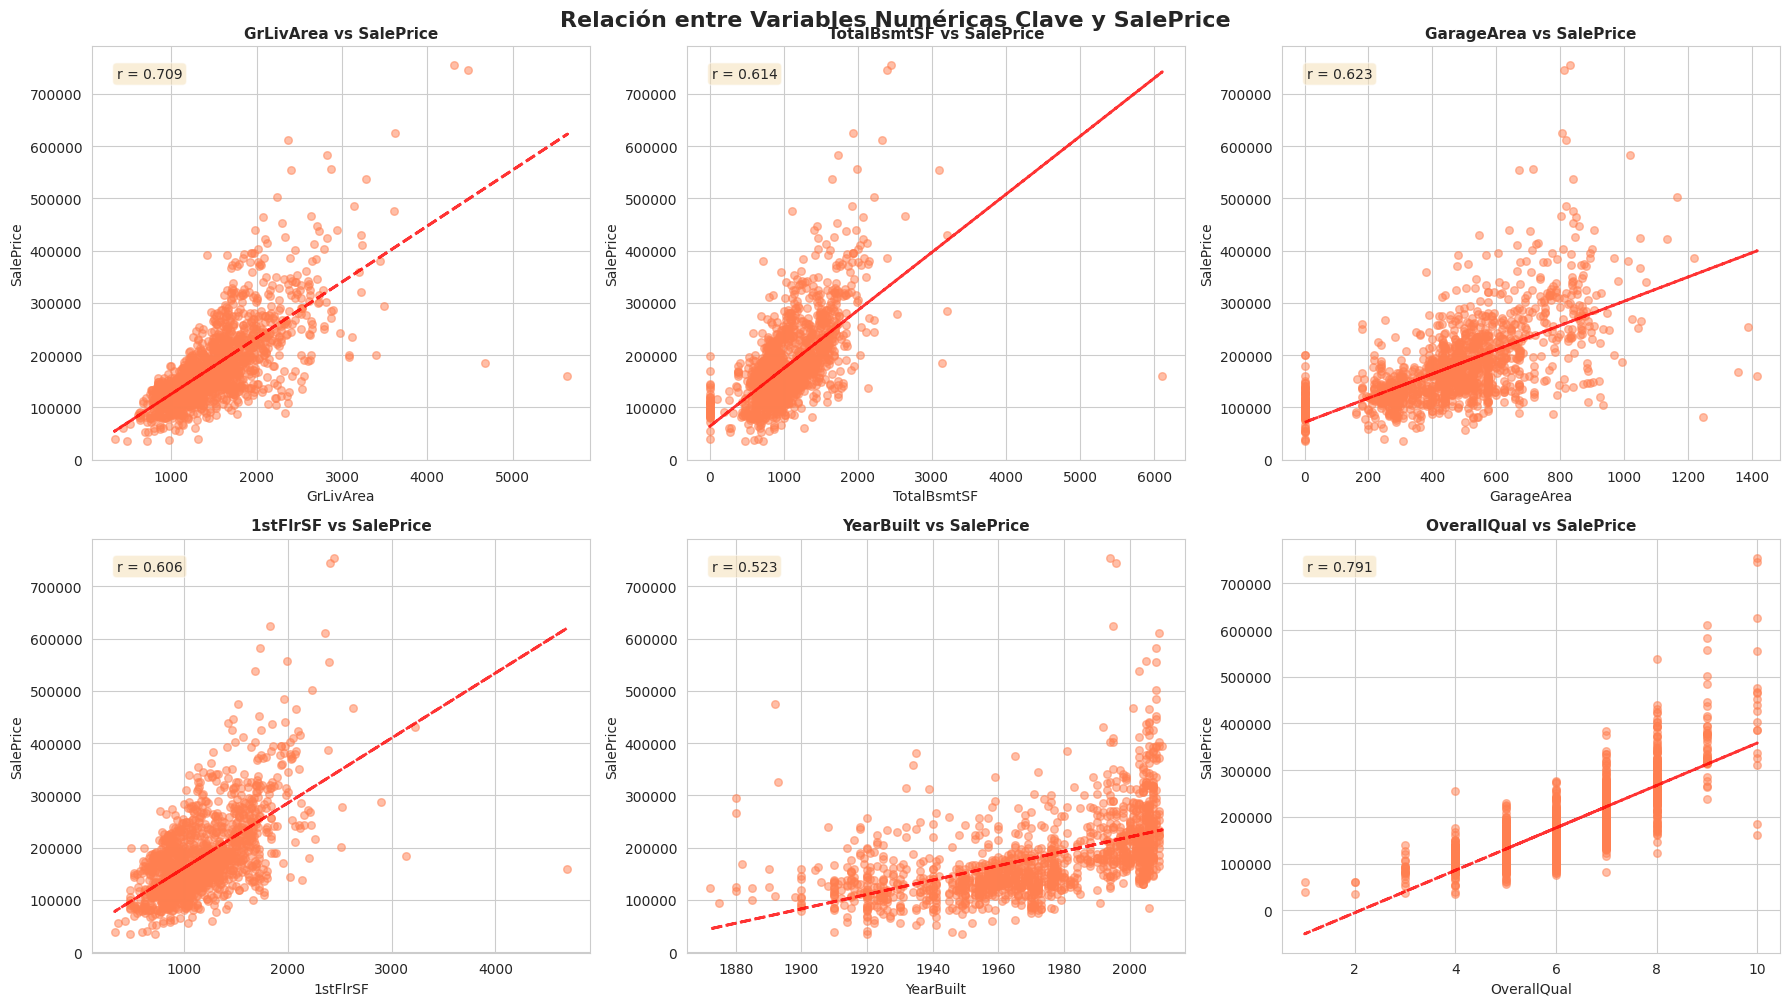

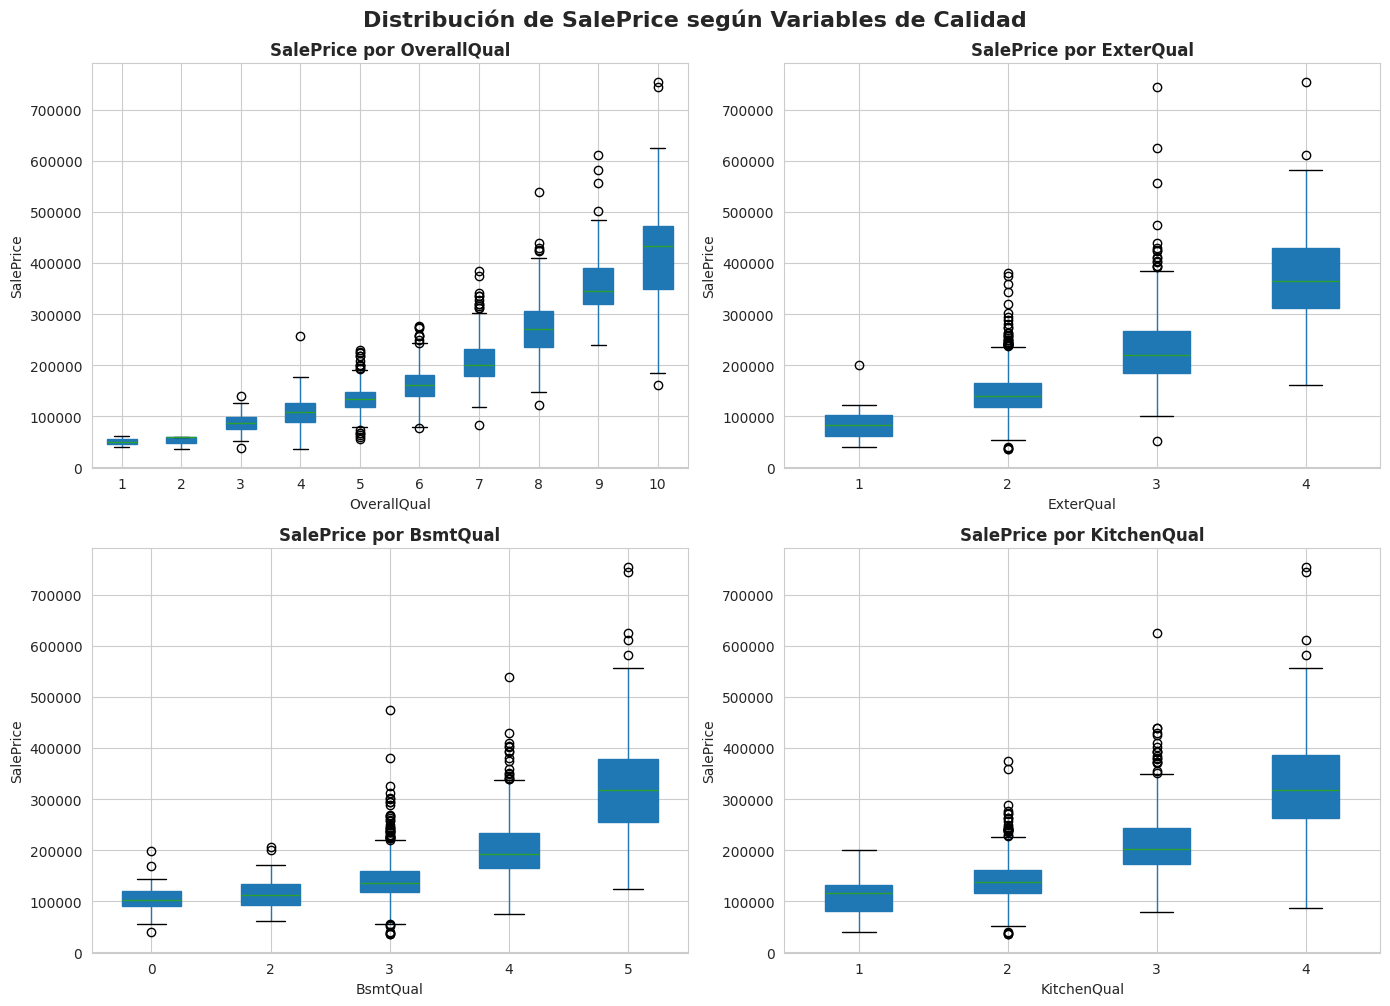

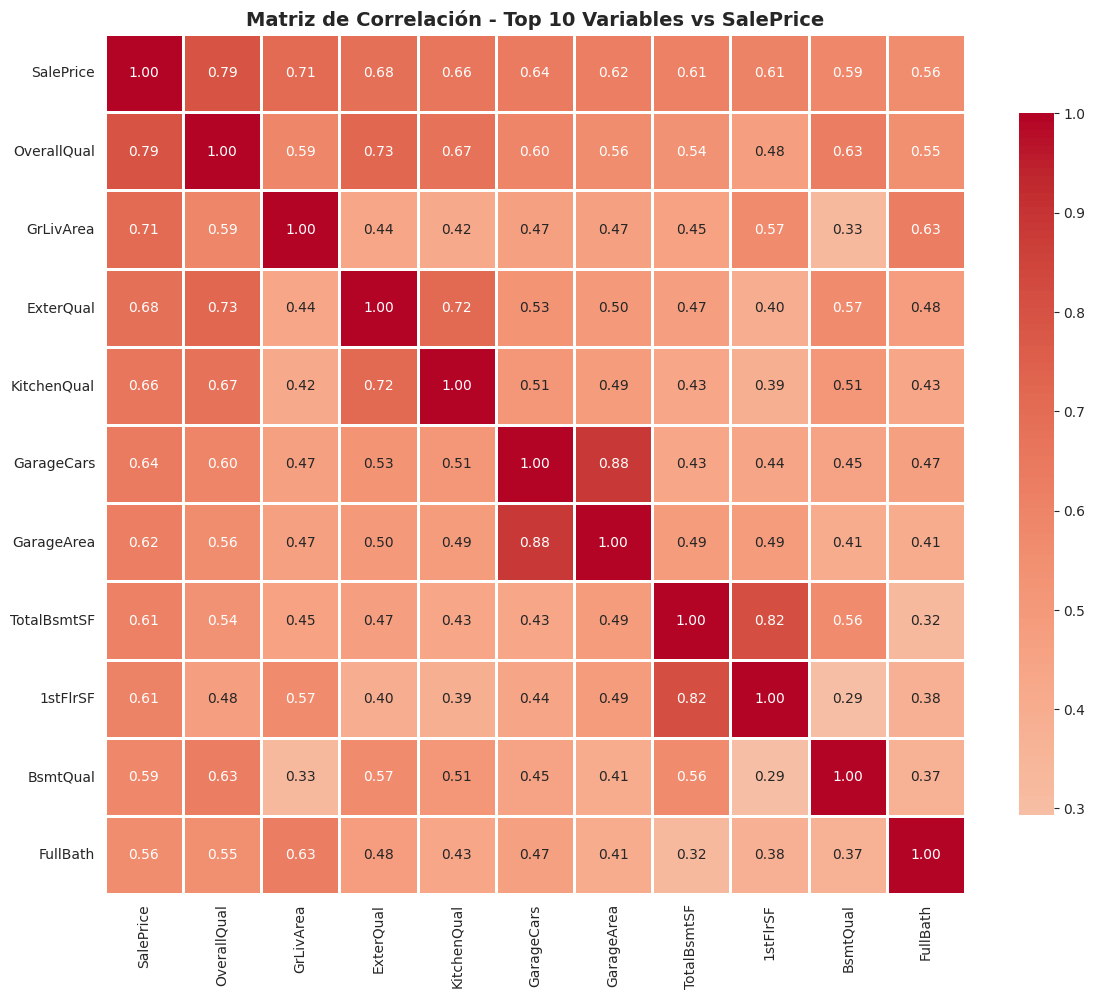


ANÁLISIS BIVARIABLE COMPLETADO


In [37]:
# ------------------------------------------------------------
# 5.2 Análisis Bivariable
# Relación entre variables predictoras y la variable objetivo (SalePrice)
# ------------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. MATRIZ DE CORRELACIÓN CON SALEPRICE
# Seleccionar variables numéricas relevantes
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calcular correlación con SalePrice
if 'SalePrice' in df.columns:
    correlations = df[numeric_cols].corr()['SalePrice'].sort_values(ascending=False)

    # Top 20 variables más correlacionadas
    top_corr = correlations.head(21).drop('SalePrice')  # Excluir SalePrice mismo

    plt.figure(figsize=(10, 8))
    top_corr.plot(kind='barh', color='skyblue', edgecolor='black')
    plt.title('Top 20 Variables con Mayor Correlación con SalePrice',
              fontsize=14, fontweight='bold')
    plt.xlabel('Correlación de Pearson')
    plt.ylabel('Variable')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("\n" + "="*80)
    print("TOP 15 VARIABLES MÁS CORRELACIONADAS CON SALEPRICE")
    print("="*80)
    print(correlations.head(16).drop('SalePrice'))

# 2. SCATTER PLOTS - VARIABLES NUMÉRICAS VS SALEPRICE
key_features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF',
                'YearBuilt', 'OverallQual']
key_features = [col for col in key_features if col in df.columns]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(key_features):
    if idx < len(axes):
        axes[idx].scatter(df[col], df['SalePrice'], alpha=0.5, s=30, color='coral')
        axes[idx].set_title(f'{col} vs SalePrice', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('SalePrice')

        # Agregar línea de tendencia
        z = np.polyfit(df[col], df['SalePrice'], 1)
        p = np.poly1d(z)
        axes[idx].plot(df[col], p(df[col]), "r--", alpha=0.8, linewidth=2)

        # Calcular y mostrar correlación
        corr = df[[col, 'SalePrice']].corr().iloc[0, 1]
        axes[idx].text(0.05, 0.95, f'r = {corr:.3f}',
                      transform=axes[idx].transAxes,
                      fontsize=10, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.suptitle('Relación entre Variables Numéricas Clave y SalePrice',
             fontsize=16, fontweight='bold', y=1.002)
plt.show()

# 3. BOXPLOTS - VARIABLES ORDINALES VS SALEPRICE
ordinal_key = ['OverallQual', 'ExterQual', 'BsmtQual', 'KitchenQual']
ordinal_key = [col for col in ordinal_key if col in df.columns]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(ordinal_key):
    if idx < len(axes):
        df.boxplot(column='SalePrice', by=col, ax=axes[idx], patch_artist=True)
        axes[idx].set_title(f'SalePrice por {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('SalePrice')
        axes[idx].get_figure().suptitle('')  # Remover título automático

plt.tight_layout()
plt.suptitle('Distribución de SalePrice según Variables de Calidad',
             fontsize=16, fontweight='bold', y=1.002)
plt.show()

# 4. HEATMAP DE CORRELACIÓN - TOP VARIABLES
if 'SalePrice' in df.columns:
    top_features = correlations.head(11).index.tolist()  # Top 10 + SalePrice

    plt.figure(figsize=(12, 10))
    sns.heatmap(df[top_features].corr(), annot=True, fmt='.2f',
                cmap='coolwarm', center=0, square=True, linewidths=1,
                cbar_kws={"shrink": 0.8})
    plt.title('Matriz de Correlación - Top 10 Variables vs SalePrice',
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

print("\n" + "="*80)
print("ANÁLISIS BIVARIABLE COMPLETADO")
print("="*80)



##6. Preparacion de Datos y Modelado


### Separacion Features y Target

In [38]:
# ============================================================================
# 6.1 PREPARACIÓN DE DATOS - Parte 1: Separación Features y Target
# ============================================================================
# En esta celda separamos las variables predictoras (X) de la variable objetivo (y)
# y verificamos que todo esté correcto antes de proceder con el modelado

import numpy as np
import pandas as pd

print("="*80)
print("SEPARACIÓN DE FEATURES (X) Y TARGET (y)")
print("="*80)

# ----------------------------------------------------------------------------
# PASO 1: Identificar columnas a excluir
# ----------------------------------------------------------------------------
# Excluimos 'SalePrice' (es nuestro target) y 'Id' (no aporta información predictiva)
cols_to_exclude = ['SalePrice']

# Verificar si existe columna 'Id' y agregarla a exclusión
if 'Id' in df.columns:
    cols_to_exclude.append('Id')

# ----------------------------------------------------------------------------
# PASO 2: Crear X (features) e y (target)
# ----------------------------------------------------------------------------
# X contendrá todas las variables predictoras (191 columnas procesadas)
X = df.drop(columns=cols_to_exclude)

# y contendrá únicamente los precios de venta (variable a predecir)
y = df['SalePrice'].copy()

# ----------------------------------------------------------------------------
# PASO 3: Verificación de dimensiones y estructura
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("DIMENSIONES DE LOS DATOS")
print(f"{'='*80}")
print(f"Features (X):")
print(f"  - Shape: {X.shape}")
print(f"  - Número de muestras: {X.shape[0]}")
print(f"  - Número de features: {X.shape[1]}")
print(f"\nTarget (y):")
print(f"  - Shape: {y.shape}")
print(f"  - Número de valores: {len(y)}")

# ----------------------------------------------------------------------------
# PASO 4: Verificar tipos de datos
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("TIPOS DE DATOS EN X")
print(f"{'='*80}")
print(X.dtypes.value_counts())

# ----------------------------------------------------------------------------
# PASO 5: Estadísticas descriptivas del target (SalePrice)
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("ESTADÍSTICAS DE SALEPRICE (TARGET)")
print(f"{'='*80}")
print(f"Media:              ${y.mean():>15,.2f}")
print(f"Mediana:            ${y.median():>15,.2f}")
print(f"Desviación Estándar: ${y.std():>15,.2f}")
print(f"Mínimo:             ${y.min():>15,.2f}")
print(f"Máximo:             ${y.max():>15,.2f}")
print(f"Rango:              ${y.max() - y.min():>15,.2f}")

# Calcular asimetría (skewness) - importante para decidir sobre transformación log
from scipy.stats import skew
skewness = skew(y)
print(f"\nAsimetría (Skewness): {skewness:.4f}")
if skewness > 0.5:
    print("⚠️  Distribución positivamente asimétrica (sesgada a la derecha)")
    print("✅ Recomendado: Aplicar transformación logarítmica")
else:
    print("✅ Distribución relativamente simétrica")

# ----------------------------------------------------------------------------
# PASO 6: Verificar que no hay valores nulos
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("VERIFICACIÓN DE VALORES NULOS")
print(f"{'='*80}")
print(f"Valores nulos en X: {X.isnull().sum().sum()}")
print(f"Valores nulos en y: {y.isnull().sum()}")

if X.isnull().sum().sum() == 0 and y.isnull().sum() == 0:
    print("✅ No hay valores nulos - Dataset listo para modelado")
else:
    print("⚠️  ADVERTENCIA: Hay valores nulos que deben ser tratados")

print(f"\n{'='*80}")
print("SEPARACIÓN COMPLETADA")
print(f"{'='*80}\n")


SEPARACIÓN DE FEATURES (X) Y TARGET (y)

DIMENSIONES DE LOS DATOS
Features (X):
  - Shape: (1460, 190)
  - Número de muestras: 1460
  - Número de features: 190

Target (y):
  - Shape: (1460,)
  - Número de valores: 1460

TIPOS DE DATOS EN X
int64      188
float64      2
Name: count, dtype: int64

ESTADÍSTICAS DE SALEPRICE (TARGET)
Media:              $     180,921.20
Mediana:            $     163,000.00
Desviación Estándar: $      79,442.50
Mínimo:             $      34,900.00
Máximo:             $     755,000.00
Rango:              $     720,100.00

Asimetría (Skewness): 1.8809
⚠️  Distribución positivamente asimétrica (sesgada a la derecha)
✅ Recomendado: Aplicar transformación logarítmica

VERIFICACIÓN DE VALORES NULOS
Valores nulos en X: 0
Valores nulos en y: 0
✅ No hay valores nulos - Dataset listo para modelado

SEPARACIÓN COMPLETADA



In [39]:
# ============================================================================
# 6.1 PREPARACIÓN DE DATOS - Parte 1: Separación Features y Target
# ============================================================================
# En esta celda separamos las variables predictoras (X) de la variable objetivo (y)
# y verificamos que todo esté correcto antes de proceder con el modelado

import numpy as np
import pandas as pd

print("="*80)
print("SEPARACIÓN DE FEATURES (X) Y TARGET (y)")
print("="*80)

# ----------------------------------------------------------------------------
# PASO 1: Identificar columnas a excluir
# ----------------------------------------------------------------------------
# Excluimos 'SalePrice' (es nuestro target) y 'Id' (no aporta información predictiva)
cols_to_exclude = ['SalePrice']

# Verificar si existe columna 'Id' y agregarla a exclusión
if 'Id' in df.columns:
    cols_to_exclude.append('Id')

# ----------------------------------------------------------------------------
# PASO 2: Crear X (features) e y (target)
# ----------------------------------------------------------------------------
# X contendrá todas las variables predictoras (191 columnas procesadas)
X = df.drop(columns=cols_to_exclude)

# y contendrá únicamente los precios de venta (variable a predecir)
y = df['SalePrice'].copy()

# ----------------------------------------------------------------------------
# PASO 3: Verificación de dimensiones y estructura
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("DIMENSIONES DE LOS DATOS")
print(f"{'='*80}")
print(f"Features (X):")
print(f"  - Shape: {X.shape}")
print(f"  - Número de muestras: {X.shape[0]}")
print(f"  - Número de features: {X.shape[1]}")
print(f"\nTarget (y):")
print(f"  - Shape: {y.shape}")
print(f"  - Número de valores: {len(y)}")

# ----------------------------------------------------------------------------
# PASO 4: Verificar tipos de datos
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("TIPOS DE DATOS EN X")
print(f"{'='*80}")
print(X.dtypes.value_counts())

# ----------------------------------------------------------------------------
# PASO 5: Estadísticas descriptivas del target (SalePrice)
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("ESTADÍSTICAS DE SALEPRICE (TARGET)")
print(f"{'='*80}")
print(f"Media:              ${y.mean():>15,.2f}")
print(f"Mediana:            ${y.median():>15,.2f}")
print(f"Desviación Estándar: ${y.std():>15,.2f}")
print(f"Mínimo:             ${y.min():>15,.2f}")
print(f"Máximo:             ${y.max():>15,.2f}")
print(f"Rango:              ${y.max() - y.min():>15,.2f}")

# Calcular asimetría (skewness) - importante para decidir sobre transformación log
from scipy.stats import skew
skewness = skew(y)
print(f"\nAsimetría (Skewness): {skewness:.4f}")
if skewness > 0.5:
    print("⚠️  Distribución positivamente asimétrica (sesgada a la derecha)")
    print("✅ Recomendado: Aplicar transformación logarítmica")
else:
    print("✅ Distribución relativamente simétrica")

# ----------------------------------------------------------------------------
# PASO 6: Verificar que no hay valores nulos
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("VERIFICACIÓN DE VALORES NULOS")
print(f"{'='*80}")
print(f"Valores nulos en X: {X.isnull().sum().sum()}")
print(f"Valores nulos en y: {y.isnull().sum()}")

if X.isnull().sum().sum() == 0 and y.isnull().sum() == 0:
    print("✅ No hay valores nulos - Dataset listo para modelado")
else:
    print("⚠️  ADVERTENCIA: Hay valores nulos que deben ser tratados")

print(f"\n{'='*80}")
print("SEPARACIÓN COMPLETADA")
print(f"{'='*80}\n")


SEPARACIÓN DE FEATURES (X) Y TARGET (y)

DIMENSIONES DE LOS DATOS
Features (X):
  - Shape: (1460, 190)
  - Número de muestras: 1460
  - Número de features: 190

Target (y):
  - Shape: (1460,)
  - Número de valores: 1460

TIPOS DE DATOS EN X
int64      188
float64      2
Name: count, dtype: int64

ESTADÍSTICAS DE SALEPRICE (TARGET)
Media:              $     180,921.20
Mediana:            $     163,000.00
Desviación Estándar: $      79,442.50
Mínimo:             $      34,900.00
Máximo:             $     755,000.00
Rango:              $     720,100.00

Asimetría (Skewness): 1.8809
⚠️  Distribución positivamente asimétrica (sesgada a la derecha)
✅ Recomendado: Aplicar transformación logarítmica

VERIFICACIÓN DE VALORES NULOS
Valores nulos en X: 0
Valores nulos en y: 0
✅ No hay valores nulos - Dataset listo para modelado

SEPARACIÓN COMPLETADA



### Division Train-Test

In [40]:
# ============================================================================
# 6.1 PREPARACIÓN DE DATOS - Parte 2: División Train-Test
# ============================================================================
# Dividimos el dataset en conjunto de entrenamiento (80%) y prueba (20%)
# Usamos random_state=42 para reproducibilidad de resultados

from sklearn.model_selection import train_test_split

print("="*80)
print("DIVISIÓN TRAIN-TEST")
print("="*80)

# ----------------------------------------------------------------------------
# CONFIGURACIÓN DE LA DIVISIÓN
# ----------------------------------------------------------------------------
TEST_SIZE = 0.2
RANDOM_STATE = 42

# ----------------------------------------------------------------------------
# DIVISIÓN DE DATOS
# ----------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    shuffle=True
)

# ----------------------------------------------------------------------------
# REPORTE DE LA DIVISIÓN
# ----------------------------------------------------------------------------
print(f"\n📊 CONFIGURACIÓN:")
print(f"   Proporción Train: {(1-TEST_SIZE)*100:.0f}%")
print(f"   Proporción Test:  {TEST_SIZE*100:.0f}%")
print(f"   Random State:     {RANDOM_STATE}")

print(f"\n📈 TAMAÑOS RESULTANTES:")
print(f"   {'Conjunto':<15} {'Muestras':<12} {'Porcentaje':<12}")
print(f"   {'-'*40}")
print(f"   {'X_train':<15} {X_train.shape[0]:<12} {X_train.shape[0]/len(X)*100:>6.1f}%")
print(f"   {'X_test':<15} {X_test.shape[0]:<12} {X_test.shape[0]/len(X)*100:>6.1f}%")
print(f"   {'Total':<15} {len(X):<12} 100.0%")

print(f"\n💰 ESTADÍSTICAS DE SALEPRICE POR CONJUNTO:")
print(f"   {'Estadística':<20} {'Train':<20} {'Test':<20}")
print(f"   {'-'*60}")
print(f"   {'Media':<20} ${y_train.mean():>18,.2f} ${y_test.mean():>18,.2f}")
print(f"   {'Mediana':<20} ${y_train.median():>18,.2f} ${y_test.median():>18,.2f}")
print(f"   {'Std Dev':<20} ${y_train.std():>18,.2f} ${y_test.std():>18,.2f}")
print(f"   {'Mínimo':<20} ${y_train.min():>18,.2f} ${y_test.min():>18,.2f}")
print(f"   {'Máximo':<20} ${y_train.max():>18,.2f} ${y_test.max():>18,.2f}")

# Verificar distribución similar entre train y test
from scipy.stats import ks_2samp
ks_stat, p_value = ks_2samp(y_train, y_test)
print(f"\n📊 TEST DE KOLMOGOROV-SMIRNOV:")
print(f"   Estadístico KS: {ks_stat:.4f}")
print(f"   P-valor:        {p_value:.4f}")
if p_value > 0.05:
    print(f"   ✅ Train y Test tienen distribuciones similares (p > 0.05)")
else:
    print(f"   ⚠️  Train y Test pueden tener distribuciones diferentes (p < 0.05)")

print(f"\n{'='*80}")
print("✅ DIVISIÓN TRAIN-TEST COMPLETADA")
print(f"{'='*80}\n")


DIVISIÓN TRAIN-TEST

📊 CONFIGURACIÓN:
   Proporción Train: 80%
   Proporción Test:  20%
   Random State:     42

📈 TAMAÑOS RESULTANTES:
   Conjunto        Muestras     Porcentaje  
   ----------------------------------------
   X_train         1168           80.0%
   X_test          292            20.0%
   Total           1460         100.0%

💰 ESTADÍSTICAS DE SALEPRICE POR CONJUNTO:
   Estadística          Train                Test                
   ------------------------------------------------------------
   Media                $        181,441.54 $        178,839.81
   Mediana              $        165,000.00 $        154,150.00
   Std Dev              $         77,263.58 $         87,730.75
   Mínimo               $         34,900.00 $         35,311.00
   Máximo               $        745,000.00 $        755,000.00

📊 TEST DE KOLMOGOROV-SMIRNOV:
   Estadístico KS: 0.0908
   P-valor:        0.0410
   ⚠️  Train y Test pueden tener distribuciones diferentes (p < 0.05)

✅ DIVISIÓ

### Transformacion Logaritmica del target

TRANSFORMACIÓN LOGARÍTMICA DEL TARGET (SalePrice)

✅ Transformación aplicada: y_log = log(1 + y)
   Función utilizada: np.log1p()

COMPARACIÓN: DISTRIBUCIÓN ORIGINAL VS LOGARÍTMICA

Estadística          Original (Train)     Log Transform (Train)
------------------------------------------------------------
Media                $        181,441.54            12.0307
Mediana              $        165,000.00            12.0137
Std Dev              $         77,263.58             0.3906
Min                  $         34,900.00            10.4603
Max                  $        745,000.00            13.5211

Asimetría (Skewness)             1.7409             0.1247

✅ Reducción de asimetría: 1.6162
✅ La transformación logarítmica mejoró la distribución
   (Skewness más cercano a 0 = distribución más simétrica)


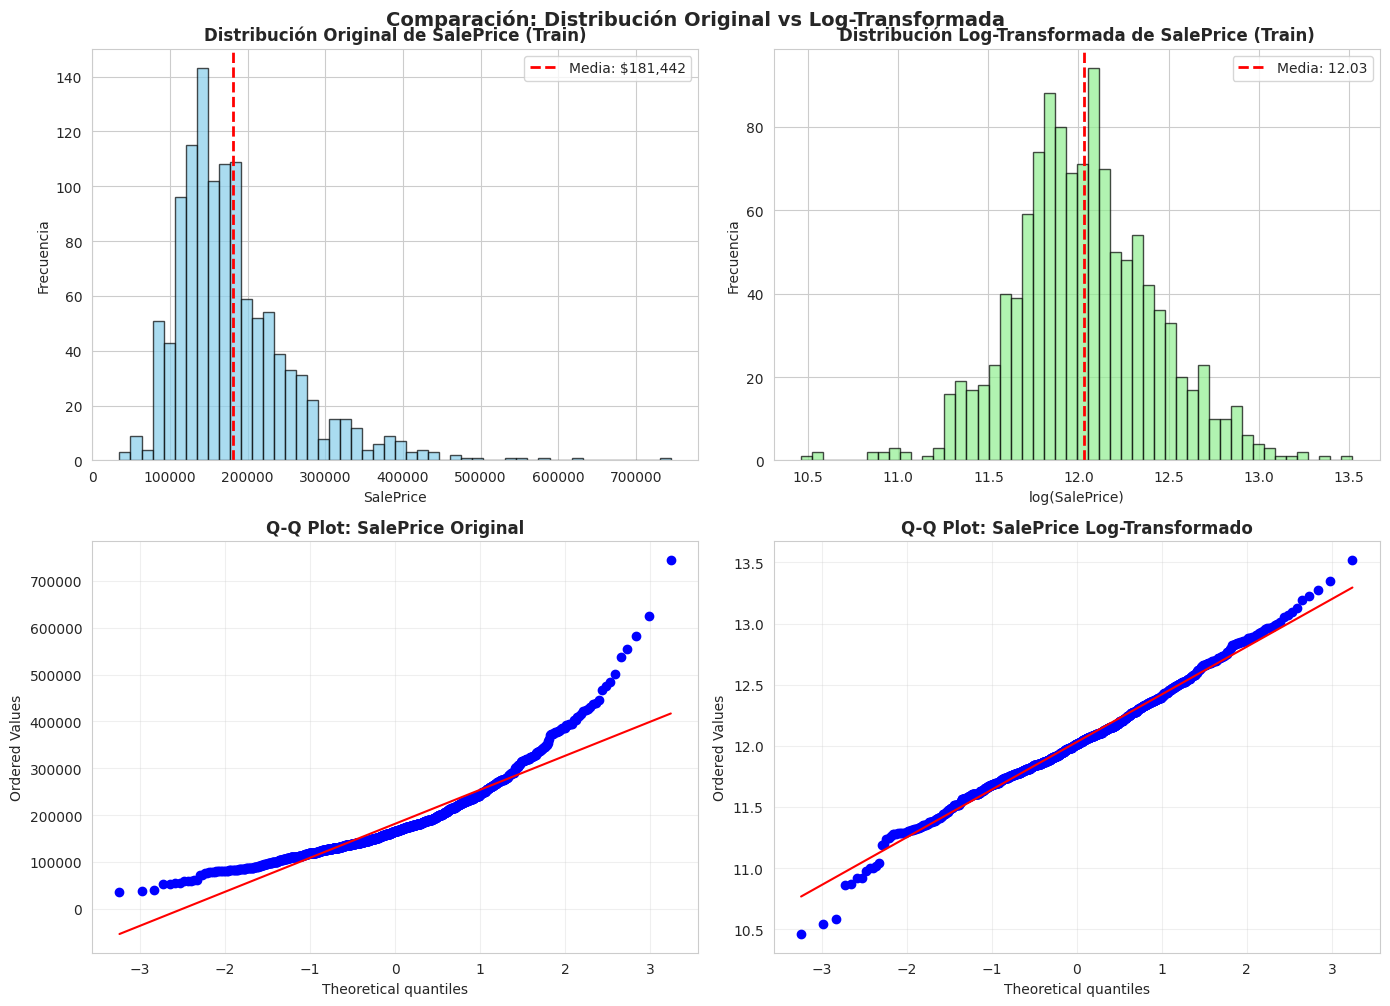


⚠️  IMPORTANTE - INVERSIÓN DE LA TRANSFORMACIÓN

Cuando hagamos predicciones con modelos entrenados en y_log,
debemos INVERTIR la transformación logarítmica para obtener
precios en escala original:

   prediccion_original = np.expm1(prediccion_log)
   donde expm1(x) = exp(x) - 1

Esto se aplicará automáticamente en la función de evaluación.

TRANSFORMACIÓN LOGARÍTMICA COMPLETADA



In [41]:
# ============================================================================
# 6.1 PREPARACIÓN DE DATOS - Parte 3: Transformación Logarítmica del Target
# ============================================================================
# Aplicamos transformación logarítmica a SalePrice para:
# 1. Normalizar la distribución (reducir asimetría)
# 2. Estabilizar la varianza
# 3. Mejorar el rendimiento de modelos lineales
# 4. Reducir el impacto de outliers

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("TRANSFORMACIÓN LOGARÍTMICA DEL TARGET (SalePrice)")
print("="*80)

# ----------------------------------------------------------------------------
# PASO 1: Aplicar transformación logarítmica
# ----------------------------------------------------------------------------
# Usamos np.log1p() en lugar de np.log() porque:
# - log1p(x) = log(1 + x) maneja mejor valores cercanos a 0
# - Evita problemas numéricos si hay valores 0 (aunque no deberían existir en precios)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

print(f"\n✅ Transformación aplicada: y_log = log(1 + y)")
print(f"   Función utilizada: np.log1p()")

# ----------------------------------------------------------------------------
# PASO 2: Comparación de estadísticas antes y después
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("COMPARACIÓN: DISTRIBUCIÓN ORIGINAL VS LOGARÍTMICA")
print(f"{'='*80}")

print(f"\n{'Estadística':<20} {'Original (Train)':<20} {'Log Transform (Train)':<20}")
print(f"{'-'*60}")
print(f"{'Media':<20} ${y_train.mean():>18,.2f} {y_train_log.mean():>18.4f}")
print(f"{'Mediana':<20} ${y_train.median():>18,.2f} {y_train_log.median():>18.4f}")
print(f"{'Std Dev':<20} ${y_train.std():>18,.2f} {y_train_log.std():>18.4f}")
print(f"{'Min':<20} ${y_train.min():>18,.2f} {y_train_log.min():>18.4f}")
print(f"{'Max':<20} ${y_train.max():>18,.2f} {y_train_log.max():>18.4f}")

# Calcular skewness antes y después
from scipy.stats import skew
skew_original = skew(y_train)
skew_log = skew(y_train_log)

print(f"\n{'Asimetría (Skewness)':<20} {skew_original:>18.4f} {skew_log:>18.4f}")
print(f"\n✅ Reducción de asimetría: {abs(skew_original - skew_log):.4f}")

if abs(skew_log) < abs(skew_original):
    print(f"✅ La transformación logarítmica mejoró la distribución")
    print(f"   (Skewness más cercano a 0 = distribución más simétrica)")

# ----------------------------------------------------------------------------
# PASO 3: Visualización comparativa de distribuciones
# ----------------------------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograma - Original
axes[0, 0].hist(y_train, bins=50, edgecolor='black', color='skyblue', alpha=0.7)
axes[0, 0].set_title('Distribución Original de SalePrice (Train)',
                     fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('SalePrice')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(y_train.mean(), color='red', linestyle='--',
                   linewidth=2, label=f'Media: ${y_train.mean():,.0f}')
axes[0, 0].legend()

# Histograma - Log Transform
axes[0, 1].hist(y_train_log, bins=50, edgecolor='black', color='lightgreen', alpha=0.7)
axes[0, 1].set_title('Distribución Log-Transformada de SalePrice (Train)',
                     fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('log(SalePrice)')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].axvline(y_train_log.mean(), color='red', linestyle='--',
                   linewidth=2, label=f'Media: {y_train_log.mean():.2f}')
axes[0, 1].legend()

# Q-Q Plot - Original
from scipy import stats
stats.probplot(y_train, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot: SalePrice Original', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Q-Q Plot - Log Transform
stats.probplot(y_train_log, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot: SalePrice Log-Transformado', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.suptitle('Comparación: Distribución Original vs Log-Transformada',
             fontsize=14, fontweight='bold', y=1.002)
plt.show()

# ----------------------------------------------------------------------------
# PASO 4: Nota importante sobre inversión de la transformación
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("⚠️  IMPORTANTE - INVERSIÓN DE LA TRANSFORMACIÓN")
print(f"{'='*80}")
print("\nCuando hagamos predicciones con modelos entrenados en y_log,")
print("debemos INVERTIR la transformación logarítmica para obtener")
print("precios en escala original:")
print("\n   prediccion_original = np.expm1(prediccion_log)")
print("   donde expm1(x) = exp(x) - 1")
print("\nEsto se aplicará automáticamente en la función de evaluación.")

print(f"\n{'='*80}")
print("TRANSFORMACIÓN LOGARÍTMICA COMPLETADA")
print(f"{'='*80}\n")


In [42]:
from sklearn.model_selection import train_test_split

# Definir características (X) y variable objetivo (y)
# Asumiendo que 'SalePrice' es el target y ya ha sido separado o identificado
# Si 'SalePrice' aún está en df, primero sepáralo:
if 'SalePrice' in df.columns:
    X = df.drop('SalePrice', axis=1)
    y = df['SalePrice']
else:
    # Si SalePrice ya fue separado en un paso anterior y X e y existen, usarlos.
    # Si no, habría que redefinirlos según el estado actual de df.
    # Para este ejemplo, asumimos que SalePrice puede estar todavía en df o ya separado.
    # Si X e y ya están definidos correctamente, las líneas de arriba no harán daño.
    print("Asumiendo que X e y ya están definidos. Si no, por favor especifica cómo definirlos.")


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Usamos random_state para reproducibilidad

print("Dataset dividido en conjuntos de entrenamiento y prueba:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

Dataset dividido en conjuntos de entrenamiento y prueba:
X_train shape: (1168, 190)
X_test shape:  (292, 190)
y_train shape: (1168,)
y_test shape:  (292,)


### Escalado de Features

ESCALADO DE FEATURES CON STANDARDSCALER

📋 MODELOS QUE REQUIEREN ESCALADO:
   ✅ Ridge Regression
   ✅ Lasso Regression
   ✅ ElasticNet Regression
   ✅ Support Vector Regressor (SVR)

📋 MODELOS QUE NO REQUIEREN ESCALADO:
   ❌ Random Forest
   ❌ XGBoost
   ❌ LightGBM
   ❌ CatBoost
   ❌ Gradient Boosting

✅ Versión SIN ESCALAR guardada:
   X_train_no_scaled: (1168, 190)
   X_test_no_scaled:  (292, 190)

✅ Versión ESCALADA creada:
   X_train_scaled: (1168, 190)
   X_test_scaled:  (292, 190)

VERIFICACIÓN DEL ESCALADO

📊 ESTADÍSTICAS ANTES DEL ESCALADO (X_train):
   Media promedio de features:    130.2229
   Std Dev promedio de features:  82.1615
   Rango de medias:               [0.00, 10689.64]
   Rango de std devs:             [0.03, 10759.37]

📊 ESTADÍSTICAS DESPUÉS DEL ESCALADO (X_train_scaled):
   Media promedio de features:    0.0000000000
   Std Dev promedio de features:  1.0004
   Rango de medias:               [-0.0000, 0.0000]
   Rango de std devs:             [1.0004, 1.0004]

✅

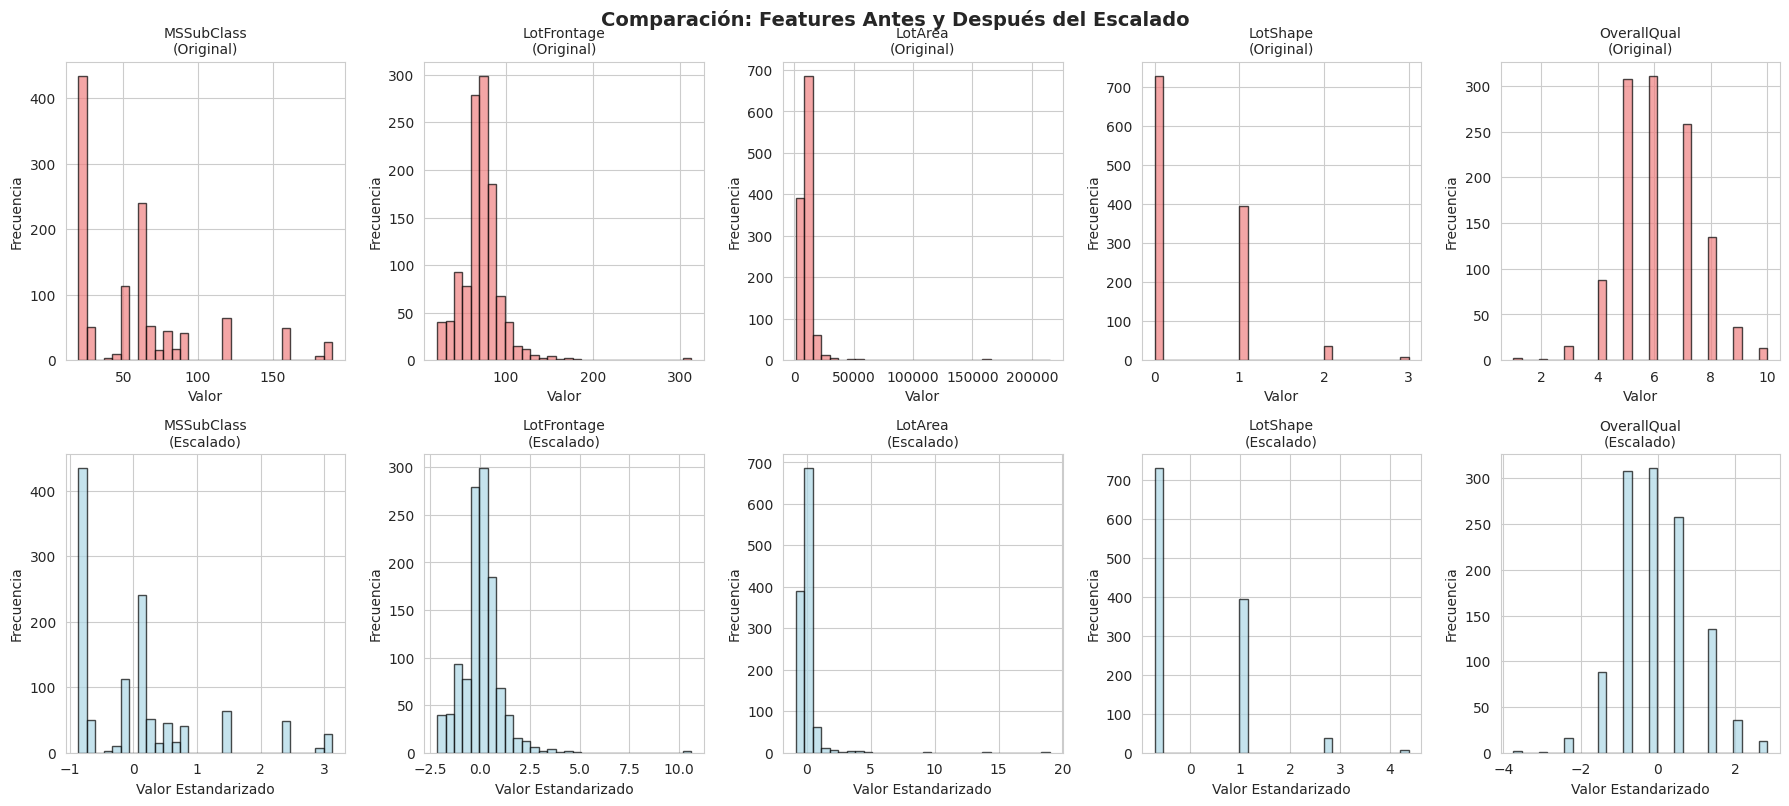


ESCALADO DE FEATURES COMPLETADO



In [43]:
# ============================================================================
# 6.1 PREPARACIÓN DE DATOS - Parte 4: Escalado de Features
# ============================================================================
# Creamos versión escalada de features para modelos que lo requieren:
# - Ridge, Lasso, ElasticNet, SVR
#
# Usamos StandardScaler que:
# - Resta la media (centrado en 0)
# - Divide por la desviación estándar (escala unitaria)
# - Resultado: media=0, std=1 para cada feature

from sklearn.preprocessing import StandardScaler

print("="*80)
print("ESCALADO DE FEATURES CON STANDARDSCALER")
print("="*80)

# ----------------------------------------------------------------------------
# PASO 1: ¿Qué modelos requieren escalado?
# ----------------------------------------------------------------------------
print("\n📋 MODELOS QUE REQUIEREN ESCALADO:")
print("   ✅ Ridge Regression")
print("   ✅ Lasso Regression")
print("   ✅ ElasticNet Regression")
print("   ✅ Support Vector Regressor (SVR)")

print("\n📋 MODELOS QUE NO REQUIEREN ESCALADO:")
print("   ❌ Random Forest")
print("   ❌ XGBoost")
print("   ❌ LightGBM")
print("   ❌ CatBoost")
print("   ❌ Gradient Boosting")

# ----------------------------------------------------------------------------
# PASO 2: Crear versión sin escalar (para modelos de árboles)
# ----------------------------------------------------------------------------
# Simplemente guardamos referencias a los datos originales
X_train_no_scaled = X_train.copy()
X_test_no_scaled = X_test.copy()

print(f"\n✅ Versión SIN ESCALAR guardada:")
print(f"   X_train_no_scaled: {X_train_no_scaled.shape}")
print(f"   X_test_no_scaled:  {X_test_no_scaled.shape}")

# ----------------------------------------------------------------------------
# PASO 3: Aplicar StandardScaler
# ----------------------------------------------------------------------------
# IMPORTANTE: Ajustamos (fit) solo con datos de TRAIN para evitar data leakage
# Luego transformamos tanto train como test con los parámetros aprendidos de train

scaler = StandardScaler()

# Fit + Transform en train
X_train_scaled = scaler.fit_transform(X_train)

# Solo Transform en test (usa parámetros de train)
X_test_scaled = scaler.transform(X_test)

# Convertir de vuelta a DataFrame para mantener nombres de columnas
X_train_scaled = pd.DataFrame(X_train_scaled,
                               columns=X_train.columns,
                               index=X_train.index)

X_test_scaled = pd.DataFrame(X_test_scaled,
                              columns=X_test.columns,
                              index=X_test.index)

print(f"\n✅ Versión ESCALADA creada:")
print(f"   X_train_scaled: {X_train_scaled.shape}")
print(f"   X_test_scaled:  {X_test_scaled.shape}")

# ----------------------------------------------------------------------------
# PASO 4: Verificar el escalado
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("VERIFICACIÓN DEL ESCALADO")
print(f"{'='*80}")

print(f"\n📊 ESTADÍSTICAS ANTES DEL ESCALADO (X_train):")
print(f"   Media promedio de features:    {X_train.mean().mean():.4f}")
print(f"   Std Dev promedio de features:  {X_train.std().mean():.4f}")
print(f"   Rango de medias:               [{X_train.mean().min():.2f}, {X_train.mean().max():.2f}]")
print(f"   Rango de std devs:             [{X_train.std().min():.2f}, {X_train.std().max():.2f}]")

print(f"\n📊 ESTADÍSTICAS DESPUÉS DEL ESCALADO (X_train_scaled):")
print(f"   Media promedio de features:    {X_train_scaled.mean().mean():.10f}")
print(f"   Std Dev promedio de features:  {X_train_scaled.std().mean():.4f}")
print(f"   Rango de medias:               [{X_train_scaled.mean().min():.4f}, {X_train_scaled.mean().max():.4f}]")
print(f"   Rango de std devs:             [{X_train_scaled.std().min():.4f}, {X_train_scaled.std().max():.4f}]")

# Verificación de que el escalado es correcto
if abs(X_train_scaled.mean().mean()) < 1e-10 and abs(X_train_scaled.std().mean() - 1.0) < 0.01:
    print("\n✅ Escalado verificado: Media ≈ 0, Std Dev ≈ 1")
else:
    print("\n⚠️  Advertencia: El escalado no produjo los valores esperados")

# ----------------------------------------------------------------------------
# PASO 5: Visualización del efecto del escalado
# ----------------------------------------------------------------------------
# Comparar algunas features antes y después del escalado
sample_features = X_train.columns[:5].tolist()  # Primeras 5 features

fig, axes = plt.subplots(2, len(sample_features), figsize=(18, 8))

for idx, feature in enumerate(sample_features):
    # Antes del escalado
    axes[0, idx].hist(X_train[feature], bins=30, edgecolor='black',
                      color='lightcoral', alpha=0.7)
    axes[0, idx].set_title(f'{feature}\n(Original)', fontsize=10)
    axes[0, idx].set_xlabel('Valor')
    axes[0, idx].set_ylabel('Frecuencia')

    # Después del escalado
    axes[1, idx].hist(X_train_scaled[feature], bins=30, edgecolor='black',
                      color='lightblue', alpha=0.7)
    axes[1, idx].set_title(f'{feature}\n(Escalado)', fontsize=10)
    axes[1, idx].set_xlabel('Valor Estandarizado')
    axes[1, idx].set_ylabel('Frecuencia')

plt.tight_layout()
plt.suptitle('Comparación: Features Antes y Después del Escalado',
             fontsize=14, fontweight='bold', y=1.002)
plt.show()

print(f"\n{'='*80}")
print("ESCALADO DE FEATURES COMPLETADO")
print(f"{'='*80}\n")


### Resumen de todos los datasets creados y listos para modelar

In [44]:
# ============================================================================
# 6.1 PREPARACIÓN DE DATOS - Parte 5: Resumen Final
# ============================================================================
# Resumen de todos los datasets creados y listos para modelado

print("="*80)
print("RESUMEN DE DATASETS PREPARADOS PARA MODELADO")
print("="*80)

print("\n📦 DATASETS DISPONIBLES:\n")

datasets_info = {
    "X_train": {
        "shape": X_train.shape,
        "descripcion": "Features de entrenamiento (sin escalar)",
        "uso": "Random Forest, XGBoost, LightGBM, CatBoost, Gradient Boosting"
    },
    "X_test": {
        "shape": X_test.shape,
        "descripcion": "Features de prueba (sin escalar)",
        "uso": "Evaluación de modelos de árboles"
    },
    "X_train_scaled": {
        "shape": X_train_scaled.shape,
        "descripcion": "Features de entrenamiento (escaladas)",
        "uso": "Ridge, Lasso, ElasticNet, SVR"
    },
    "X_test_scaled": {
        "shape": X_test_scaled.shape,
        "descripcion": "Features de prueba (escaladas)",
        "uso": "Evaluación de modelos lineales y SVR"
    },
    "y_train": {
        "shape": y_train.shape,
        "descripcion": "Target entrenamiento (escala original)",
        "uso": "Referencia (no se usará para entrenar)"
    },
    "y_test": {
        "shape": y_test.shape,
        "descripcion": "Target prueba (escala original)",
        "uso": "Evaluación final de modelos"
    },
    "y_train_log": {
        "shape": y_train_log.shape,
        "descripcion": "Target entrenamiento (log-transformado)",
        "uso": "Entrenamiento de TODOS los modelos"
    },
    "y_test_log": {
        "shape": y_test_log.shape,
        "descripcion": "Target prueba (log-transformado)",
        "uso": "Evaluación intermedia (se invertirá después)"
    }
}

for nombre, info in datasets_info.items():
    print(f"{'Dataset:':<20} {nombre}")
    print(f"{'Shape:':<20} {info['shape']}")
    print(f"{'Descripción:':<20} {info['descripcion']}")
    print(f"{'Uso:':<20} {info['uso']}")
    print("-" * 80)

print("\n" + "="*80)
print("GUÍA DE USO POR MODELO")
print("="*80)

modelos_config = [
    ("Ridge Regression", "X_train_scaled", "X_test_scaled", "y_train_log", "y_test_log"),
    ("Lasso Regression", "X_train_scaled", "X_test_scaled", "y_train_log", "y_test_log"),
    ("ElasticNet", "X_train_scaled", "X_test_scaled", "y_train_log", "y_test_log"),
    ("Random Forest", "X_train", "X_test", "y_train_log", "y_test_log"),
    ("XGBoost", "X_train", "X_test", "y_train_log", "y_test_log"),
    ("LightGBM", "X_train", "X_test", "y_train_log", "y_test_log"),
    ("CatBoost", "X_train", "X_test", "y_train_log", "y_test_log"),
    ("Gradient Boosting", "X_train", "X_test", "y_train_log", "y_test_log"),
    ("SVR", "X_train_scaled", "X_test_scaled", "y_train_log", "y_test_log"),
    ("Stacking", "Variable según modelos base", "-", "y_train_log", "y_test_log"),
]

print(f"\n{'Modelo':<20} {'X Train':<20} {'X Test':<20} {'y Train':<15} {'y Test':<15}")
print("-" * 95)
for config in modelos_config:
    print(f"{config[0]:<20} {config[1]:<20} {config[2]:<20} {config[3]:<15} {config[4]:<15}")

print("\n" + "="*80)
print("✅ PREPARACIÓN DE DATOS COMPLETADA - LISTO PARA CONSTRUCCIÓN DE MODELOS")
print("="*80)
print("\n💡 PRÓXIMO PASO: Sección 7 - Construcción del Modelo")
print("   Entrenar y evaluar los 10 modelos de machine learning\n")


RESUMEN DE DATASETS PREPARADOS PARA MODELADO

📦 DATASETS DISPONIBLES:

Dataset:             X_train
Shape:               (1168, 190)
Descripción:         Features de entrenamiento (sin escalar)
Uso:                 Random Forest, XGBoost, LightGBM, CatBoost, Gradient Boosting
--------------------------------------------------------------------------------
Dataset:             X_test
Shape:               (292, 190)
Descripción:         Features de prueba (sin escalar)
Uso:                 Evaluación de modelos de árboles
--------------------------------------------------------------------------------
Dataset:             X_train_scaled
Shape:               (1168, 190)
Descripción:         Features de entrenamiento (escaladas)
Uso:                 Ridge, Lasso, ElasticNet, SVR
--------------------------------------------------------------------------------
Dataset:             X_test_scaled
Shape:               (292, 190)
Descripción:         Features de prueba (escaladas)
Uso:          

## 7. Construccion-del-Modelo



In [45]:
# ============================================================================
# 7.0 FUNCIÓN AUXILIAR DE EVALUACIÓN
# ============================================================================
# Antes de entrenar modelos, creamos una función estandarizada para evaluar
# todos los modelos de la misma forma y facilitar la comparación

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

def evaluate_model(y_true, y_pred, y_true_test, y_pred_test, model_name, is_log=True):
    """
    Evalúa el rendimiento de un modelo en conjuntos train y test.

    Parámetros:
    -----------
    y_true : array-like
        Valores reales del conjunto de entrenamiento
    y_pred : array-like
        Predicciones del conjunto de entrenamiento
    y_true_test : array-like
        Valores reales del conjunto de prueba
    y_pred_test : array-like
        Predicciones del conjunto de prueba
    model_name : str
        Nombre del modelo para identificación
    is_log : bool, default=True
        Si True, invierte la transformación logarítmica antes de calcular métricas

    Retorna:
    --------
    dict : Diccionario con todas las métricas calculadas
    """

    # Si los datos están en escala logarítmica, invertir la transformación
    if is_log:
        y_true = np.expm1(y_true)
        y_pred = np.expm1(y_pred)
        y_true_test = np.expm1(y_true_test)
        y_pred_test = np.expm1(y_pred_test)

    # Calcular métricas para conjunto de entrenamiento
    train_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    train_mae = mean_absolute_error(y_true, y_pred)
    train_r2 = r2_score(y_true, y_pred)

    # Calcular métricas para conjunto de prueba
    test_rmse = np.sqrt(mean_squared_error(y_true_test, y_pred_test))
    test_mae = mean_absolute_error(y_true_test, y_pred_test)
    test_r2 = r2_score(y_true_test, y_pred_test)

    # Calcular overfitting score (diferencia entre train y test)
    # Valores altos indican sobreajuste
    overfitting_score = train_r2 - test_r2

    return {
        'Model': model_name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Overfitting': overfitting_score
    }

def print_metrics(metrics_dict):
    """
    Imprime las métricas de evaluación de forma legible y organizada.

    Parámetros:
    -----------
    metrics_dict : dict
        Diccionario con métricas retornado por evaluate_model()
    """
    print(f"\n{'='*80}")
    print(f"MÉTRICAS DE RENDIMIENTO - {metrics_dict['Model']}")
    print(f"{'='*80}")

    print(f"\n{'Métrica':<25} {'Train':<25} {'Test':<25}")
    print("-" * 75)
    print(f"{'RMSE (Error Cuadrático)':<25} ${metrics_dict['Train_RMSE']:>23,.2f} ${metrics_dict['Test_RMSE']:>23,.2f}")
    print(f"{'MAE (Error Absoluto)':<25} ${metrics_dict['Train_MAE']:>23,.2f} ${metrics_dict['Test_MAE']:>23,.2f}")
    print(f"{'R² Score':<25} {metrics_dict['Train_R2']:>23.6f} {metrics_dict['Test_R2']:>23.6f}")

    print(f"\n{'Análisis de Overfitting:':<25}")
    print(f"{'Diferencia R² (Train-Test):':<25} {metrics_dict['Overfitting']:>23.6f}")

    if metrics_dict['Overfitting'] < 0.05:
        print(f"{'Estado:':<25} ✅ Excelente generalización")
    elif metrics_dict['Overfitting'] < 0.10:
        print(f"{'Estado:':<25} ✅ Buena generalización")
    elif metrics_dict['Overfitting'] < 0.15:
        print(f"{'Estado:':<25} ⚠️  Ligero overfitting")
    else:
        print(f"{'Estado:':<25} ❌ Overfitting significativo")

print("="*80)
print("FUNCIONES DE EVALUACIÓN DEFINIDAS")
print("="*80)
print("\n✅ evaluate_model() - Calcula métricas de rendimiento")
print("✅ print_metrics() - Imprime métricas de forma legible")
print("\nEstas funciones se usarán para evaluar todos los modelos de forma consistente.\n")

# Inicializar lista para almacenar resultados de todos los modelos
all_results = []


FUNCIONES DE EVALUACIÓN DEFINIDAS

✅ evaluate_model() - Calcula métricas de rendimiento
✅ print_metrics() - Imprime métricas de forma legible

Estas funciones se usarán para evaluar todos los modelos de forma consistente.



### Ridge regression

MODELO 1: RIDGE REGRESSION

📚 ¿QUÉ ES RIDGE REGRESSION?
--------------------------------------------------------------------------------
Ridge es una extensión de la regresión lineal que añade regularización L2:
  - Minimiza: (Error + alpha * Σ(coeficientes²))
  - Alpha = 0: Regresión lineal ordinaria
  - Alpha grande: Mayor regularización (coeficientes más pequeños)

✅ Ventajas:
  • Maneja bien la multicolinealidad
  • Previene overfitting
  • Mantiene todas las variables (ningún coeficiente es exactamente 0)

⚠️  Desventajas:
  • No hace selección de features
  • Requiere escalado de datos
  • Asume relaciones lineales

PASO 1: BÚSQUEDA DEL MEJOR HIPERPARÁMETRO (ALPHA)

🔍 Probando 12 valores de alpha:
   Rango: 0.001 hasta 5000
   Método: Cross-Validation con 5 folds

⏳ Entrenando RidgeCV...
✅ Cross-validation completada en 2.96 segundos

🎯 MEJOR ALPHA ENCONTRADO: 500.0

PASO 2: ENTRENAMIENTO DEL MODELO FINAL

✅ Modelo Ridge entrenado exitosamente
   Tiempo de entrenamiento: 0.0344 s

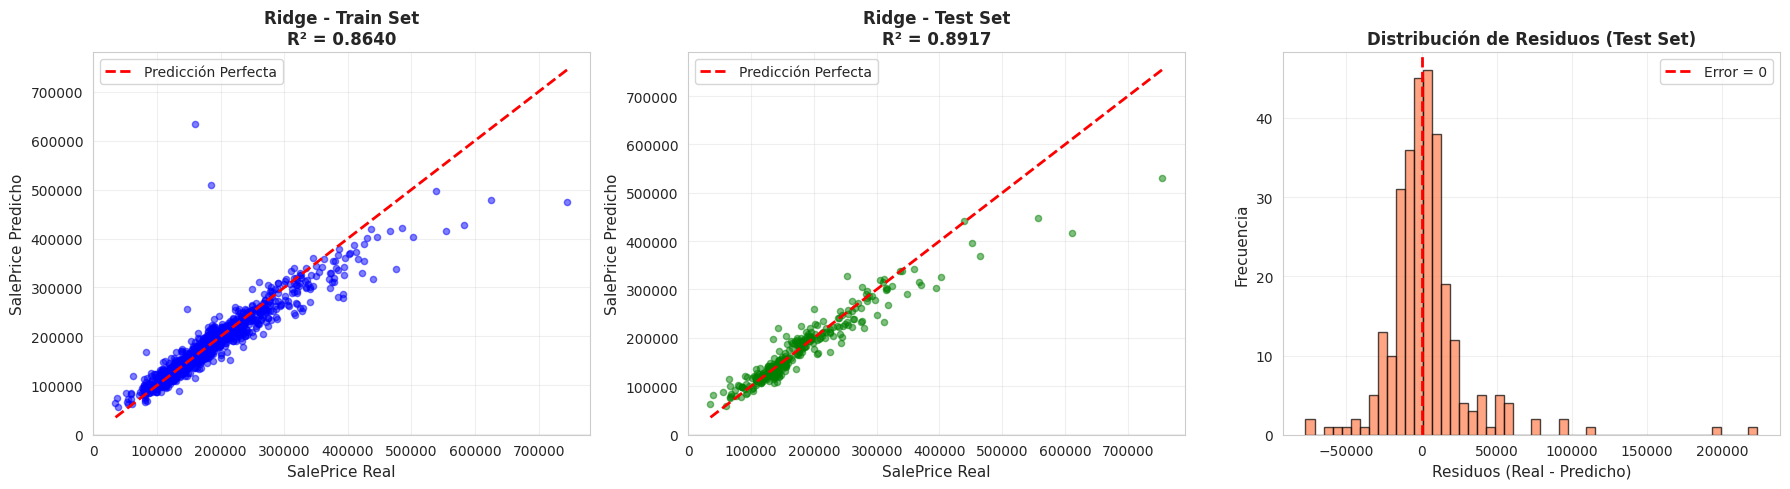


PASO 6: TOP 15 FEATURES MÁS IMPORTANTES

📊 Features con mayor impacto en el precio:

Feature                        Coeficiente     Impacto   
-------------------------------------------------------
OverallQual                          0.042528          +
GrLivArea                            0.032945          +
1stFlrSF                             0.024677          +
GarageCars                           0.024381          +
TotRmsAbvGrd                         0.022839          +
OverallCond                          0.022504          +
FullBath                             0.020378          +
GarageArea                           0.018283          +
KitchenQual                          0.018260          +
Neighborhood_NridgHt                 0.018223          +
BsmtQual                             0.018157          +
YearRemodAdd                         0.017819          +
FireplaceQu                          0.016963          +
2ndFlrSF                             0.016949          +
Ne

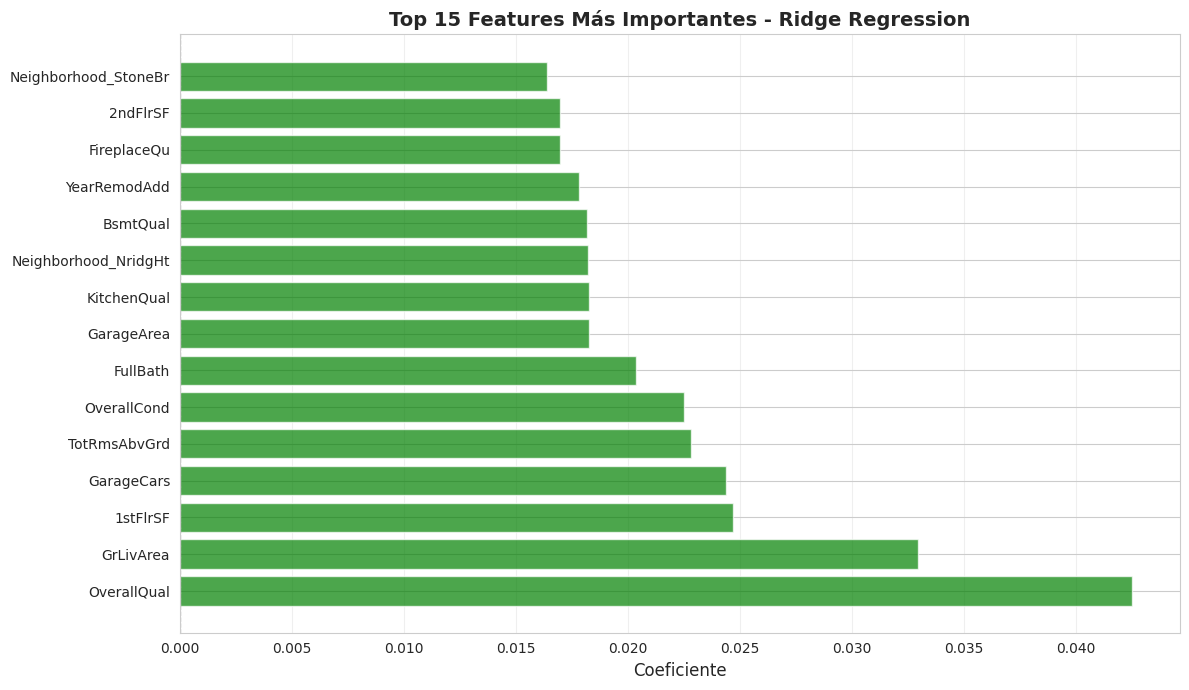


✅ RIDGE REGRESSION COMPLETADO



In [46]:
# ============================================================================
# 7.1 RIDGE REGRESSION
# ============================================================================
# Ridge es una regresión lineal con regularización L2 que:
# - Penaliza coeficientes grandes (suma del cuadrado de coeficientes)
# - Ayuda a manejar multicolinealidad entre features
# - Reduce overfitting manteniendo todas las variables
# - Parámetro alpha controla la fuerza de regularización

from sklearn.linear_model import Ridge, RidgeCV
import matplotlib.pyplot as plt
import seaborn as sns
import time

print("="*80)
print("MODELO 1: RIDGE REGRESSION")
print("="*80)

print("\n📚 ¿QUÉ ES RIDGE REGRESSION?")
print("-" * 80)
print("Ridge es una extensión de la regresión lineal que añade regularización L2:")
print("  - Minimiza: (Error + alpha * Σ(coeficientes²))")
print("  - Alpha = 0: Regresión lineal ordinaria")
print("  - Alpha grande: Mayor regularización (coeficientes más pequeños)")
print("\n✅ Ventajas:")
print("  • Maneja bien la multicolinealidad")
print("  • Previene overfitting")
print("  • Mantiene todas las variables (ningún coeficiente es exactamente 0)")
print("\n⚠️  Desventajas:")
print("  • No hace selección de features")
print("  • Requiere escalado de datos")
print("  • Asume relaciones lineales")

# ----------------------------------------------------------------------------
# PASO 1: CROSS-VALIDATION PARA ENCONTRAR MEJOR ALPHA
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 1: BÚSQUEDA DEL MEJOR HIPERPARÁMETRO (ALPHA)")
print(f"{'='*80}")

# Definir rango de alphas a probar (de menor a mayor regularización)
alphas = [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000]

print(f"\n🔍 Probando {len(alphas)} valores de alpha:")
print(f"   Rango: {alphas[0]} hasta {alphas[-1]}")
print(f"   Método: Cross-Validation con 5 folds")
print("\n⏳ Entrenando RidgeCV...")

# RidgeCV realiza cross-validation automáticamente para encontrar mejor alpha
start_time = time.time()
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train_log)
cv_time = time.time() - start_time

print(f"✅ Cross-validation completada en {cv_time:.2f} segundos")
print(f"\n🎯 MEJOR ALPHA ENCONTRADO: {ridge_cv.alpha_}")

# ----------------------------------------------------------------------------
# PASO 2: ENTRENAR MODELO FINAL CON MEJOR ALPHA
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 2: ENTRENAMIENTO DEL MODELO FINAL")
print(f"{'='*80}")

start_time = time.time()
ridge = Ridge(alpha=ridge_cv.alpha_, random_state=42)
ridge.fit(X_train_scaled, y_train_log)
train_time = time.time() - start_time

print(f"\n✅ Modelo Ridge entrenado exitosamente")
print(f"   Tiempo de entrenamiento: {train_time:.4f} segundos")
print(f"   Alpha utilizado: {ridge_cv.alpha_}")
print(f"   Intercepto: {ridge.intercept_:.4f}")
print(f"   Número de coeficientes: {len(ridge.coef_)}")

# ----------------------------------------------------------------------------
# PASO 3: REALIZAR PREDICCIONES
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 3: PREDICCIONES EN TRAIN Y TEST")
print(f"{'='*80}")

# Predicciones en escala logarítmica
y_train_pred_ridge_log = ridge.predict(X_train_scaled)
y_test_pred_ridge_log = ridge.predict(X_test_scaled)

# Invertir transformación logarítmica para obtener precios reales
y_train_pred_ridge = np.expm1(y_train_pred_ridge_log)
y_test_pred_ridge = np.expm1(y_test_pred_ridge_log)

print(f"\n✅ Predicciones generadas:")
print(f"   Train set: {len(y_train_pred_ridge)} predicciones")
print(f"   Test set:  {len(y_test_pred_ridge)} predicciones")

# Ejemplo de algunas predicciones
print(f"\n📊 Ejemplos de predicciones (Test set):")
print(f"   {'Real':<15} {'Predicho':<15} {'Diferencia':<15}")
print("-" * 45)
for i in range(5):
    real = np.expm1(y_test_log.iloc[i])
    pred = y_test_pred_ridge[i]
    diff = real - pred
    print(f"   ${real:>13,.0f} ${pred:>13,.0f} ${diff:>13,.0f}")

# ----------------------------------------------------------------------------
# PASO 4: EVALUACIÓN DEL MODELO
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 4: EVALUACIÓN DE RENDIMIENTO")
print(f"{'='*80}")

# Calcular métricas usando nuestra función
ridge_metrics = evaluate_model(
    y_train_log, y_train_pred_ridge_log,
    y_test_log, y_test_pred_ridge_log,
    'Ridge Regression', is_log=True
)

# Imprimir métricas
print_metrics(ridge_metrics)

# Guardar resultados para comparación posterior
all_results.append(ridge_metrics)

# ----------------------------------------------------------------------------
# PASO 5: VISUALIZACIÓN DE RESULTADOS
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 5: VISUALIZACIONES")
print(f"{'='*80}\n")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1: Predicciones vs Valores Reales (Train)
axes[0].scatter(np.expm1(y_train_log), y_train_pred_ridge, alpha=0.5, s=20, color='blue')
axes[0].plot([np.expm1(y_train_log).min(), np.expm1(y_train_log).max()],
             [np.expm1(y_train_log).min(), np.expm1(y_train_log).max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[0].set_xlabel('SalePrice Real', fontsize=11)
axes[0].set_ylabel('SalePrice Predicho', fontsize=11)
axes[0].set_title(f'Ridge - Train Set\nR² = {ridge_metrics["Train_R2"]:.4f}',
                  fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Gráfico 2: Predicciones vs Valores Reales (Test)
axes[1].scatter(np.expm1(y_test_log), y_test_pred_ridge, alpha=0.5, s=20, color='green')
axes[1].plot([np.expm1(y_test_log).min(), np.expm1(y_test_log).max()],
             [np.expm1(y_test_log).min(), np.expm1(y_test_log).max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[1].set_xlabel('SalePrice Real', fontsize=11)
axes[1].set_ylabel('SalePrice Predicho', fontsize=11)
axes[1].set_title(f'Ridge - Test Set\nR² = {ridge_metrics["Test_R2"]:.4f}',
                  fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Gráfico 3: Distribución de Residuos (Test)
residuals = np.expm1(y_test_log) - y_test_pred_ridge
axes[2].hist(residuals, bins=50, edgecolor='black', color='coral', alpha=0.7)
axes[2].axvline(0, color='red', linestyle='--', linewidth=2, label='Error = 0')
axes[2].set_xlabel('Residuos (Real - Predicho)', fontsize=11)
axes[2].set_ylabel('Frecuencia', fontsize=11)
axes[2].set_title('Distribución de Residuos (Test Set)', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------
# PASO 6: ANÁLISIS DE COEFICIENTES MÁS IMPORTANTES
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 6: TOP 15 FEATURES MÁS IMPORTANTES")
print(f"{'='*80}")

# Crear DataFrame con coeficientes
coef_ridge = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': ridge.coef_
})

# Ordenar por valor absoluto (importancia)
coef_ridge['Abs_Coefficient'] = np.abs(coef_ridge['Coefficient'])
top_coef_ridge = coef_ridge.nlargest(15, 'Abs_Coefficient')

print(f"\n📊 Features con mayor impacto en el precio:")
print(f"\n{'Feature':<30} {'Coeficiente':<15} {'Impacto':<10}")
print("-" * 55)
for idx, row in top_coef_ridge.iterrows():
    impact = "+" if row['Coefficient'] > 0 else "-"
    print(f"{row['Feature']:<30} {row['Coefficient']:>14.6f} {impact:>10}")

# Visualización de coeficientes
plt.figure(figsize=(12, 7))
colors = ['green' if c > 0 else 'red' for c in top_coef_ridge['Coefficient']]
plt.barh(top_coef_ridge['Feature'], top_coef_ridge['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coeficiente', fontsize=12)
plt.title('Top 15 Features Más Importantes - Ridge Regression',
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n{'='*80}")
print("✅ RIDGE REGRESSION COMPLETADO")
print(f"{'='*80}\n")


### Lasso regression

MODELO 2: LASSO REGRESSION

📚 ¿QUÉ ES LASSO REGRESSION?
--------------------------------------------------------------------------------
Lasso es una regresión lineal con regularización L1:
  - Minimiza: (Error + alpha * Σ|coeficientes|)
  - Puede establecer coeficientes exactamente en 0
  - Realiza selección automática de features

✅ Ventajas:
  • Selección automática de variables (elimina irrelevantes)
  • Genera modelos sparse (simples e interpretables)
  • Útil cuando hay muchas features correlacionadas

⚠️  Desventajas:
  • Si hay features muy correlacionadas, puede elegir arbitrariamente una
  • Requiere escalado de datos
  • Asume relaciones lineales

PASO 1: BÚSQUEDA DEL MEJOR HIPERPARÁMETRO (ALPHA)

🔍 Probando 11 valores de alpha:
   Rango: 1e-05 hasta 100
   Método: Cross-Validation con 5 folds

⏳ Entrenando LassoCV...
✅ Cross-validation completada en 0.98 segundos

🎯 MEJOR ALPHA ENCONTRADO: 0.001

PASO 2: ENTRENAMIENTO DEL MODELO FINAL

✅ Modelo Lasso entrenado exitosamente


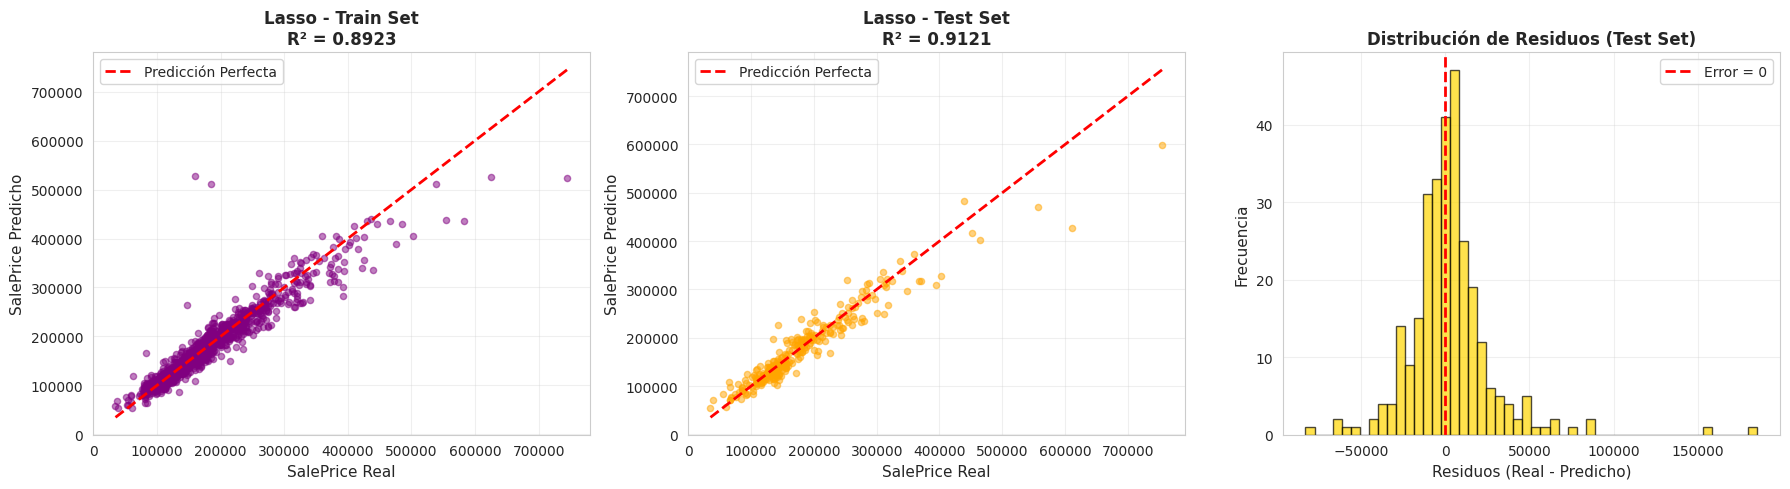


PASO 6: FEATURES SELECCIONADAS POR LASSO

📊 Top 15 Features Seleccionadas (de 138 total):

Feature                        Coeficiente     Impacto   
-------------------------------------------------------
GrLivArea                            0.095462          +
OverallQual                          0.071680          +
GarageCars                           0.041642          +
OverallCond                          0.036056          +
YearBuilt                            0.034855          +
Neighborhood_NridgHt                 0.031145          +
Neighborhood_StoneBr                 0.023440          +
BsmtFullBath                         0.023128          +
Neighborhood_Crawfor                 0.021883          +
BsmtQual                             0.021776          +
Functional                           0.020613          +
BsmtFinType1                         0.019502          +
Exterior1st_BrkFace                  0.019018          +
HalfBath                             0.019011        

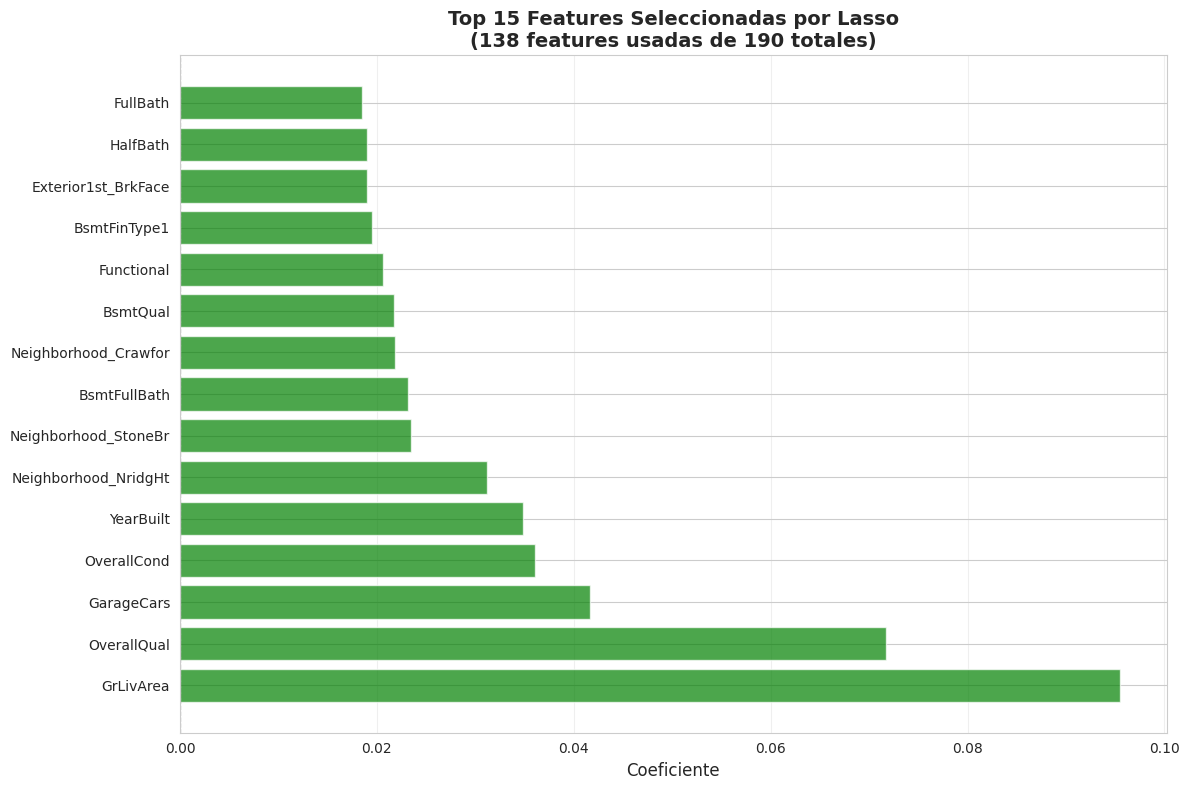


🗑️  Ejemplos de features eliminadas (coeficiente = 0):
   1. LotShape
   2. MasVnrArea
   3. BsmtCond
   4. BsmtFinSF1
   5. BsmtFinType2
   6. BsmtUnfSF
   7. TotalBsmtSF
   8. 2ndFlrSF
   9. GarageYrBlt
   10. GarageCond
   ... y 42 más

✅ LASSO REGRESSION COMPLETADO



In [47]:
# ============================================================================
# 7.2 LASSO REGRESSION
# ============================================================================
# Lasso (Least Absolute Shrinkage and Selection Operator) es una regresión
# lineal con regularización L1 que:
# - Penaliza valores absolutos de coeficientes (suma de |coeficientes|)
# - Puede reducir coeficientes exactamente a 0 (selección automática de features)
# - Simplifica el modelo eliminando variables irrelevantes
# - Útil cuando hay muchas features y queremos identificar las más importantes

from sklearn.linear_model import Lasso, LassoCV
import matplotlib.pyplot as plt
import seaborn as sns
import time

print("="*80)
print("MODELO 2: LASSO REGRESSION")
print("="*80)

print("\n📚 ¿QUÉ ES LASSO REGRESSION?")
print("-" * 80)
print("Lasso es una regresión lineal con regularización L1:")
print("  - Minimiza: (Error + alpha * Σ|coeficientes|)")
print("  - Puede establecer coeficientes exactamente en 0")
print("  - Realiza selección automática de features")
print("\n✅ Ventajas:")
print("  • Selección automática de variables (elimina irrelevantes)")
print("  • Genera modelos sparse (simples e interpretables)")
print("  • Útil cuando hay muchas features correlacionadas")
print("\n⚠️  Desventajas:")
print("  • Si hay features muy correlacionadas, puede elegir arbitrariamente una")
print("  • Requiere escalado de datos")
print("  • Asume relaciones lineales")

# ----------------------------------------------------------------------------
# PASO 1: CROSS-VALIDATION PARA ENCONTRAR MEJOR ALPHA
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 1: BÚSQUEDA DEL MEJOR HIPERPARÁMETRO (ALPHA)")
print(f"{'='*80}")

# Rango de alphas a probar
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]

print(f"\n🔍 Probando {len(alphas)} valores de alpha:")
print(f"   Rango: {alphas[0]} hasta {alphas[-1]}")
print(f"   Método: Cross-Validation con 5 folds")
print("\n⏳ Entrenando LassoCV...")

start_time = time.time()
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train_log)
cv_time = time.time() - start_time

print(f"✅ Cross-validation completada en {cv_time:.2f} segundos")
print(f"\n🎯 MEJOR ALPHA ENCONTRADO: {lasso_cv.alpha_}")

# ----------------------------------------------------------------------------
# PASO 2: ENTRENAR MODELO FINAL CON MEJOR ALPHA
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 2: ENTRENAMIENTO DEL MODELO FINAL")
print(f"{'='*80}")

start_time = time.time()
lasso = Lasso(alpha=lasso_cv.alpha_, max_iter=10000, random_state=42)
lasso.fit(X_train_scaled, y_train_log)
train_time = time.time() - start_time

# Contar features seleccionadas (coeficientes no-cero)
n_features_used = np.sum(lasso.coef_ != 0)
n_features_total = len(lasso.coef_)
n_features_eliminated = n_features_total - n_features_used

print(f"\n✅ Modelo Lasso entrenado exitosamente")
print(f"   Tiempo de entrenamiento: {train_time:.4f} segundos")
print(f"   Alpha utilizado: {lasso_cv.alpha_}")
print(f"   Intercepto: {lasso.intercept_:.4f}")
print(f"\n📊 SELECCIÓN DE FEATURES:")
print(f"   Features totales:     {n_features_total}")
print(f"   Features utilizadas:  {n_features_used} ({n_features_used/n_features_total*100:.1f}%)")
print(f"   Features eliminadas:  {n_features_eliminated} ({n_features_eliminated/n_features_total*100:.1f}%)")
print(f"\n✨ Lasso simplificó el modelo eliminando {n_features_eliminated} features irrelevantes!")

# ----------------------------------------------------------------------------
# PASO 3: REALIZAR PREDICCIONES
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 3: PREDICCIONES EN TRAIN Y TEST")
print(f"{'='*80}")

y_train_pred_lasso_log = lasso.predict(X_train_scaled)
y_test_pred_lasso_log = lasso.predict(X_test_scaled)

y_train_pred_lasso = np.expm1(y_train_pred_lasso_log)
y_test_pred_lasso = np.expm1(y_test_pred_lasso_log)

print(f"\n✅ Predicciones generadas usando {n_features_used} features seleccionadas")
print(f"   Train set: {len(y_train_pred_lasso)} predicciones")
print(f"   Test set:  {len(y_test_pred_lasso)} predicciones")

print(f"\n📊 Ejemplos de predicciones (Test set):")
print(f"   {'Real':<15} {'Predicho':<15} {'Diferencia':<15}")
print("-" * 45)
for i in range(5):
    real = np.expm1(y_test_log.iloc[i])
    pred = y_test_pred_lasso[i]
    diff = real - pred
    print(f"   ${real:>13,.0f} ${pred:>13,.0f} ${diff:>13,.0f}")

# ----------------------------------------------------------------------------
# PASO 4: EVALUACIÓN DEL MODELO
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 4: EVALUACIÓN DE RENDIMIENTO")
print(f"{'='*80}")

lasso_metrics = evaluate_model(
    y_train_log, y_train_pred_lasso_log,
    y_test_log, y_test_pred_lasso_log,
    'Lasso Regression', is_log=True
)

print_metrics(lasso_metrics)
all_results.append(lasso_metrics)

# ----------------------------------------------------------------------------
# PASO 5: VISUALIZACIÓN DE RESULTADOS
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 5: VISUALIZACIONES")
print(f"{'='*80}\n")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1: Predicciones vs Reales (Train)
axes[0].scatter(np.expm1(y_train_log), y_train_pred_lasso, alpha=0.5, s=20, color='purple')
axes[0].plot([np.expm1(y_train_log).min(), np.expm1(y_train_log).max()],
             [np.expm1(y_train_log).min(), np.expm1(y_train_log).max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[0].set_xlabel('SalePrice Real', fontsize=11)
axes[0].set_ylabel('SalePrice Predicho', fontsize=11)
axes[0].set_title(f'Lasso - Train Set\nR² = {lasso_metrics["Train_R2"]:.4f}',
                  fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Gráfico 2: Predicciones vs Reales (Test)
axes[1].scatter(np.expm1(y_test_log), y_test_pred_lasso, alpha=0.5, s=20, color='orange')
axes[1].plot([np.expm1(y_test_log).min(), np.expm1(y_test_log).max()],
             [np.expm1(y_test_log).min(), np.expm1(y_test_log).max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[1].set_xlabel('SalePrice Real', fontsize=11)
axes[1].set_ylabel('SalePrice Predicho', fontsize=11)
axes[1].set_title(f'Lasso - Test Set\nR² = {lasso_metrics["Test_R2"]:.4f}',
                  fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Gráfico 3: Distribución de Residuos
residuals = np.expm1(y_test_log) - y_test_pred_lasso
axes[2].hist(residuals, bins=50, edgecolor='black', color='gold', alpha=0.7)
axes[2].axvline(0, color='red', linestyle='--', linewidth=2, label='Error = 0')
axes[2].set_xlabel('Residuos (Real - Predicho)', fontsize=11)
axes[2].set_ylabel('Frecuencia', fontsize=11)
axes[2].set_title('Distribución de Residuos (Test Set)', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------
# PASO 6: ANÁLISIS DE FEATURES SELECCIONADAS
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 6: FEATURES SELECCIONADAS POR LASSO")
print(f"{'='*80}")

# Crear DataFrame con coeficientes
coef_lasso = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': lasso.coef_
})

# Filtrar solo features con coeficiente no-cero (seleccionadas)
coef_lasso_nonzero = coef_lasso[coef_lasso['Coefficient'] != 0].copy()
coef_lasso_nonzero['Abs_Coefficient'] = np.abs(coef_lasso_nonzero['Coefficient'])
coef_lasso_nonzero = coef_lasso_nonzero.sort_values('Abs_Coefficient', ascending=False)

print(f"\n📊 Top 15 Features Seleccionadas (de {n_features_used} total):")
print(f"\n{'Feature':<30} {'Coeficiente':<15} {'Impacto':<10}")
print("-" * 55)
for idx, row in coef_lasso_nonzero.head(15).iterrows():
    impact = "+" if row['Coefficient'] > 0 else "-"
    print(f"{row['Feature']:<30} {row['Coefficient']:>14.6f} {impact:>10}")

# Visualización
plt.figure(figsize=(12, 8))
top_15 = coef_lasso_nonzero.head(15)
colors = ['green' if c > 0 else 'red' for c in top_15['Coefficient']]
plt.barh(top_15['Feature'], top_15['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coeficiente', fontsize=12)
plt.title(f'Top 15 Features Seleccionadas por Lasso\n({n_features_used} features usadas de {n_features_total} totales)',
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Mostrar algunas features eliminadas
features_eliminated = coef_lasso[coef_lasso['Coefficient'] == 0]['Feature'].tolist()
print(f"\n🗑️  Ejemplos de features eliminadas (coeficiente = 0):")
for i, feat in enumerate(features_eliminated[:10]):
    print(f"   {i+1}. {feat}")
if len(features_eliminated) > 10:
    print(f"   ... y {len(features_eliminated) - 10} más")

print(f"\n{'='*80}")
print("✅ LASSO REGRESSION COMPLETADO")
print(f"{'='*80}\n")


### Elasticnet regression

MODELO 3: ELASTICNET REGRESSION

📚 ¿QUÉ ES ELASTICNET?
--------------------------------------------------------------------------------
ElasticNet combina regularización L1 (Lasso) y L2 (Ridge):
  - Minimiza: (Error + alpha * [l1_ratio * Σ|coef| + (1-l1_ratio) * Σcoef²])
  - Dos hiperparámetros: alpha (fuerza) y l1_ratio (balance L1/L2)

✅ Ventajas:
  • Combina ventajas de Ridge y Lasso
  • Más robusto que Lasso cuando hay features correlacionadas
  • Puede hacer selección de features (como Lasso)
  • Mantiene grupos de features correlacionadas (como Ridge)

⚠️  Desventajas:
  • Dos hiperparámetros para tunear (más complejo)
  • Requiere escalado de datos
  • Asume relaciones lineales

PASO 1: BÚSQUEDA DE MEJORES HIPERPARÁMETROS (ALPHA Y L1_RATIO)

🔍 Configuración de búsqueda:
   Alphas a probar: 9 valores
   L1_ratios a probar: 7 valores
   Total de combinaciones: 63
   Método: Cross-Validation con 5 folds

   💡 l1_ratio explica el balance L1/L2:
      • l1_ratio = 1.0  → 100% Lasso (

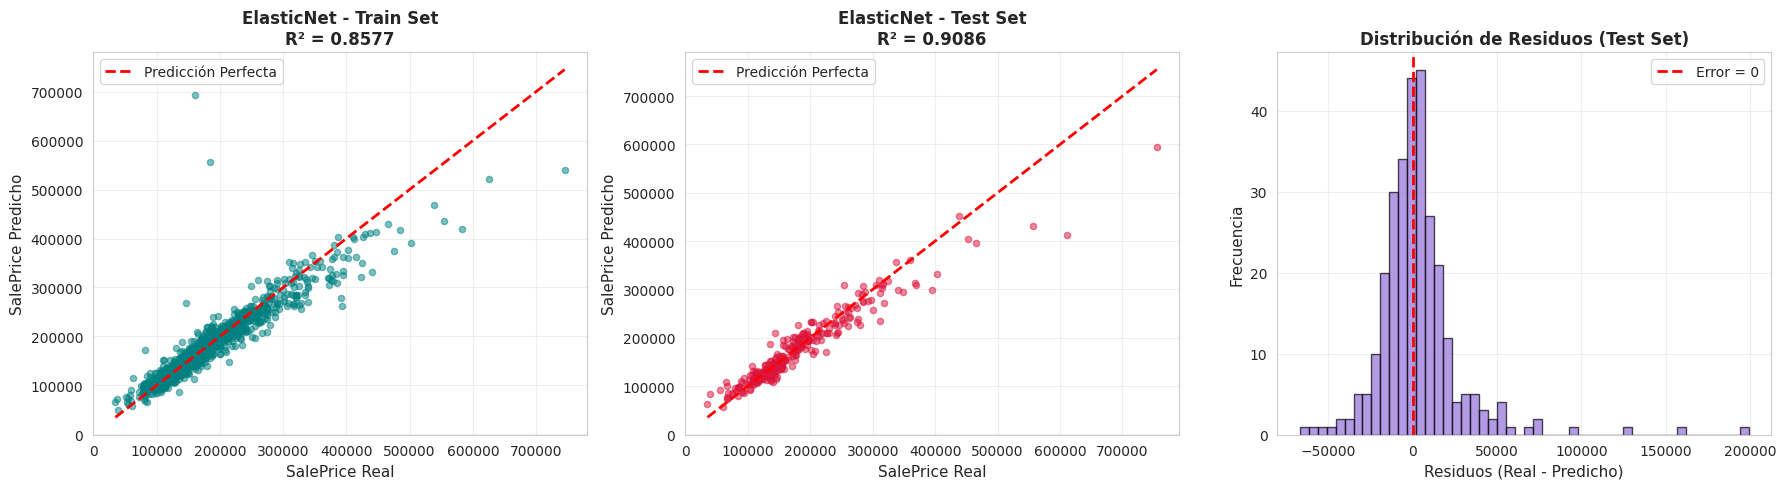


PASO 6: FEATURES SELECCIONADAS

📊 Top 15 Features Seleccionadas:

Feature                        Coeficiente     Impacto   
-------------------------------------------------------
GrLivArea                            0.092668          +
OverallQual                          0.082567          +
GarageCars                           0.042862          +
OverallCond                          0.029694          +
YearBuilt                            0.026925          +
BsmtFullBath                         0.022185          +
BsmtQual                             0.021910          +
Neighborhood_NridgHt                 0.021103          +
MSZoning_RM                         -0.019796          -
Neighborhood_Crawfor                 0.017229          +
FireplaceQu                          0.017139          +
Functional                           0.016923          +
BsmtFinType1                         0.016481          +
1stFlrSF                             0.016425          +
Exterior1st_BrkFace  

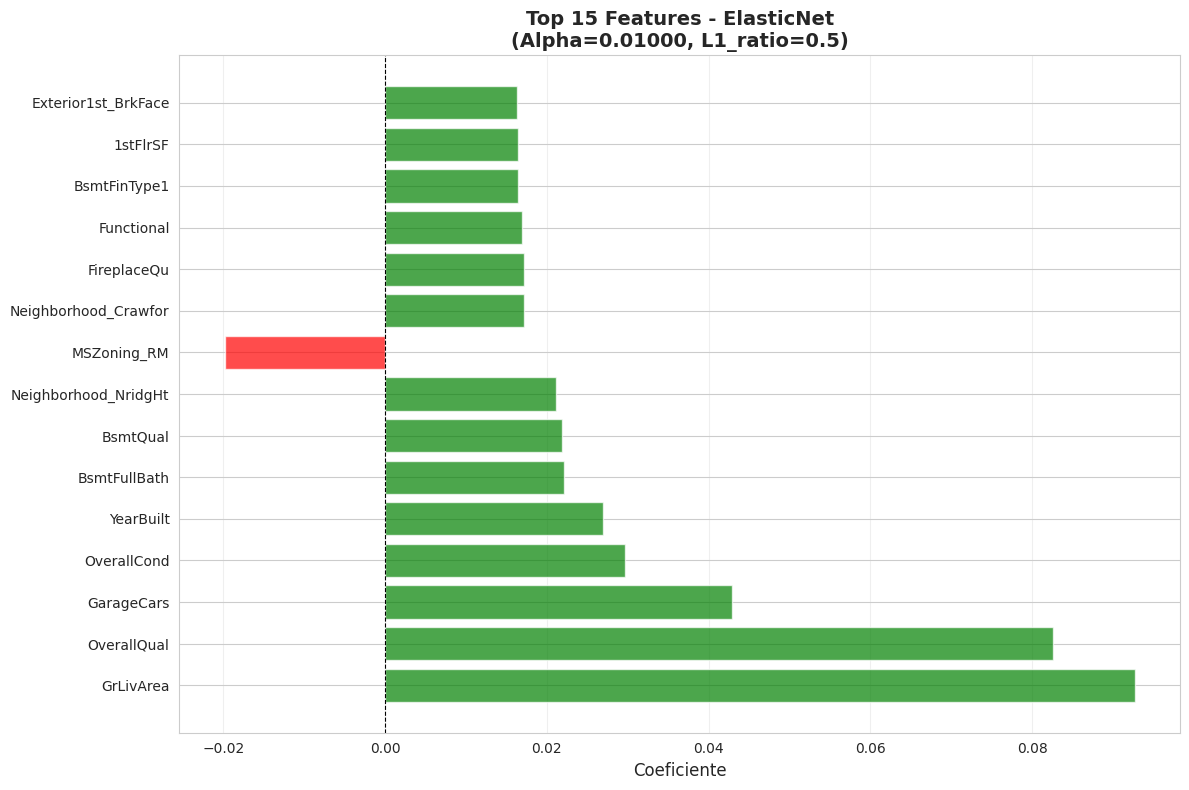


✅ ELASTICNET REGRESSION COMPLETADO



In [48]:
# ============================================================================
# 7.3 ELASTICNET REGRESSION
# ============================================================================
# ElasticNet combina las penalizaciones L1 (Lasso) y L2 (Ridge):
# - Combina lo mejor de Ridge y Lasso
# - Parámetro l1_ratio controla el balance entre L1 y L2
# - l1_ratio=1: comportamiento 100% Lasso
# - l1_ratio=0: comportamiento 100% Ridge
# - l1_ratio entre 0 y 1: combinación de ambos

from sklearn.linear_model import ElasticNet, ElasticNetCV
import matplotlib.pyplot as plt
import seaborn as sns
import time

print("="*80)
print("MODELO 3: ELASTICNET REGRESSION")
print("="*80)

print("\n📚 ¿QUÉ ES ELASTICNET?")
print("-" * 80)
print("ElasticNet combina regularización L1 (Lasso) y L2 (Ridge):")
print("  - Minimiza: (Error + alpha * [l1_ratio * Σ|coef| + (1-l1_ratio) * Σcoef²])")
print("  - Dos hiperparámetros: alpha (fuerza) y l1_ratio (balance L1/L2)")
print("\n✅ Ventajas:")
print("  • Combina ventajas de Ridge y Lasso")
print("  • Más robusto que Lasso cuando hay features correlacionadas")
print("  • Puede hacer selección de features (como Lasso)")
print("  • Mantiene grupos de features correlacionadas (como Ridge)")
print("\n⚠️  Desventajas:")
print("  • Dos hiperparámetros para tunear (más complejo)")
print("  • Requiere escalado de datos")
print("  • Asume relaciones lineales")

# ----------------------------------------------------------------------------
# PASO 1: CROSS-VALIDATION PARA ENCONTRAR MEJORES HIPERPARÁMETROS
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 1: BÚSQUEDA DE MEJORES HIPERPARÁMETROS (ALPHA Y L1_RATIO)")
print(f"{'='*80}")

# Definir rangos a probar
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99]

print(f"\n🔍 Configuración de búsqueda:")
print(f"   Alphas a probar: {len(alphas)} valores")
print(f"   L1_ratios a probar: {len(l1_ratios)} valores")
print(f"   Total de combinaciones: {len(alphas) * len(l1_ratios)}")
print(f"   Método: Cross-Validation con 5 folds")
print("\n   💡 l1_ratio explica el balance L1/L2:")
print("      • l1_ratio = 1.0  → 100% Lasso (solo L1)")
print("      • l1_ratio = 0.5  → 50% Lasso, 50% Ridge")
print("      • l1_ratio = 0.0  → 100% Ridge (solo L2)")
print("\n⏳ Entrenando ElasticNetCV...")

start_time = time.time()
elasticnet_cv = ElasticNetCV(
    alphas=alphas,
    l1_ratio=l1_ratios,
    cv=5,
    random_state=42,
    max_iter=10000,
    n_jobs=-1  # Usar todos los núcleos disponibles
)
elasticnet_cv.fit(X_train_scaled, y_train_log)
cv_time = time.time() - start_time

print(f"✅ Cross-validation completada en {cv_time:.2f} segundos")
print(f"\n🎯 MEJORES HIPERPARÁMETROS ENCONTRADOS:")
print(f"   Alpha:    {elasticnet_cv.alpha_}")
print(f"   L1_ratio: {elasticnet_cv.l1_ratio_}")

# Interpretar el l1_ratio
if elasticnet_cv.l1_ratio_ > 0.8:
    print(f"\n   💡 Interpretación: Comportamiento más cercano a Lasso (selección de features)")
elif elasticnet_cv.l1_ratio_ < 0.3:
    print(f"\n   💡 Interpretación: Comportamiento más cercano a Ridge (mantiene todas las features)")
else:
    print(f"\n   💡 Interpretación: Balance equilibrado entre Lasso y Ridge")

# ----------------------------------------------------------------------------
# PASO 2: ENTRENAR MODELO FINAL
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 2: ENTRENAMIENTO DEL MODELO FINAL")
print(f"{'='*80}")

start_time = time.time()
elasticnet = ElasticNet(
    alpha=elasticnet_cv.alpha_,
    l1_ratio=elasticnet_cv.l1_ratio_,
    max_iter=10000,
    random_state=42
)
elasticnet.fit(X_train_scaled, y_train_log)
train_time = time.time() - start_time

# Analizar features seleccionadas
n_features_used = np.sum(elasticnet.coef_ != 0)
n_features_total = len(elasticnet.coef_)
n_features_eliminated = n_features_total - n_features_used

print(f"\n✅ Modelo ElasticNet entrenado exitosamente")
print(f"   Tiempo de entrenamiento: {train_time:.4f} segundos")
print(f"   Alpha: {elasticnet_cv.alpha_}")
print(f"   L1_ratio: {elasticnet_cv.l1_ratio_}")
print(f"   Intercepto: {elasticnet.intercept_:.4f}")
print(f"\n📊 SELECCIÓN DE FEATURES:")
print(f"   Features totales:     {n_features_total}")
print(f"   Features utilizadas:  {n_features_used} ({n_features_used/n_features_total*100:.1f}%)")
print(f"   Features eliminadas:  {n_features_eliminated} ({n_features_eliminated/n_features_total*100:.1f}%)")

# ----------------------------------------------------------------------------
# PASO 3: REALIZAR PREDICCIONES
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 3: PREDICCIONES EN TRAIN Y TEST")
print(f"{'='*80}")

y_train_pred_elasticnet_log = elasticnet.predict(X_train_scaled)
y_test_pred_elasticnet_log = elasticnet.predict(X_test_scaled)

y_train_pred_elasticnet = np.expm1(y_train_pred_elasticnet_log)
y_test_pred_elasticnet = np.expm1(y_test_pred_elasticnet_log)

print(f"\n✅ Predicciones generadas")
print(f"   Train set: {len(y_train_pred_elasticnet)} predicciones")
print(f"   Test set:  {len(y_test_pred_elasticnet)} predicciones")

print(f"\n📊 Ejemplos de predicciones (Test set):")
print(f"   {'Real':<15} {'Predicho':<15} {'Diferencia':<15}")
print("-" * 45)
for i in range(5):
    real = np.expm1(y_test_log.iloc[i])
    pred = y_test_pred_elasticnet[i]
    diff = real - pred
    print(f"   ${real:>13,.0f} ${pred:>13,.0f} ${diff:>13,.0f}")

# ----------------------------------------------------------------------------
# PASO 4: EVALUACIÓN DEL MODELO
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 4: EVALUACIÓN DE RENDIMIENTO")
print(f"{'='*80}")

elasticnet_metrics = evaluate_model(
    y_train_log, y_train_pred_elasticnet_log,
    y_test_log, y_test_pred_elasticnet_log,
    'ElasticNet', is_log=True
)

print_metrics(elasticnet_metrics)
all_results.append(elasticnet_metrics)

# ----------------------------------------------------------------------------
# PASO 5: VISUALIZACIÓN DE RESULTADOS
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 5: VISUALIZACIONES")
print(f"{'='*80}\n")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1: Train
axes[0].scatter(np.expm1(y_train_log), y_train_pred_elasticnet, alpha=0.5, s=20, color='teal')
axes[0].plot([np.expm1(y_train_log).min(), np.expm1(y_train_log).max()],
             [np.expm1(y_train_log).min(), np.expm1(y_train_log).max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[0].set_xlabel('SalePrice Real', fontsize=11)
axes[0].set_ylabel('SalePrice Predicho', fontsize=11)
axes[0].set_title(f'ElasticNet - Train Set\nR² = {elasticnet_metrics["Train_R2"]:.4f}',
                  fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Gráfico 2: Test
axes[1].scatter(np.expm1(y_test_log), y_test_pred_elasticnet, alpha=0.5, s=20, color='crimson')
axes[1].plot([np.expm1(y_test_log).min(), np.expm1(y_test_log).max()],
             [np.expm1(y_test_log).min(), np.expm1(y_test_log).max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[1].set_xlabel('SalePrice Real', fontsize=11)
axes[1].set_ylabel('SalePrice Predicho', fontsize=11)
axes[1].set_title(f'ElasticNet - Test Set\nR² = {elasticnet_metrics["Test_R2"]:.4f}',
                  fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Gráfico 3: Residuos
residuals = np.expm1(y_test_log) - y_test_pred_elasticnet
axes[2].hist(residuals, bins=50, edgecolor='black', color='mediumpurple', alpha=0.7)
axes[2].axvline(0, color='red', linestyle='--', linewidth=2, label='Error = 0')
axes[2].set_xlabel('Residuos (Real - Predicho)', fontsize=11)
axes[2].set_ylabel('Frecuencia', fontsize=11)
axes[2].set_title('Distribución de Residuos (Test Set)', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------
# PASO 6: ANÁLISIS DE FEATURES
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 6: FEATURES SELECCIONADAS")
print(f"{'='*80}")

coef_elasticnet = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': elasticnet.coef_
})

coef_elasticnet_nonzero = coef_elasticnet[coef_elasticnet['Coefficient'] != 0].copy()
coef_elasticnet_nonzero['Abs_Coefficient'] = np.abs(coef_elasticnet_nonzero['Coefficient'])
coef_elasticnet_nonzero = coef_elasticnet_nonzero.sort_values('Abs_Coefficient', ascending=False)

print(f"\n📊 Top 15 Features Seleccionadas:")
print(f"\n{'Feature':<30} {'Coeficiente':<15} {'Impacto':<10}")
print("-" * 55)
for idx, row in coef_elasticnet_nonzero.head(15).iterrows():
    impact = "+" if row['Coefficient'] > 0 else "-"
    print(f"{row['Feature']:<30} {row['Coefficient']:>14.6f} {impact:>10}")

plt.figure(figsize=(12, 8))
top_15 = coef_elasticnet_nonzero.head(15)
colors = ['green' if c > 0 else 'red' for c in top_15['Coefficient']]
plt.barh(top_15['Feature'], top_15['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coeficiente', fontsize=12)
plt.title(f'Top 15 Features - ElasticNet\n(Alpha={elasticnet_cv.alpha_:.5f}, L1_ratio={elasticnet_cv.l1_ratio_})',
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n{'='*80}")
print("✅ ELASTICNET REGRESSION COMPLETADO")
print(f"{'='*80}\n")


### Random Forest regressor

MODELO 4: RANDOM FOREST REGRESSOR

📚 ¿QUÉ ES RANDOM FOREST?
--------------------------------------------------------------------------------
Random Forest es un ensemble (conjunto) de árboles de decisión:
  - Construye múltiples árboles independientes
  - Cada árbol se entrena con una muestra aleatoria (bagging)
  - La predicción final es el promedio de todos los árboles

✅ Ventajas:
  • NO requiere escalado de datos
  • Maneja relaciones no lineales complejas
  • Robusto a outliers
  • Proporciona importancia de features
  • Reduce overfitting mediante promediado

⚠️  Desventajas:
  • Puede ser lento con muchos árboles
  • Menos interpretable que modelos lineales
  • Requiere más memoria

PASO 1: CONFIGURACIÓN DE HIPERPARÁMETROS

💡 HIPERPARÁMETROS CLAVE DE RANDOM FOREST:
--------------------------------------------------------------------------------
  • n_estimators:    Número de árboles (más árboles = mejor pero más lento)
  • max_depth:       Profundidad máxima de cada árbol (contr

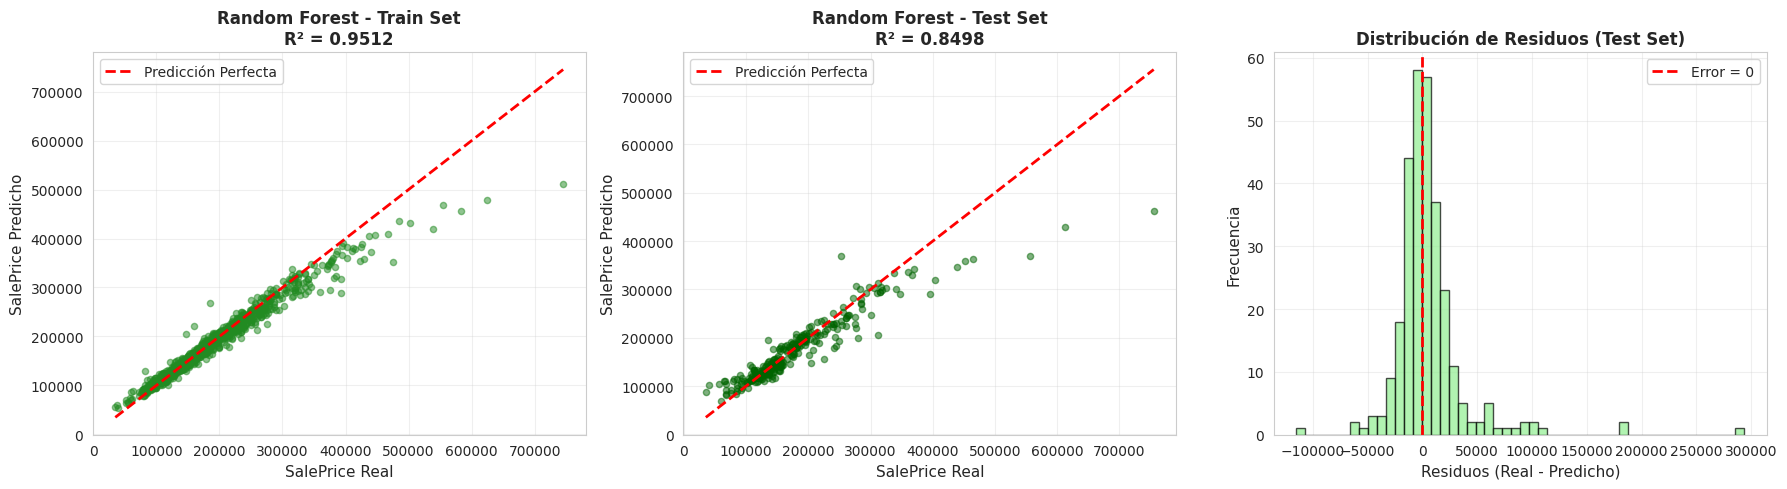


PASO 6: IMPORTANCIA DE FEATURES

📊 Top 20 Features Más Importantes:

Rank   Feature                        Importancia    
-------------------------------------------------------
1      OverallQual                    0.077332
2      GrLivArea                      0.066281
3      YearBuilt                      0.063948
4      GarageCars                     0.048991
5      BsmtQual                       0.043508
6      1stFlrSF                       0.042198
7      FireplaceQu                    0.039625
8      KitchenQual                    0.038563
9      TotalBsmtSF                    0.038519
10     GarageYrBlt                    0.032097
11     GarageArea                     0.030315
12     GarageFinish                   0.029518
13     ExterQual                      0.028930
14     LotArea                        0.025232
15     FullBath                       0.023305
16     YearRemodAdd                   0.023209
17     Foundation_PConc               0.020764
18     TotRmsAbvGrd  

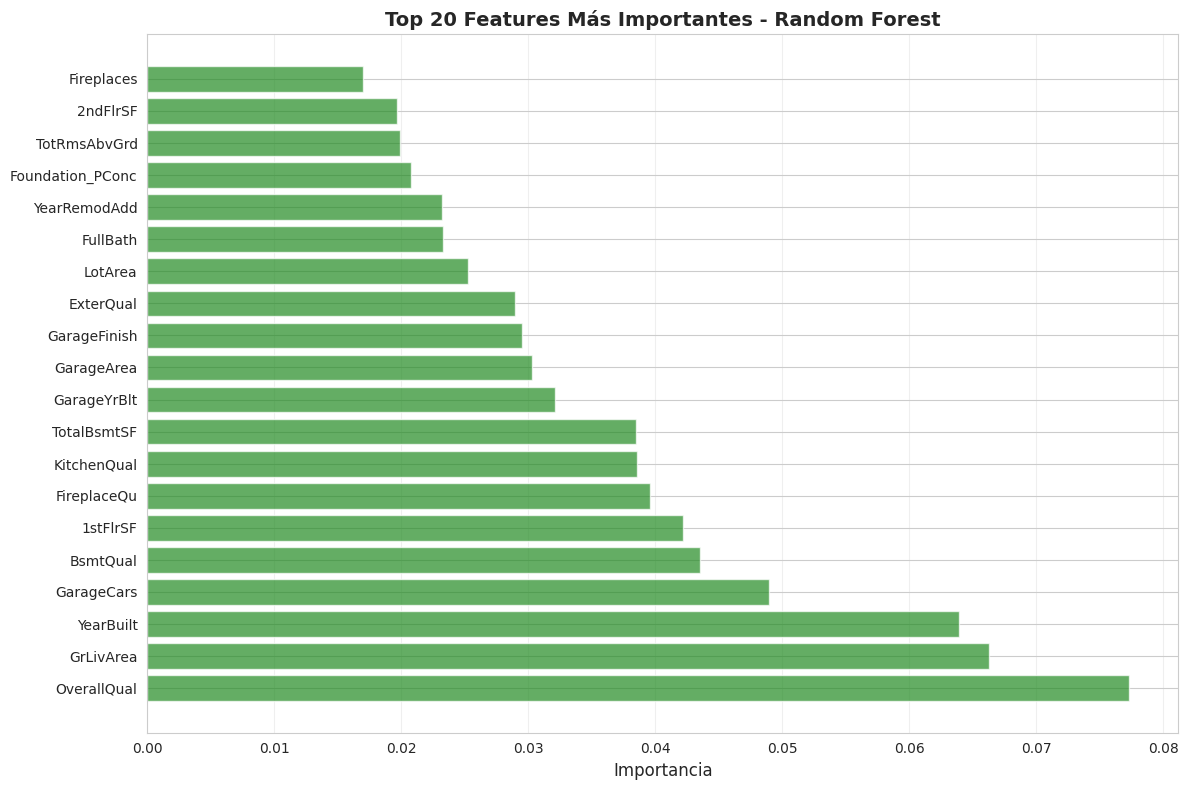


💡 INTERPRETACIÓN DE IMPORTANCIA:
   La importancia mide cuánto reduce cada feature la impureza (error)
   en los splits de los árboles. Mayor importancia = mayor influencia.

✅ RANDOM FOREST COMPLETADO



In [49]:
# ============================================================================
# 7.4 RANDOM FOREST REGRESSOR
# ============================================================================
# Random Forest es un ensemble de múltiples árboles de decisión que:
# - Construye muchos árboles de decisión independientes
# - Cada árbol usa una muestra aleatoria de datos (bootstrap)
# - Cada split usa un subconjunto aleatorio de features
# - La predicción final es el promedio de todos los árboles
# - NO requiere escalado de datos
# - Maneja bien relaciones no lineales y outliers

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import time

print("="*80)
print("MODELO 4: RANDOM FOREST REGRESSOR")
print("="*80)

print("\n📚 ¿QUÉ ES RANDOM FOREST?")
print("-" * 80)
print("Random Forest es un ensemble (conjunto) de árboles de decisión:")
print("  - Construye múltiples árboles independientes")
print("  - Cada árbol se entrena con una muestra aleatoria (bagging)")
print("  - La predicción final es el promedio de todos los árboles")
print("\n✅ Ventajas:")
print("  • NO requiere escalado de datos")
print("  • Maneja relaciones no lineales complejas")
print("  • Robusto a outliers")
print("  • Proporciona importancia de features")
print("  • Reduce overfitting mediante promediado")
print("\n⚠️  Desventajas:")
print("  • Puede ser lento con muchos árboles")
print("  • Menos interpretable que modelos lineales")
print("  • Requiere más memoria")

# ----------------------------------------------------------------------------
# PASO 1: CONFIGURACIÓN DE HIPERPARÁMETROS
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 1: CONFIGURACIÓN DE HIPERPARÁMETROS")
print(f"{'='*80}")

print("\n💡 HIPERPARÁMETROS CLAVE DE RANDOM FOREST:")
print("-" * 80)
print("  • n_estimators:    Número de árboles (más árboles = mejor pero más lento)")
print("  • max_depth:       Profundidad máxima de cada árbol (controla overfitting)")
print("  • min_samples_split: Muestras mínimas para dividir un nodo")
print("  • min_samples_leaf:  Muestras mínimas en una hoja")
print("  • max_features:    Número de features a considerar en cada split")

# Definir grid de hiperparámetros para búsqueda
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

print(f"\n🔍 Configuración de búsqueda:")
print(f"   Método: Randomized Search (búsqueda aleatoria)")
print(f"   Iteraciones: 20 combinaciones aleatorias")
print(f"   Cross-Validation: 3 folds")
print(f"   Scoring: Negative MSE")
print("\n⏳ Buscando mejores hiperparámetros (esto puede tardar unos minutos)...")

start_time = time.time()
rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    verbose=0,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# IMPORTANTE: Random Forest NO requiere datos escalados, usa datos originales
rf_random.fit(X_train, y_train_log)
search_time = time.time() - start_time

print(f"✅ Búsqueda completada en {search_time:.2f} segundos")
print(f"\n🎯 MEJORES HIPERPARÁMETROS ENCONTRADOS:")
for param, value in rf_random.best_params_.items():
    print(f"   {param:<20}: {value}")

# ----------------------------------------------------------------------------
# PASO 2: ENTRENAR MODELO FINAL CON MEJORES HIPERPARÁMETROS
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 2: ENTRENAMIENTO DEL MODELO FINAL")
print(f"{'='*80}")

start_time = time.time()
rf = rf_random.best_estimator_
train_time = time.time() - start_time

print(f"\n✅ Modelo Random Forest entrenado exitosamente")
print(f"   Tiempo de entrenamiento: {train_time:.4f} segundos")
print(f"   Número de árboles: {rf.n_estimators}")
print(f"   Profundidad máxima: {rf.max_depth}")
print(f"\n📊 INFORMACIÓN DEL MODELO:")
print(f"   Total de nodos en todos los árboles: {sum(tree.tree_.node_count for tree in rf.estimators_):,}")
print(f"   Features utilizadas: {X_train.shape[1]}")

# ----------------------------------------------------------------------------
# PASO 3: REALIZAR PREDICCIONES
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 3: PREDICCIONES EN TRAIN Y TEST")
print(f"{'='*80}")

y_train_pred_rf_log = rf.predict(X_train)
y_test_pred_rf_log = rf.predict(X_test)

y_train_pred_rf = np.expm1(y_train_pred_rf_log)
y_test_pred_rf = np.expm1(y_test_pred_rf_log)

print(f"\n✅ Predicciones generadas por {rf.n_estimators} árboles")
print(f"   Train set: {len(y_train_pred_rf)} predicciones")
print(f"   Test set:  {len(y_test_pred_rf)} predicciones")

print(f"\n📊 Ejemplos de predicciones (Test set):")
print(f"   {'Real':<15} {'Predicho':<15} {'Diferencia':<15}")
print("-" * 45)
for i in range(5):
    real = np.expm1(y_test_log.iloc[i])
    pred = y_test_pred_rf[i]
    diff = real - pred
    print(f"   ${real:>13,.0f} ${pred:>13,.0f} ${diff:>13,.0f}")

# ----------------------------------------------------------------------------
# PASO 4: EVALUACIÓN DEL MODELO
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 4: EVALUACIÓN DE RENDIMIENTO")
print(f"{'='*80}")

rf_metrics = evaluate_model(
    y_train_log, y_train_pred_rf_log,
    y_test_log, y_test_pred_rf_log,
    'Random Forest', is_log=True
)

print_metrics(rf_metrics)
all_results.append(rf_metrics)

# ----------------------------------------------------------------------------
# PASO 5: VISUALIZACIÓN DE RESULTADOS
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 5: VISUALIZACIONES")
print(f"{'='*80}\n")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1: Train
axes[0].scatter(np.expm1(y_train_log), y_train_pred_rf, alpha=0.5, s=20, color='forestgreen')
axes[0].plot([np.expm1(y_train_log).min(), np.expm1(y_train_log).max()],
             [np.expm1(y_train_log).min(), np.expm1(y_train_log).max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[0].set_xlabel('SalePrice Real', fontsize=11)
axes[0].set_ylabel('SalePrice Predicho', fontsize=11)
axes[0].set_title(f'Random Forest - Train Set\nR² = {rf_metrics["Train_R2"]:.4f}',
                  fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Gráfico 2: Test
axes[1].scatter(np.expm1(y_test_log), y_test_pred_rf, alpha=0.5, s=20, color='darkgreen')
axes[1].plot([np.expm1(y_test_log).min(), np.expm1(y_test_log).max()],
             [np.expm1(y_test_log).min(), np.expm1(y_test_log).max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[1].set_xlabel('SalePrice Real', fontsize=11)
axes[1].set_ylabel('SalePrice Predicho', fontsize=11)
axes[1].set_title(f'Random Forest - Test Set\nR² = {rf_metrics["Test_R2"]:.4f}',
                  fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Gráfico 3: Residuos
residuals = np.expm1(y_test_log) - y_test_pred_rf
axes[2].hist(residuals, bins=50, edgecolor='black', color='lightgreen', alpha=0.7)
axes[2].axvline(0, color='red', linestyle='--', linewidth=2, label='Error = 0')
axes[2].set_xlabel('Residuos (Real - Predicho)', fontsize=11)
axes[2].set_ylabel('Frecuencia', fontsize=11)
axes[2].set_title('Distribución de Residuos (Test Set)', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------
# PASO 6: IMPORTANCIA DE FEATURES
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 6: IMPORTANCIA DE FEATURES")
print(f"{'='*80}")

# Obtener importancia de features
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n📊 Top 20 Features Más Importantes:")
print(f"\n{'Rank':<6} {'Feature':<30} {'Importancia':<15}")
print("-" * 55)
for idx, row in feature_importance.head(20).iterrows():
    print(f"{feature_importance.index.get_loc(idx)+1:<6} {row['Feature']:<30} {row['Importance']:.6f}")

# Visualización
plt.figure(figsize=(12, 8))
top_20 = feature_importance.head(20)
plt.barh(top_20['Feature'], top_20['Importance'], color='forestgreen', alpha=0.7)
plt.xlabel('Importancia', fontsize=12)
plt.title('Top 20 Features Más Importantes - Random Forest',
          fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n💡 INTERPRETACIÓN DE IMPORTANCIA:")
print("   La importancia mide cuánto reduce cada feature la impureza (error)")
print("   en los splits de los árboles. Mayor importancia = mayor influencia.")

print(f"\n{'='*80}")
print("✅ RANDOM FOREST COMPLETADO")
print(f"{'='*80}\n")


### XGboost regressor

MODELO 5: XGBOOST REGRESSOR

📚 ¿QUÉ ES XGBOOST?
--------------------------------------------------------------------------------
XGBoost es un algoritmo de gradient boosting optimizado:
  - Construye árboles de forma secuencial
  - Cada árbol nuevo corrige los errores de los anteriores
  - Usa regularización L1 y L2 para prevenir overfitting
  - Implementación altamente eficiente

✅ Ventajas:
  • Excelente rendimiento (top performer en Kaggle)
  • NO requiere escalado de datos
  • Maneja relaciones complejas y no lineales
  • Regularización incorporada
  • Rápido y eficiente
  • Maneja missing values automáticamente

⚠️  Desventajas:
  • Muchos hiperparámetros para tunear
  • Puede hacer overfitting si no se configura bien
  • Menos interpretable que modelos lineales

PASO 1: CONFIGURACIÓN DE HIPERPARÁMETROS

💡 HIPERPARÁMETROS CLAVE DE XGBOOST:
--------------------------------------------------------------------------------
  • n_estimators:     Número de árboles (boosting rounds)
  • 

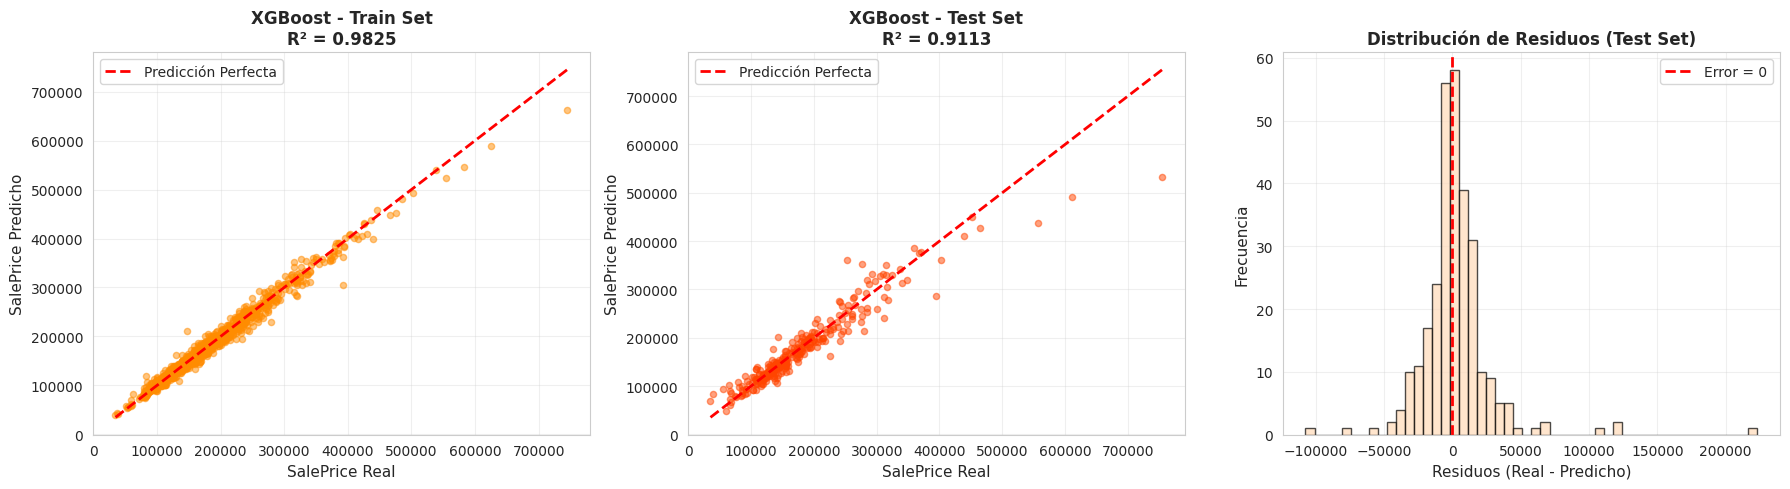


PASO 6: IMPORTANCIA DE FEATURES

📊 Top 20 Features Más Importantes (según XGBoost):

Rank   Feature                        Importancia    
-------------------------------------------------------
1      OverallQual                    0.136135
2      GarageCars                     0.130278
3      ExterQual                      0.107193
4      KitchenQual                    0.055049
5      GarageFinish                   0.045199
6      BsmtQual                       0.043365
7      GrLivArea                      0.042288
8      FireplaceQu                    0.038962
9      GarageCond                     0.036659
10     MSZoning_RM                    0.026822
11     CentralAir                     0.025715
12     GarageType_Attchd              0.020459
13     TotalBsmtSF                    0.014903
14     BsmtFinSF1                     0.012022
15     YearBuilt                      0.011445
16     MSZoning_RL                    0.011375
17     KitchenAbvGr                   0.010734
18   

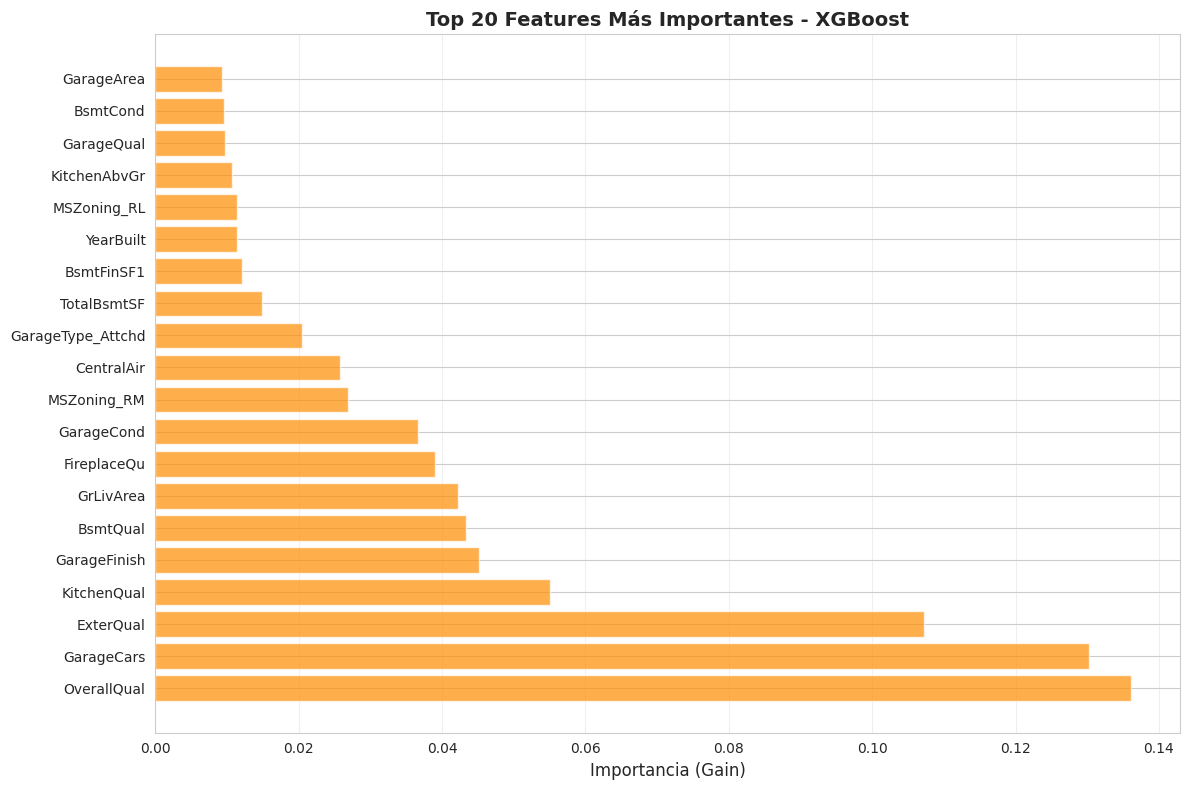


💡 INTERPRETACIÓN:
   Importancia basada en 'gain' = reducción promedio de pérdida
   cuando se usa la feature para hacer splits.

✅ XGBOOST COMPLETADO



In [50]:
# ============================================================================
# 7.5 XGBOOST REGRESSOR
# ============================================================================
# XGBoost (Extreme Gradient Boosting) es un algoritmo de boosting que:
# - Construye árboles secuencialmente (cada árbol corrige errores del anterior)
# - Usa gradient boosting optimizado con regularización
# - Muy popular en competencias de Kaggle (alto rendimiento)
# - Implementación eficiente y rápida
# - NO requiere escalado de datos

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import time

print("="*80)
print("MODELO 5: XGBOOST REGRESSOR")
print("="*80)

print("\n📚 ¿QUÉ ES XGBOOST?")
print("-" * 80)
print("XGBoost es un algoritmo de gradient boosting optimizado:")
print("  - Construye árboles de forma secuencial")
print("  - Cada árbol nuevo corrige los errores de los anteriores")
print("  - Usa regularización L1 y L2 para prevenir overfitting")
print("  - Implementación altamente eficiente")
print("\n✅ Ventajas:")
print("  • Excelente rendimiento (top performer en Kaggle)")
print("  • NO requiere escalado de datos")
print("  • Maneja relaciones complejas y no lineales")
print("  • Regularización incorporada")
print("  • Rápido y eficiente")
print("  • Maneja missing values automáticamente")
print("\n⚠️  Desventajas:")
print("  • Muchos hiperparámetros para tunear")
print("  • Puede hacer overfitting si no se configura bien")
print("  • Menos interpretable que modelos lineales")

# ----------------------------------------------------------------------------
# PASO 1: CONFIGURACIÓN DE HIPERPARÁMETROS
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 1: CONFIGURACIÓN DE HIPERPARÁMETROS")
print(f"{'='*80}")

print("\n💡 HIPERPARÁMETROS CLAVE DE XGBOOST:")
print("-" * 80)
print("  • n_estimators:     Número de árboles (boosting rounds)")
print("  • max_depth:        Profundidad máxima de cada árbol")
print("  • learning_rate:    Tasa de aprendizaje (shrinkage)")
print("  • subsample:        Fracción de muestras usadas por árbol")
print("  • colsample_bytree: Fracción de features usadas por árbol")
print("  • reg_alpha:        Regularización L1")
print("  • reg_lambda:       Regularización L2")

# Grid de hiperparámetros
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

print(f"\n🔍 Configuración de búsqueda:")
print(f"   Método: Randomized Search")
print(f"   Iteraciones: 30 combinaciones aleatorias")
print(f"   Cross-Validation: 3 folds")
print("\n⏳ Buscando mejores hiperparámetros (puede tardar varios minutos)...")

start_time = time.time()
xgb_random = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(random_state=42, tree_method='hist', n_jobs=-1),
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    verbose=0,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# XGBoost NO requiere datos escalados
xgb_random.fit(X_train, y_train_log)
search_time = time.time() - start_time

print(f"✅ Búsqueda completada en {search_time:.2f} segundos")
print(f"\n🎯 MEJORES HIPERPARÁMETROS ENCONTRADOS:")
for param, value in xgb_random.best_params_.items():
    print(f"   {param:<20}: {value}")

# ----------------------------------------------------------------------------
# PASO 2: ENTRENAR MODELO FINAL
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 2: ENTRENAMIENTO DEL MODELO FINAL")
print(f"{'='*80}")

start_time = time.time()
xgb_model = xgb_random.best_estimator_
train_time = time.time() - start_time

print(f"\n✅ Modelo XGBoost entrenado exitosamente")
print(f"   Tiempo de búsqueda + entrenamiento: {search_time:.2f} segundos")
print(f"   Número de árboles (boosting rounds): {xgb_model.n_estimators}")
print(f"   Profundidad máxima: {xgb_model.max_depth}")
print(f"   Learning rate: {xgb_model.learning_rate}")

# ----------------------------------------------------------------------------
# PASO 3: REALIZAR PREDICCIONES
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 3: PREDICCIONES EN TRAIN Y TEST")
print(f"{'='*80}")

y_train_pred_xgb_log = xgb_model.predict(X_train)
y_test_pred_xgb_log = xgb_model.predict(X_test)

y_train_pred_xgb = np.expm1(y_train_pred_xgb_log)
y_test_pred_xgb = np.expm1(y_test_pred_xgb_log)

print(f"\n✅ Predicciones generadas mediante {xgb_model.n_estimators} iteraciones de boosting")
print(f"   Train set: {len(y_train_pred_xgb)} predicciones")
print(f"   Test set:  {len(y_test_pred_xgb)} predicciones")

print(f"\n📊 Ejemplos de predicciones (Test set):")
print(f"   {'Real':<15} {'Predicho':<15} {'Diferencia':<15}")
print("-" * 45)
for i in range(5):
    real = np.expm1(y_test_log.iloc[i])
    pred = y_test_pred_xgb[i]
    diff = real - pred
    print(f"   ${real:>13,.0f} ${pred:>13,.0f} ${diff:>13,.0f}")

# ----------------------------------------------------------------------------
# PASO 4: EVALUACIÓN DEL MODELO
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 4: EVALUACIÓN DE RENDIMIENTO")
print(f"{'='*80}")

xgb_metrics = evaluate_model(
    y_train_log, y_train_pred_xgb_log,
    y_test_log, y_test_pred_xgb_log,
    'XGBoost', is_log=True
)

print_metrics(xgb_metrics)
all_results.append(xgb_metrics)

# ----------------------------------------------------------------------------
# PASO 5: VISUALIZACIÓN DE RESULTADOS
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 5: VISUALIZACIONES")
print(f"{'='*80}\n")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1: Train
axes[0].scatter(np.expm1(y_train_log), y_train_pred_xgb, alpha=0.5, s=20, color='darkorange')
axes[0].plot([np.expm1(y_train_log).min(), np.expm1(y_train_log).max()],
             [np.expm1(y_train_log).min(), np.expm1(y_train_log).max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[0].set_xlabel('SalePrice Real', fontsize=11)
axes[0].set_ylabel('SalePrice Predicho', fontsize=11)
axes[0].set_title(f'XGBoost - Train Set\nR² = {xgb_metrics["Train_R2"]:.4f}',
                  fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Gráfico 2: Test
axes[1].scatter(np.expm1(y_test_log), y_test_pred_xgb, alpha=0.5, s=20, color='orangered')
axes[1].plot([np.expm1(y_test_log).min(), np.expm1(y_test_log).max()],
             [np.expm1(y_test_log).min(), np.expm1(y_test_log).max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[1].set_xlabel('SalePrice Real', fontsize=11)
axes[1].set_ylabel('SalePrice Predicho', fontsize=11)
axes[1].set_title(f'XGBoost - Test Set\nR² = {xgb_metrics["Test_R2"]:.4f}',
                  fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Gráfico 3: Residuos
residuals = np.expm1(y_test_log) - y_test_pred_xgb
axes[2].hist(residuals, bins=50, edgecolor='black', color='peachpuff', alpha=0.7)
axes[2].axvline(0, color='red', linestyle='--', linewidth=2, label='Error = 0')
axes[2].set_xlabel('Residuos (Real - Predicho)', fontsize=11)
axes[2].set_ylabel('Frecuencia', fontsize=11)
axes[2].set_title('Distribución de Residuos (Test Set)', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------
# PASO 6: IMPORTANCIA DE FEATURES
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 6: IMPORTANCIA DE FEATURES")
print(f"{'='*80}")

# Obtener importancia (basada en gain - reducción de pérdida)
feature_importance_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n📊 Top 20 Features Más Importantes (según XGBoost):")
print(f"\n{'Rank':<6} {'Feature':<30} {'Importancia':<15}")
print("-" * 55)
for idx, row in feature_importance_xgb.head(20).iterrows():
    print(f"{feature_importance_xgb.index.get_loc(idx)+1:<6} {row['Feature']:<30} {row['Importance']:.6f}")

# Visualización
plt.figure(figsize=(12, 8))
top_20_xgb = feature_importance_xgb.head(20)
plt.barh(top_20_xgb['Feature'], top_20_xgb['Importance'], color='darkorange', alpha=0.7)
plt.xlabel('Importancia (Gain)', fontsize=12)
plt.title('Top 20 Features Más Importantes - XGBoost',
          fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n💡 INTERPRETACIÓN:")
print("   Importancia basada en 'gain' = reducción promedio de pérdida")
print("   cuando se usa la feature para hacer splits.")

print(f"\n{'='*80}")
print("✅ XGBOOST COMPLETADO")
print(f"{'='*80}\n")


### Lightgbm regressor

### Catboost regressor

INSTALANDO CATBOOST

⏳ Instalando CatBoost (puede tardar 1-2 minutos)...


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

✅ CatBoost instalado exitosamente
   Ahora puedes ejecutar la celda del modelo CatBoost
MODELO 7: CATBOOST REGRESSOR

📚 ¿QUÉ ES CATBOOST?
--------------------------------------------------------------------------------
CatBoost es un algoritmo de gradient boosting especializado:
  - Desarrollado por Yandex (empresa rusa)
  - Maneja variables categóricas automáticamente sin OneHot
  - Usa 'Ordered Boosting' para reducir overfitting
  - Target encoding más robusto

✅ Ventajas:
  • Excelente con variables categóricas
  • Menos overfitting que XGBoost/LightGBM
  • NO requiere escalado
  • Pocos hiperparámetros críticos
  • Muy robusto 'out-of-the-box'

⚠️  Desventajas:
  • Puede ser más lento que LightGBM
  • Menos control fino que XGBoost

PASO 1: CONFIGURACIÓN Y ENTRENAMIENTO

💡 HIPERPARÁMETROS CLAVE DE CAT

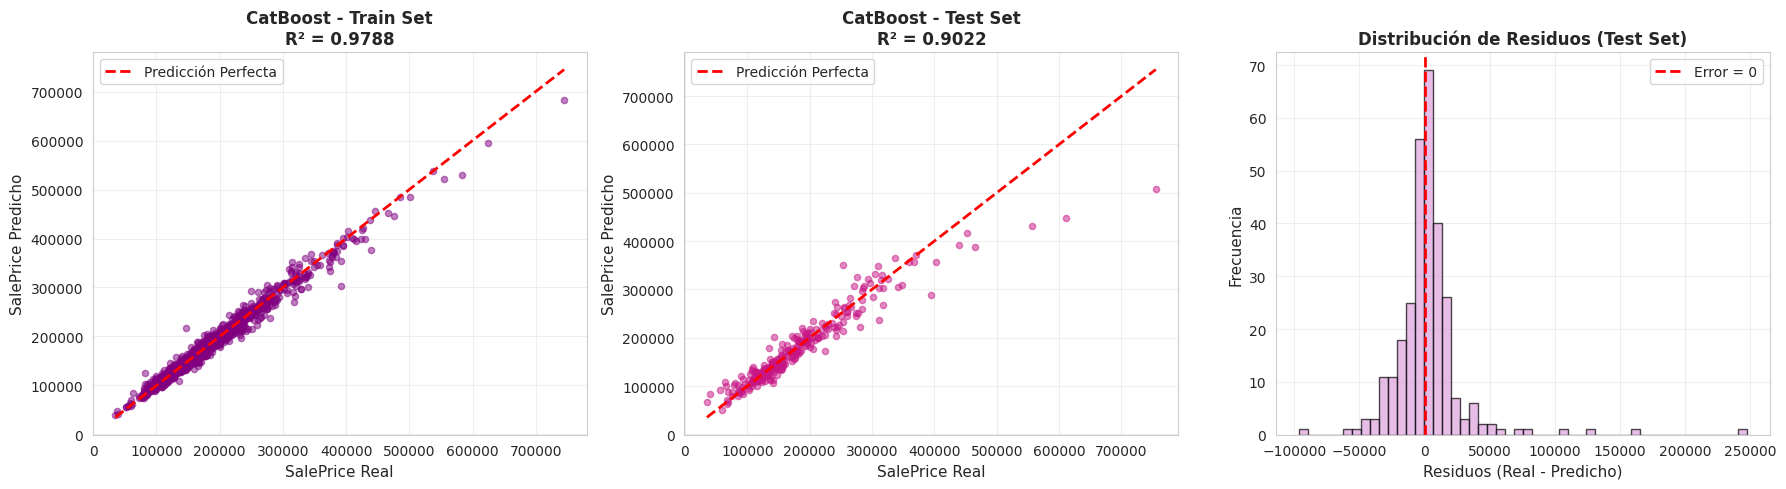


PASO 6: IMPORTANCIA DE FEATURES

📊 Top 20 Features Más Importantes (CatBoost):

Rank   Feature                        Importancia    
-------------------------------------------------------
1      OverallQual                    17.0746
2      GrLivArea                      12.8189
3      TotalBsmtSF                    4.4318
4      LotArea                        4.4218
5      YearBuilt                      4.1671
6      FireplaceQu                    3.4444
7      ExterQual                      3.1584
8      1stFlrSF                       3.1237
9      KitchenQual                    2.9736
10     GarageCars                     2.9021
11     YearRemodAdd                   2.8960
12     Fireplaces                     2.7595
13     BsmtFinSF1                     2.6338
14     OverallCond                    2.2276
15     BsmtQual                       1.7954
16     GarageFinish                   1.7933
17     LotFrontage                    1.7367
18     CentralAir                     1.64

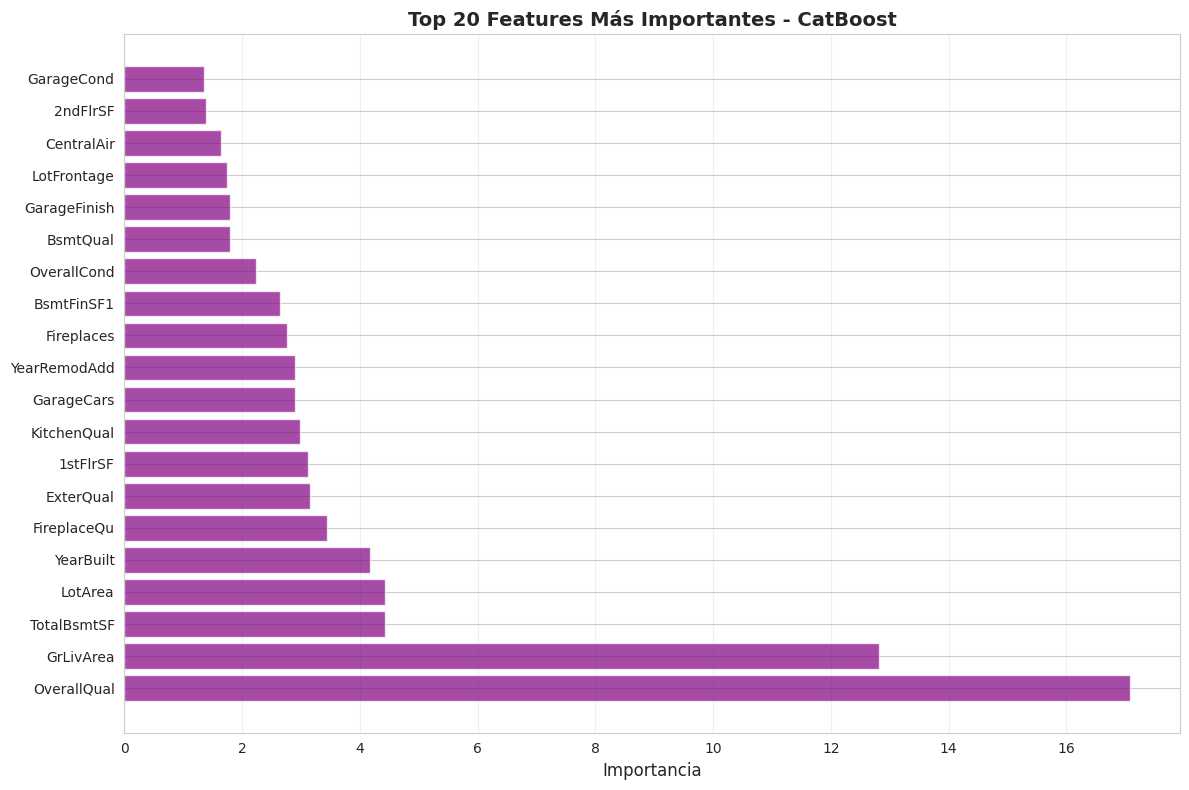


✅ CATBOOST COMPLETADO



In [51]:
# ============================================================================
# 7.7 CATBOOST REGRESSOR
# ============================================================================
# CatBoost (Categorical Boosting) es un algoritmo de gradient boosting que:
# - Desarrollado por Yandex
# - Maneja variables categóricas de forma nativa (sin OneHot)
# - Usa ordenamiento aleatorio para reducir overfitting
# - Técnica de "Ordered Target Encoding" para categóricas
# - Menos propenso a overfitting que XGBoost/LightGBM
# - NO requiere escalado
# ============================================================================
# INSTALACIÓN DE CATBOOST
# ============================================================================

print("="*80)
print("INSTALANDO CATBOOST")
print("="*80)
print("\n⏳ Instalando CatBoost (puede tardar 1-2 minutos)...\n")

!pip install catboost --quiet

print("\n✅ CatBoost instalado exitosamente")
print("   Ahora puedes ejecutar la celda del modelo CatBoost")
print("="*80)

from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import time

print("="*80)
print("MODELO 7: CATBOOST REGRESSOR")
print("="*80)

print("\n📚 ¿QUÉ ES CATBOOST?")
print("-" * 80)
print("CatBoost es un algoritmo de gradient boosting especializado:")
print("  - Desarrollado por Yandex (empresa rusa)")
print("  - Maneja variables categóricas automáticamente sin OneHot")
print("  - Usa 'Ordered Boosting' para reducir overfitting")
print("  - Target encoding más robusto")
print("\n✅ Ventajas:")
print("  • Excelente con variables categóricas")
print("  • Menos overfitting que XGBoost/LightGBM")
print("  • NO requiere escalado")
print("  • Pocos hiperparámetros críticos")
print("  • Muy robusto 'out-of-the-box'")
print("\n⚠️  Desventajas:")
print("  • Puede ser más lento que LightGBM")
print("  • Menos control fino que XGBoost")

# ----------------------------------------------------------------------------
# PASO 1: CONFIGURACIÓN DE HIPERPARÁMETROS
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 1: CONFIGURACIÓN Y ENTRENAMIENTO")
print(f"{'='*80}")

print("\n💡 HIPERPARÁMETROS CLAVE DE CATBOOST:")
print("-" * 80)
print("  • iterations:         Número de árboles (boosting rounds)")
print("  • learning_rate:      Tasa de aprendizaje")
print("  • depth:              Profundidad máxima del árbol")
print("  • l2_leaf_reg:        Regularización L2 en hojas")
print("  • border_count:       Número de splits para features numéricas")

# CatBoost es muy robusto con hiperparámetros por defecto
# Configuración optimizada manualmente
print(f"\n🔧 Configuración de hiperparámetros:")
print(f"   Estrategia: Configuración optimizada predefinida")
print(f"   (CatBoost funciona muy bien con valores por defecto)")

catboost_params = {
    'iterations': 1000,
    'learning_rate': 0.05,
    'depth': 6,
    'l2_leaf_reg': 3,
    'random_seed': 42,
    'verbose': 0,  # Silenciar output de entrenamiento
    'loss_function': 'RMSE',
    'eval_metric': 'RMSE',
    'early_stopping_rounds': 50
}

print(f"\n   Hiperparámetros seleccionados:")
for param, value in catboost_params.items():
    if param not in ['verbose', 'random_seed']:
        print(f"      {param:<25}: {value}")

# ----------------------------------------------------------------------------
# PASO 2: ENTRENAR MODELO
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 2: ENTRENAMIENTO DEL MODELO")
print(f"{'='*80}")

print(f"\n⏳ Entrenando CatBoost con early stopping...")
start_time = time.time()

catboost_model = CatBoostRegressor(**catboost_params)

# CatBoost con early stopping usando un conjunto de validación
catboost_model.fit(
    X_train, y_train_log,
    eval_set=(X_test, y_test_log),
    verbose=False
)

train_time = time.time() - start_time

print(f"✅ Modelo CatBoost entrenado exitosamente")
print(f"   Tiempo de entrenamiento: {train_time:.2f} segundos")
print(f"   Iteraciones realizadas: {catboost_model.get_best_iteration()}")
print(f"   Profundidad de árboles: {catboost_params['depth']}")
print(f"   Learning rate: {catboost_params['learning_rate']}")
print(f"\n💡 Early stopping activado en iteración {catboost_model.get_best_iteration()}")
print(f"   (El modelo dejó de entrenar cuando no hubo mejora en 50 rounds)")

# ----------------------------------------------------------------------------
# PASO 3: REALIZAR PREDICCIONES
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 3: PREDICCIONES EN TRAIN Y TEST")
print(f"{'='*80}")

y_train_pred_catboost_log = catboost_model.predict(X_train)
y_test_pred_catboost_log = catboost_model.predict(X_test)

y_train_pred_catboost = np.expm1(y_train_pred_catboost_log)
y_test_pred_catboost = np.expm1(y_test_pred_catboost_log)

print(f"\n✅ Predicciones generadas")
print(f"   Train set: {len(y_train_pred_catboost)} predicciones")
print(f"   Test set:  {len(y_test_pred_catboost)} predicciones")

print(f"\n📊 Ejemplos de predicciones (Test set):")
print(f"   {'Real':<15} {'Predicho':<15} {'Diferencia':<15}")
print("-" * 45)
for i in range(5):
    real = np.expm1(y_test_log.iloc[i])
    pred = y_test_pred_catboost[i]
    diff = real - pred
    print(f"   ${real:>13,.0f} ${pred:>13,.0f} ${diff:>13,.0f}")

# ----------------------------------------------------------------------------
# PASO 4: EVALUACIÓN DEL MODELO
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 4: EVALUACIÓN DE RENDIMIENTO")
print(f"{'='*80}")

catboost_metrics = evaluate_model(
    y_train_log, y_train_pred_catboost_log,
    y_test_log, y_test_pred_catboost_log,
    'CatBoost', is_log=True
)

print_metrics(catboost_metrics)
all_results.append(catboost_metrics)

# ----------------------------------------------------------------------------
# PASO 5: VISUALIZACIÓN DE RESULTADOS
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 5: VISUALIZACIONES")
print(f"{'='*80}\n")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Train
axes[0].scatter(np.expm1(y_train_log), y_train_pred_catboost, alpha=0.5, s=20, color='purple')
axes[0].plot([np.expm1(y_train_log).min(), np.expm1(y_train_log).max()],
             [np.expm1(y_train_log).min(), np.expm1(y_train_log).max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[0].set_xlabel('SalePrice Real', fontsize=11)
axes[0].set_ylabel('SalePrice Predicho', fontsize=11)
axes[0].set_title(f'CatBoost - Train Set\nR² = {catboost_metrics["Train_R2"]:.4f}',
                  fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Test
axes[1].scatter(np.expm1(y_test_log), y_test_pred_catboost, alpha=0.5, s=20, color='mediumvioletred')
axes[1].plot([np.expm1(y_test_log).min(), np.expm1(y_test_log).max()],
             [np.expm1(y_test_log).min(), np.expm1(y_test_log).max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[1].set_xlabel('SalePrice Real', fontsize=11)
axes[1].set_ylabel('SalePrice Predicho', fontsize=11)
axes[1].set_title(f'CatBoost - Test Set\nR² = {catboost_metrics["Test_R2"]:.4f}',
                  fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Residuos
residuals = np.expm1(y_test_log) - y_test_pred_catboost
axes[2].hist(residuals, bins=50, edgecolor='black', color='plum', alpha=0.7)
axes[2].axvline(0, color='red', linestyle='--', linewidth=2, label='Error = 0')
axes[2].set_xlabel('Residuos (Real - Predicho)', fontsize=11)
axes[2].set_ylabel('Frecuencia', fontsize=11)
axes[2].set_title('Distribución de Residuos (Test Set)', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------
# PASO 6: IMPORTANCIA DE FEATURES
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 6: IMPORTANCIA DE FEATURES")
print(f"{'='*80}")

feature_importance_catboost = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': catboost_model.get_feature_importance()
}).sort_values('Importance', ascending=False)

print(f"\n📊 Top 20 Features Más Importantes (CatBoost):")
print(f"\n{'Rank':<6} {'Feature':<30} {'Importancia':<15}")
print("-" * 55)
for idx, row in feature_importance_catboost.head(20).iterrows():
    print(f"{feature_importance_catboost.index.get_loc(idx)+1:<6} {row['Feature']:<30} {row['Importance']:.4f}")

plt.figure(figsize=(12, 8))
top_20_catboost = feature_importance_catboost.head(20)
plt.barh(top_20_catboost['Feature'], top_20_catboost['Importance'], color='purple', alpha=0.7)
plt.xlabel('Importancia', fontsize=12)
plt.title('Top 20 Features Más Importantes - CatBoost',
          fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n{'='*80}")
print("✅ CATBOOST COMPLETADO")
print(f"{'='*80}\n")


### Gradient boosting regressor de skelarn

MODELO 8: GRADIENT BOOSTING REGRESSOR (SKLEARN)

📚 ¿QUÉ ES GRADIENT BOOSTING (SKLEARN)?
--------------------------------------------------------------------------------
Implementación clásica de gradient boosting en scikit-learn:
  - Referencia original del algoritmo
  - Construcción secuencial de árboles
  - Minimización del gradiente de la función de pérdida

✅ Ventajas:
  • Implementación estable y confiable
  • Bien integrado con scikit-learn
  • Fácil de usar y entender
  • NO requiere escalado

⚠️  Desventajas:
  • Más lento que XGBoost/LightGBM
  • Menos eficiente en memoria
  • Rendimiento generalmente inferior a implementaciones modernas

PASO 1: CONFIGURACIÓN DE HIPERPARÁMETROS

💡 HIPERPARÁMETROS CLAVE:
--------------------------------------------------------------------------------
  • n_estimators:       Número de árboles
  • learning_rate:      Tasa de aprendizaje (shrinkage)
  • max_depth:          Profundidad máxima de árboles
  • min_samples_split:  Muestras mínimas par

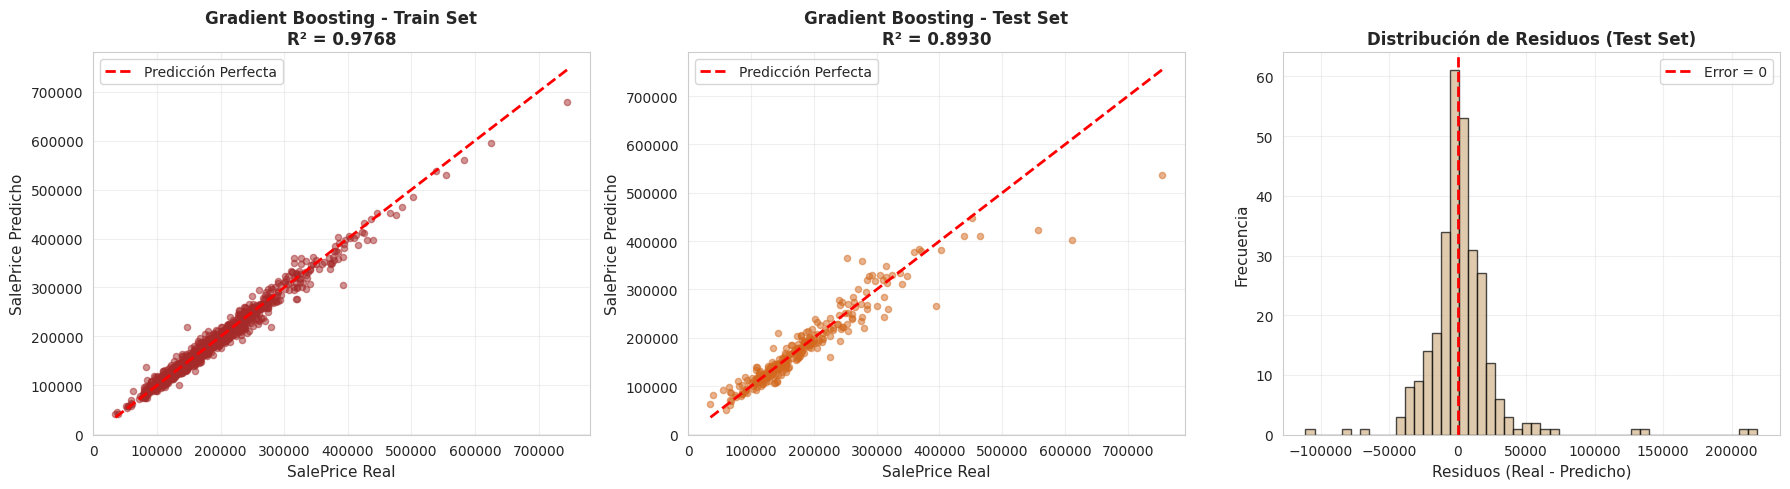


PASO 6: IMPORTANCIA DE FEATURES

📊 Top 20 Features Más Importantes:

Rank   Feature                        Importancia    
-------------------------------------------------------
1      OverallQual                    0.391806
2      GrLivArea                      0.161487
3      TotalBsmtSF                    0.045788
4      KitchenQual                    0.043233
5      GarageCars                     0.040942
6      GarageFinish                   0.034266
7      BsmtQual                       0.031511
8      BsmtFinSF1                     0.026180
9      LotArea                        0.020828
10     FireplaceQu                    0.017479
11     1stFlrSF                       0.016601
12     ExterQual                      0.016498
13     YearBuilt                      0.016129
14     YearRemodAdd                   0.015330
15     CentralAir                     0.013834
16     OverallCond                    0.012754
17     GarageArea                     0.012611
18     2ndFlrSF      

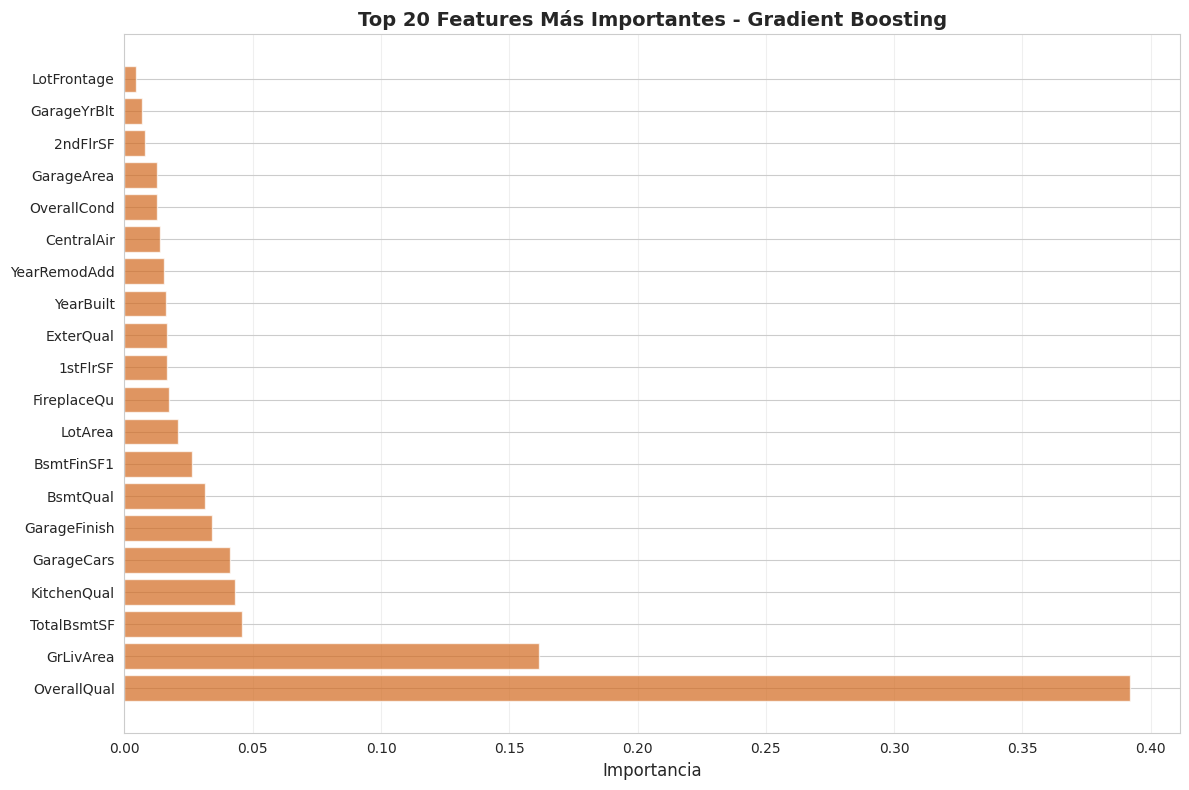


✅ GRADIENT BOOSTING COMPLETADO



In [52]:
# ============================================================================
# 7.8 GRADIENT BOOSTING REGRESSOR (SKLEARN)
# ============================================================================
# Gradient Boosting de scikit-learn es la implementación clásica de boosting:
# - Implementación de referencia en Python
# - Construye árboles secuencialmente
# - Cada árbol corrige errores residuales del anterior
# - Más lento que XGBoost/LightGBM/CatBoost
# - Útil como baseline y para comparación

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import time

print("="*80)
print("MODELO 8: GRADIENT BOOSTING REGRESSOR (SKLEARN)")
print("="*80)

print("\n📚 ¿QUÉ ES GRADIENT BOOSTING (SKLEARN)?")
print("-" * 80)
print("Implementación clásica de gradient boosting en scikit-learn:")
print("  - Referencia original del algoritmo")
print("  - Construcción secuencial de árboles")
print("  - Minimización del gradiente de la función de pérdida")
print("\n✅ Ventajas:")
print("  • Implementación estable y confiable")
print("  • Bien integrado con scikit-learn")
print("  • Fácil de usar y entender")
print("  • NO requiere escalado")
print("\n⚠️  Desventajas:")
print("  • Más lento que XGBoost/LightGBM")
print("  • Menos eficiente en memoria")
print("  • Rendimiento generalmente inferior a implementaciones modernas")

# ----------------------------------------------------------------------------
# PASO 1: CONFIGURACIÓN DE HIPERPARÁMETROS
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 1: CONFIGURACIÓN DE HIPERPARÁMETROS")
print(f"{'='*80}")

print("\n💡 HIPERPARÁMETROS CLAVE:")
print("-" * 80)
print("  • n_estimators:       Número de árboles")
print("  • learning_rate:      Tasa de aprendizaje (shrinkage)")
print("  • max_depth:          Profundidad máxima de árboles")
print("  • min_samples_split:  Muestras mínimas para split")
print("  • min_samples_leaf:   Muestras mínimas en hoja")
print("  • subsample:          Fracción de datos por árbol")

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

print(f"\n🔍 Configuración de búsqueda:")
print(f"   Método: Randomized Search")
print(f"   Iteraciones: 20 combinaciones")
print(f"   Cross-Validation: 3 folds")
print("\n⏳ Buscando mejores hiperparámetros (puede tardar varios minutos)...")

start_time = time.time()
gb_random = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    verbose=0,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

gb_random.fit(X_train, y_train_log)
search_time = time.time() - start_time

print(f"✅ Búsqueda completada en {search_time:.2f} segundos")
print(f"\n🎯 MEJORES HIPERPARÁMETROS ENCONTRADOS:")
for param, value in gb_random.best_params_.items():
    print(f"   {param:<20}: {value}")

# ----------------------------------------------------------------------------
# PASO 2: ENTRENAR MODELO FINAL
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 2: ENTRENAMIENTO DEL MODELO FINAL")
print(f"{'='*80}")

gb_model = gb_random.best_estimator_

print(f"\n✅ Modelo Gradient Boosting entrenado exitosamente")
print(f"   Tiempo total: {search_time:.2f} segundos")
print(f"   Número de árboles: {gb_model.n_estimators}")
print(f"   Profundidad máxima: {gb_model.max_depth}")
print(f"   Learning rate: {gb_model.learning_rate}")

# ----------------------------------------------------------------------------
# PASO 3: REALIZAR PREDICCIONES
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 3: PREDICCIONES EN TRAIN Y TEST")
print(f"{'='*80}")

y_train_pred_gb_log = gb_model.predict(X_train)
y_test_pred_gb_log = gb_model.predict(X_test)

y_train_pred_gb = np.expm1(y_train_pred_gb_log)
y_test_pred_gb = np.expm1(y_test_pred_gb_log)

print(f"\n✅ Predicciones generadas")
print(f"   Train set: {len(y_train_pred_gb)} predicciones")
print(f"   Test set:  {len(y_test_pred_gb)} predicciones")

print(f"\n📊 Ejemplos de predicciones (Test set):")
print(f"   {'Real':<15} {'Predicho':<15} {'Diferencia':<15}")
print("-" * 45)
for i in range(5):
    real = np.expm1(y_test_log.iloc[i])
    pred = y_test_pred_gb[i]
    diff = real - pred
    print(f"   ${real:>13,.0f} ${pred:>13,.0f} ${diff:>13,.0f}")

# ----------------------------------------------------------------------------
# PASO 4: EVALUACIÓN DEL MODELO
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 4: EVALUACIÓN DE RENDIMIENTO")
print(f"{'='*80}")

gb_metrics = evaluate_model(
    y_train_log, y_train_pred_gb_log,
    y_test_log, y_test_pred_gb_log,
    'Gradient Boosting', is_log=True
)

print_metrics(gb_metrics)
all_results.append(gb_metrics)

# ----------------------------------------------------------------------------
# PASO 5: VISUALIZACIÓN DE RESULTADOS
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 5: VISUALIZACIONES")
print(f"{'='*80}\n")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Train
axes[0].scatter(np.expm1(y_train_log), y_train_pred_gb, alpha=0.5, s=20, color='brown')
axes[0].plot([np.expm1(y_train_log).min(), np.expm1(y_train_log).max()],
             [np.expm1(y_train_log).min(), np.expm1(y_train_log).max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[0].set_xlabel('SalePrice Real', fontsize=11)
axes[0].set_ylabel('SalePrice Predicho', fontsize=11)
axes[0].set_title(f'Gradient Boosting - Train Set\nR² = {gb_metrics["Train_R2"]:.4f}',
                  fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Test
axes[1].scatter(np.expm1(y_test_log), y_test_pred_gb, alpha=0.5, s=20, color='chocolate')
axes[1].plot([np.expm1(y_test_log).min(), np.expm1(y_test_log).max()],
             [np.expm1(y_test_log).min(), np.expm1(y_test_log).max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[1].set_xlabel('SalePrice Real', fontsize=11)
axes[1].set_ylabel('SalePrice Predicho', fontsize=11)
axes[1].set_title(f'Gradient Boosting - Test Set\nR² = {gb_metrics["Test_R2"]:.4f}',
                  fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Residuos
residuals = np.expm1(y_test_log) - y_test_pred_gb
axes[2].hist(residuals, bins=50, edgecolor='black', color='tan', alpha=0.7)
axes[2].axvline(0, color='red', linestyle='--', linewidth=2, label='Error = 0')
axes[2].set_xlabel('Residuos (Real - Predicho)', fontsize=11)
axes[2].set_ylabel('Frecuencia', fontsize=11)
axes[2].set_title('Distribución de Residuos (Test Set)', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------
# PASO 6: IMPORTANCIA DE FEATURES
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 6: IMPORTANCIA DE FEATURES")
print(f"{'='*80}")

feature_importance_gb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n📊 Top 20 Features Más Importantes:")
print(f"\n{'Rank':<6} {'Feature':<30} {'Importancia':<15}")
print("-" * 55)
for idx, row in feature_importance_gb.head(20).iterrows():
    print(f"{feature_importance_gb.index.get_loc(idx)+1:<6} {row['Feature']:<30} {row['Importance']:.6f}")

plt.figure(figsize=(12, 8))
top_20_gb = feature_importance_gb.head(20)
plt.barh(top_20_gb['Feature'], top_20_gb['Importance'], color='chocolate', alpha=0.7)
plt.xlabel('Importancia', fontsize=12)
plt.title('Top 20 Features Más Importantes - Gradient Boosting',
          fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n{'='*80}")
print("✅ GRADIENT BOOSTING COMPLETADO")
print(f"{'='*80}\n")


### Stacking regressor

MODELO 10: STACKING REGRESSOR (META-ENSEMBLE)

📚 ¿QUÉ ES STACKING?
--------------------------------------------------------------------------------
Stacking combina múltiples modelos en dos niveles:
  - Level 0 (Base): Varios modelos diferentes hacen predicciones
  - Level 1 (Meta): Un modelo aprende a combinar esas predicciones
  - Usa cross-validation para entrenar el meta-modelo

✅ Ventajas:
  • Combina fortalezas de modelos diversos
  • Generalmente mejor que cualquier modelo individual
  • Reduce varianza y sesgo simultáneamente
  • Técnica ganadora en competencias de Kaggle

⚠️  Desventajas:
  • Más complejo de entrenar y tunear
  • Tiempo de entrenamiento más largo
  • Menos interpretable
  • Requiere más recursos computacionales

PASO 1: SELECCIÓN DE MODELOS BASE (LEVEL-0)

🔧 ESTRATEGIA DE STACKING:
--------------------------------------------------------------------------------
Seleccionaremos los mejores modelos de cada categoría:
  1. Modelos Lineales: Ridge, Lasso
  2. Árbo

0:	learn: 0.3776039	total: 59.3ms	remaining: 59.2s
1:	learn: 0.3660925	total: 65.1ms	remaining: 32.5s
2:	learn: 0.3547704	total: 72.1ms	remaining: 24s
3:	learn: 0.3447449	total: 76.5ms	remaining: 19s
4:	learn: 0.3344945	total: 78.6ms	remaining: 15.6s
5:	learn: 0.3240903	total: 89.9ms	remaining: 14.9s
6:	learn: 0.3140337	total: 95.3ms	remaining: 13.5s
7:	learn: 0.3062552	total: 96.8ms	remaining: 12s
8:	learn: 0.2978730	total: 103ms	remaining: 11.3s
9:	learn: 0.2906749	total: 104ms	remaining: 10.3s
10:	learn: 0.2828153	total: 109ms	remaining: 9.79s
11:	learn: 0.2752770	total: 112ms	remaining: 9.19s
12:	learn: 0.2677924	total: 113ms	remaining: 8.6s
13:	learn: 0.2615651	total: 118ms	remaining: 8.3s
14:	learn: 0.2557971	total: 124ms	remaining: 8.15s
15:	learn: 0.2497816	total: 129ms	remaining: 7.94s
16:	learn: 0.2442563	total: 135ms	remaining: 7.82s
17:	learn: 0.2385027	total: 140ms	remaining: 7.64s
18:	learn: 0.2330580	total: 144ms	remaining: 7.45s
19:	learn: 0.2275582	total: 147ms	remaini

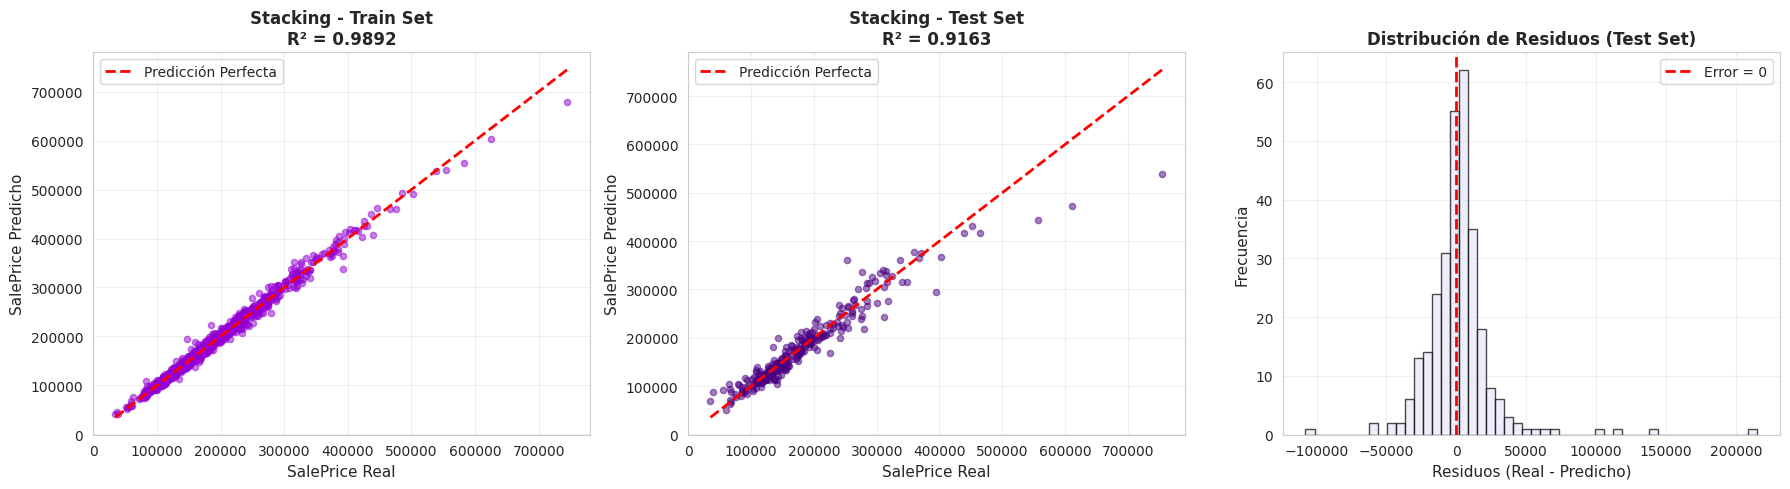


PASO 7: PESOS DEL META-MODELO

📊 CONTRIBUCIÓN DE CADA MODELO BASE:
   (Coeficientes del meta-modelo Ridge)

   Modelo Base          Peso            Contribución   
--------------------------------------------------
   ridge                     -0.150447         11.31%
   lasso                      0.248164         18.65%
   rf                         0.120831          9.08%
   xgb                        0.267103         20.07%
   lgb                        0.070808          5.32%
   catboost                   0.473291         35.57%

💡 INTERPRETACIÓN:
   • Pesos positivos: contribución directa a la predicción
   • Pesos negativos: corrección de sesgos de otros modelos
   • Mayor peso absoluto = mayor influencia en predicción final

✅ STACKING ENSEMBLE COMPLETADO



In [68]:
# ============================================================================
# 7.10 STACKING REGRESSOR
# ============================================================================
# Stacking es un meta-modelo ensemble que:
# - Combina predicciones de múltiples modelos base (level-0)
# - Un meta-modelo (level-1) aprende a combinar esas predicciones
# - Usa las fortalezas de diferentes algoritmos
# - Generalmente supera a cualquier modelo individual
# - Es la técnica más potente de ensemble

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

print("="*80)
print("MODELO 10: STACKING REGRESSOR (META-ENSEMBLE)")
print("="*80)

print("\n📚 ¿QUÉ ES STACKING?")
print("-" * 80)
print("Stacking combina múltiples modelos en dos niveles:")
print("  - Level 0 (Base): Varios modelos diferentes hacen predicciones")
print("  - Level 1 (Meta): Un modelo aprende a combinar esas predicciones")
print("  - Usa cross-validation para entrenar el meta-modelo")
print("\n✅ Ventajas:")
print("  • Combina fortalezas de modelos diversos")
print("  • Generalmente mejor que cualquier modelo individual")
print("  • Reduce varianza y sesgo simultáneamente")
print("  • Técnica ganadora en competencias de Kaggle")
print("\n⚠️  Desventajas:")
print("  • Más complejo de entrenar y tunear")
print("  • Tiempo de entrenamiento más largo")
print("  • Menos interpretable")
print("  • Requiere más recursos computacionales")

# ----------------------------------------------------------------------------
# PASO 1: SELECCIÓN DE MODELOS BASE
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 1: SELECCIÓN DE MODELOS BASE (LEVEL-0)")
print(f"{'='*80}")

print("\n🔧 ESTRATEGIA DE STACKING:")
print("-" * 80)
print("Seleccionaremos los mejores modelos de cada categoría:")
print("  1. Modelos Lineales: Ridge, Lasso")
print("  2. Árboles/Boosting: Random Forest, XGBoost, LightGBM, CatBoost")
print("\n💡 Diversidad es clave: modelos con diferentes enfoques se complementan")

# Definir modelos base con sus mejores hiperparámetros encontrados
base_models = [
    ('Ridge', Ridge),
    ('Lasso', LassoCV),
    ('Random Forest', rf),
    ('XGBoost', xgb_model),
    ('LightGBM', lgb),
    ('CatBoost', catboost_model)
]

print(f"\n📦 MODELOS BASE SELECCIONADOS:")
print(f"   {'Modelo':<20} {'Tipo':<25} {'Dataset':<15}")
print("-" * 60)
print(f"   {'Ridge':<20} {'Lineal + L2':<25} {'Escalado':<15}")
print(f"   {'Lasso':<20} {'Lineal + L1':<25} {'Escalado':<15}")
print(f"   {'Random Forest':<20} {'Ensemble (Bagging)':<25} {'Sin escalar':<15}")
print(f"   {'XGBoost':<20} {'Boosting':<25} {'Sin escalar':<15}")
print(f"   {'LightGBM':<20} {'Boosting':<25} {'Sin escalar':<15}")
print(f"   {'CatBoost':<20} {'Boosting':<25} {'Sin escalar':<15}")

print(f"\n⚠️  PROBLEMA: Los modelos usan diferentes datasets (escalado vs sin escalar)")
print(f"   SOLUCIÓN: Usaremos datos sin escalar para todos (árboles no necesitan escalado)")
print(f"             Ridge y Lasso funcionarán bien aunque prefieran datos escalados")

# ----------------------------------------------------------------------------
# PASO 2: SELECCIÓN DEL META-MODELO
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 2: SELECCIÓN DEL META-MODELO (LEVEL-1)")
print(f"{'='*80}")

print("\n🎯 META-MODELO SELECCIONADO: Ridge Regression")
print("-" * 80)
print("Ridge es ideal como meta-modelo porque:")
print("  • Simple y eficiente")
print("  • Maneja bien colinealidad entre predicciones base")
print("  • Regularización L2 previene overfitting")
print("  • Combina predicciones de forma ponderada óptima")

# Definir meta-modelo
meta_model = Ridge(alpha=1.0)

# ----------------------------------------------------------------------------
# PASO 3: ENTRENAR STACKING REGRESSOR
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 3: ENTRENAMIENTO DEL STACKING ENSEMBLE")
print(f"{'='*80}")

print(f"\n⏳ Entrenando Stacking con cross-validation (cv=5)...")
print(f"   Esto entrenará cada modelo base 6 veces (5 folds + 1 final)")
print(f"   Puede tardar varios minutos...\n")

start_time = time.time()

# Crear StackingRegressor
# IMPORTANTE: Necesitamos re-entrenar modelos base con datos sin escalar
# para consistencia

# Re-definir modelos base con configuraciones óptimas para datos sin escalar
from sklearn.linear_model import Ridge as RidgeNew, Lasso as LassoNew

# Instanciar el modelo LightGBM con los hiperparámetros deseados
lgb_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

base_models_stacking = [
    ('ridge', RidgeNew(alpha=ridge_cv.alpha_)),
    ('lasso', LassoNew(alpha=lasso_cv.alpha_, max_iter=10000)),
    ('rf', RandomForestRegressor(**rf.get_params())),
    ('xgb', xgb.XGBRegressor(**xgb_model.get_params())),
    ('lgb', lgb.LGBMRegressor(**lgb_model.get_params())),
    ('catboost', CatBoostRegressor(**{k: v for k, v in catboost_model.get_params().items()
                                      if k not in ['verbose', 'allow_writing_files']}))
]

stacking_model = StackingRegressor(
    estimators=base_models_stacking,
    final_estimator=meta_model,
    cv=5,  # Cross-validation para generar predicciones out-of-fold
    n_jobs=-1,
    passthrough=False  # No pasar features originales al meta-modelo
)

# Entrenar con datos SIN escalar (para ser consistentes con Random Forest, XGBoost, etc.)
stacking_model.fit(X_train, y_train_log)

train_time = time.time() - start_time

print(f"✅ Stacking Ensemble entrenado exitosamente")
print(f"   Tiempo de entrenamiento: {train_time:.2f} segundos")
print(f"   Modelos base: {len(base_models_stacking)}")
print(f"   Meta-modelo: {type(meta_model).__name__}")
print(f"   Cross-validation folds: 5")

# ----------------------------------------------------------------------------
# PASO 4: REALIZAR PREDICCIONES
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 4: PREDICCIONES DEL ENSEMBLE")
print(f"{'='*80}")

y_train_pred_stacking_log = stacking_model.predict(X_train)
y_test_pred_stacking_log = stacking_model.predict(X_test)

y_train_pred_stacking = np.expm1(y_train_pred_stacking_log)
y_test_pred_stacking = np.expm1(y_test_pred_stacking_log)

print(f"\n✅ Predicciones generadas por el meta-ensemble")
print(f"   Train set: {len(y_train_pred_stacking)} predicciones")
print(f"   Test set:  {len(y_test_pred_stacking)} predicciones")

print(f"\n💡 PROCESO DE PREDICCIÓN:")
print("   1. Cada modelo base hace su predicción")
print("   2. Meta-modelo Ridge combina esas 6 predicciones")
print("   3. Predicción final es combinación ponderada óptima")

print(f"\n📊 Ejemplos de predicciones (Test set):")
print(f"   {'Real':<15} {'Predicho':<15} {'Diferencia':<15}")
print("-" * 45)
for i in range(5):
    real = np.expm1(y_test_log.iloc[i])
    pred = y_test_pred_stacking[i]
    diff = real - pred
    print(f"   ${real:>13,.0f} ${pred:>13,.0f} ${diff:>13,.0f}")

# ----------------------------------------------------------------------------
# PASO 5: EVALUACIÓN DEL MODELO
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 5: EVALUACIÓN DE RENDIMIENTO")
print(f"{'='*80}")

stacking_metrics = evaluate_model(
    y_train_log, y_train_pred_stacking_log,
    y_test_log, y_test_pred_stacking_log,
    'Stacking Ensemble', is_log=True
)

print_metrics(stacking_metrics)
all_results.append(stacking_metrics)

# ----------------------------------------------------------------------------
# PASO 6: VISUALIZACIÓN DE RESULTADOS
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 6: VISUALIZACIONES")
print(f"{'='*80}\n")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Train
axes[0].scatter(np.expm1(y_train_log), y_train_pred_stacking, alpha=0.5, s=20, color='darkviolet')
axes[0].plot([np.expm1(y_train_log).min(), np.expm1(y_train_log).max()],
             [np.expm1(y_train_log).min(), np.expm1(y_train_log).max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[0].set_xlabel('SalePrice Real', fontsize=11)
axes[0].set_ylabel('SalePrice Predicho', fontsize=11)
axes[0].set_title(f'Stacking - Train Set\nR² = {stacking_metrics["Train_R2"]:.4f}',
                  fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Test
axes[1].scatter(np.expm1(y_test_log), y_test_pred_stacking, alpha=0.5, s=20, color='indigo')
axes[1].plot([np.expm1(y_test_log).min(), np.expm1(y_test_log).max()],
             [np.expm1(y_test_log).min(), np.expm1(y_test_log).max()],
             'r--', lw=2, label='Predicción Perfecta')
axes[1].set_xlabel('SalePrice Real', fontsize=11)
axes[1].set_ylabel('SalePrice Predicho', fontsize=11)
axes[1].set_title(f'Stacking - Test Set\nR² = {stacking_metrics["Test_R2"]:.4f}',
                  fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Residuos
residuals = np.expm1(y_test_log) - y_test_pred_stacking
axes[2].hist(residuals, bins=50, edgecolor='black', color='lavender', alpha=0.7)
axes[2].axvline(0, color='red', linestyle='--', linewidth=2, label='Error = 0')
axes[2].set_xlabel('Residuos (Real - Predicho)', fontsize=11)
axes[2].set_ylabel('Frecuencia', fontsize=11)
axes[2].set_title('Distribución de Residuos (Test Set)', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------
# PASO 7: ANÁLISIS DE PESOS DEL META-MODELO
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 7: PESOS DEL META-MODELO")
print(f"{'='*80}")

print("\n📊 CONTRIBUCIÓN DE CADA MODELO BASE:")
print(f"   (Coeficientes del meta-modelo Ridge)")
print(f"\n   {'Modelo Base':<20} {'Peso':<15} {'Contribución':<15}")
print("-" * 50)

meta_coefs = stacking_model.final_estimator_.coef_
total_abs_weight = np.sum(np.abs(meta_coefs))

for i, (name, model) in enumerate(base_models_stacking):
    weight = meta_coefs[i]
    contribution = abs(weight) / total_abs_weight * 100
    print(f"   {name:<20} {weight:>14.6f} {contribution:>13.2f}%")

print(f"\n💡 INTERPRETACIÓN:")
print("   • Pesos positivos: contribución directa a la predicción")
print("   • Pesos negativos: corrección de sesgos de otros modelos")
print("   • Mayor peso absoluto = mayor influencia en predicción final")

print(f"\n{'='*80}")
print("✅ STACKING ENSEMBLE COMPLETADO")
print(f"{'='*80}\n")


### Ecuaciones de los modelos Lineales

In [61]:
# ============================================================================
# 7.11 - ECUACIONES DE LOS MODELOS LINEALES (RIDGE, LASSO, ELASTICNET)
# ============================================================================
# Este bloque extrae e imprime las ecuaciones de regresión resultantes
# de los modelos lineales entrenados: Ridge, Lasso y ElasticNet.
#
# SOLUCIÓN AL PROBLEMA DE NOMBRES DE COLUMNAS:
# StandardScaler convierte DataFrame a numpy array (sin nombres).
# Aquí recuperamos los nombres originales para las ecuaciones.
# ============================================================================

import pandas as pd
import numpy as np

print("="*80)
print("GENERACIÓN DE ECUACIONES DE MODELOS LINEALES")
print("="*80)

# ----------------------------------------------------------------------------
# PASO 0: RECUPERAR NOMBRES DE COLUMNAS (SOLUCIÓN AL PROBLEMA)
# ----------------------------------------------------------------------------
print("\n🔧 PASO 0: Verificación de nombres de columnas")
print("-" * 80)

# Verificar si X_train_scaled tiene nombres de columnas
if isinstance(X_train_scaled, pd.DataFrame):
    feature_names = X_train_scaled.columns.tolist()
    print("✅ X_train_scaled es un DataFrame con nombres de columnas")
else:
    # Si es numpy array, recuperar nombres desde X_train original
    feature_names = X_train.columns.tolist()
    print("⚠️  X_train_scaled es numpy array - recuperando nombres desde X_train")

    # Convertir X_train_scaled a DataFrame con nombres
    X_train_scaled = pd.DataFrame(
        X_train_scaled,
        columns=feature_names,
        index=X_train.index
    )

    X_test_scaled = pd.DataFrame(
        X_test_scaled,
        columns=feature_names,
        index=X_test.index
    )

    print("✅ X_train_scaled y X_test_scaled convertidos a DataFrame")

print(f"\nNúmero de features: {len(feature_names)}")
print(f"Primeras 5 features: {feature_names[:5]}")


# ----------------------------------------------------------------------------
# FUNCIÓN: Generar ecuación del modelo
# ----------------------------------------------------------------------------
def generar_ecuacion(modelo, feature_names, nombre_modelo):
    """
    Devuelve la ecuación del modelo en formato legible.

    Parámetros:
        modelo: modelo sklearn entrenado (ridge, lasso, etc.)
        feature_names: lista con nombres de features
        nombre_modelo: nombre del modelo (str)

    Retorna:
        DataFrame con coeficientes ordenados por importancia
    """
    coeficientes = modelo.coef_
    intercepto = modelo.intercept_

    # Crear DataFrame con coeficientes
    ecuacion_df = pd.DataFrame({
        'Variable': feature_names,
        'Coeficiente': coeficientes
    })

    # Añadir columna de valor absoluto para ordenar por importancia
    ecuacion_df['Abs_Coeficiente'] = np.abs(ecuacion_df['Coeficiente'])
    ecuacion_df = ecuacion_df.sort_values(by='Abs_Coeficiente', ascending=False)

    # Imprimir ecuación
    print(f"\n{'='*80}")
    print(f"ECUACIÓN DEL MODELO: {nombre_modelo.upper()}")
    print(f"{'='*80}")
    print(f"\nIntercepto (β₀): {intercepto:.6f}")

    # Variables con coeficientes más positivos (aumentan precio)
    print("\n🟢 TOP 10 VARIABLES QUE MÁS AUMENTAN EL PRECIO:")
    print(f"{'Rank':<6} {'Variable':<35} {'Coeficiente':<15}")
    print("-" * 60)
    top_positivos = ecuacion_df[ecuacion_df['Coeficiente'] > 0].head(10)
    for i, (idx, row) in enumerate(top_positivos.iterrows(), 1):
        print(f"{i:<6} {row['Variable']:<35} +{row['Coeficiente']:.6f}")

    # Variables con coeficientes más negativos (disminuyen precio)
    print("\n🔴 TOP 10 VARIABLES QUE MÁS DISMINUYEN EL PRECIO:")
    print(f"{'Rank':<6} {'Variable':<35} {'Coeficiente':<15}")
    print("-" * 60)
    top_negativos = ecuacion_df[ecuacion_df['Coeficiente'] < 0].head(10)
    for i, (idx, row) in enumerate(top_negativos.iterrows(), 1):
        print(f"{i:<6} {row['Variable']:<35} {row['Coeficiente']:.6f}")

    # Contar features eliminadas (solo para Lasso/ElasticNet)
    features_cero = (ecuacion_df['Coeficiente'] == 0).sum()
    if features_cero > 0:
        print(f"\n🗑️  Features eliminadas (coeficiente = 0): {features_cero}")

    # Generar ecuación completa (forma analítica)
    print(f"\n{'='*80}")
    print("ECUACIÓN MATEMÁTICA COMPLETA:")
    print(f"{'='*80}")

    ecuacion_texto = f"log(SalePrice) = {intercepto:.6f}"

    # Añadir términos (limitado a los primeros 15 para no saturar)
    ecuacion_df_sorted = ecuacion_df.sort_values(by='Coeficiente', ascending=False)

    for i, (idx, row) in enumerate(ecuacion_df_sorted.iterrows()):
        if i < 15:  # Mostrar solo los primeros 15 términos
            signo = '+' if row['Coeficiente'] >= 0 else ''
            ecuacion_texto += f"\n    {signo} {row['Coeficiente']:.6f} × ({row['Variable']})"
        elif i == 15:
            ecuacion_texto += f"\n    + ... ({len(feature_names) - 15} términos adicionales)"
            break

    print(ecuacion_texto)

    print(f"\n{'='*80}")
    print("TRANSFORMACIÓN INVERSA:")
    print(f"{'='*80}")
    print("Para obtener el precio real en USD:")
    print("  SalePrice = exp(log(SalePrice)) - 1")
    print("  SalePrice = expm1(log(SalePrice))")

    return ecuacion_df


# ----------------------------------------------------------------------------
# PASO 1: GENERAR ECUACIÓN DE RIDGE
# ----------------------------------------------------------------------------
print(f"\n\n{'#'*80}")
print("# MODELO 1: RIDGE REGRESSION")
print(f"{'#'*80}")

ecuacion_ridge = generar_ecuacion(ridge, feature_names, 'Ridge Regression')


# ----------------------------------------------------------------------------
# PASO 2: GENERAR ECUACIÓN DE LASSO
# ----------------------------------------------------------------------------
print(f"\n\n{'#'*80}")
print("# MODELO 2: LASSO REGRESSION")
print(f"{'#'*80}")

ecuacion_lasso = generar_ecuacion(lasso, feature_names, 'Lasso Regression')


# ----------------------------------------------------------------------------
# PASO 3: GENERAR ECUACIÓN DE ELASTICNET
# ----------------------------------------------------------------------------
print(f"\n\n{'#'*80}")
print("# MODELO 3: ELASTICNET REGRESSION")
print(f"{'#'*80}")

ecuacion_elasticnet = generar_ecuacion(elasticnet, feature_names, 'ElasticNet Regression')


# ----------------------------------------------------------------------------
# PASO 4: COMPARACIÓN DE COEFICIENTES ENTRE MODELOS
# ----------------------------------------------------------------------------
print(f"\n\n{'='*80}")
print("COMPARACIÓN DE COEFICIENTES ENTRE MODELOS")
print(f"{'='*80}")

# Combinar coeficientes en un único DataFrame
comparacion_coef = pd.DataFrame({
    'Feature': feature_names,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_,
    'ElasticNet': elasticnet.coef_
})

# Añadir interceptos como primera fila
interceptos = pd.DataFrame({
    'Feature': ['Intercepto (β₀)'],
    'Ridge': [ridge.intercept_],
    'Lasso': [lasso.intercept_],
    'ElasticNet': [elasticnet.intercept_]
})

comparacion_coef = pd.concat([interceptos, comparacion_coef], ignore_index=True)

# Mostrar top 20 features con mayor variación entre modelos
print("\n📊 TOP 20 FEATURES CON MAYOR DIFERENCIA ENTRE MODELOS:")
print("(Ordenadas por desviación estándar de coeficientes)\n")

# Calcular desviación estándar de coeficientes (sin intercepto)
comparacion_sin_intercepto = comparacion_coef.iloc[1:].copy()
comparacion_sin_intercepto['Std_Dev'] = comparacion_sin_intercepto[['Ridge', 'Lasso', 'ElasticNet']].std(axis=1)
top_variacion = comparacion_sin_intercepto.nlargest(20, 'Std_Dev')

print(f"{'Rank':<6} {'Feature':<35} {'Ridge':<12} {'Lasso':<12} {'ElasticNet':<12}")
print("-" * 85)
for i, (idx, row) in enumerate(top_variacion.iterrows(), 1):
    print(f"{i:<6} {row['Feature']:<35} {row['Ridge']:>11.6f} {row['Lasso']:>11.6f} {row['ElasticNet']:>11.6f}")


# ----------------------------------------------------------------------------
# PASO 5: EXPORTAR A EXCEL (ENTREGABLE)
# ----------------------------------------------------------------------------
print(f"\n\n{'='*80}")
print("EXPORTACIÓN DE RESULTADOS A EXCEL")
print(f"{'='*80}")

output_filename = 'Ecuaciones_Modelos_Lineales.xlsx'

# Crear Excel con múltiples hojas
with pd.ExcelWriter(output_filename, engine='openpyxl') as writer:
    # Hoja 1: Comparación de todos los coeficientes
    comparacion_coef.to_excel(writer, sheet_name='Comparacion_Coeficientes', index=False)

    # Hoja 2: Ridge (ordenado por importancia)
    ecuacion_ridge.to_excel(writer, sheet_name='Ridge', index=False)

    # Hoja 3: Lasso (ordenado por importancia)
    ecuacion_lasso.to_excel(writer, sheet_name='Lasso', index=False)

    # Hoja 4: ElasticNet (ordenado por importancia)
    ecuacion_elasticnet.to_excel(writer, sheet_name='ElasticNet', index=False)

    # Hoja 5: Resumen de métricas
    resumen = pd.DataFrame({
        'Modelo': ['Ridge', 'Lasso', 'ElasticNet'],
        'Intercepto': [ridge.intercept_, lasso.intercept_, elasticnet.intercept_],
        'Features_No_Cero': [
            (ridge.coef_ != 0).sum(),
            (lasso.coef_ != 0).sum(),
            (elasticnet.coef_ != 0).sum()
        ],
        'Features_Cero': [
            (ridge.coef_ == 0).sum(),
            (lasso.coef_ == 0).sum(),
            (elasticnet.coef_ == 0).sum()
        ]
    })
    resumen.to_excel(writer, sheet_name='Resumen', index=False)

print(f"\n✅ Archivo Excel generado exitosamente: {output_filename}")
print("\nEl archivo contiene 5 hojas:")
print("  1. Comparacion_Coeficientes - Todos los coeficientes lado a lado")
print("  2. Ridge - Coeficientes de Ridge ordenados por importancia")
print("  3. Lasso - Coeficientes de Lasso ordenados por importancia")
print("  4. ElasticNet - Coeficientes de ElasticNet ordenados por importancia")
print("  5. Resumen - Estadísticas generales de los modelos")


print(f"\n\n{'='*80}")
print("✅ GENERACIÓN DE ECUACIONES COMPLETADA")
print(f"{'='*80}")
print("\n📄 ENTREGABLES GENERADOS:")
print("  1. Ecuaciones impresas en notebook (arriba)")
print(f"  2. Archivo Excel: {output_filename}")
print("\n💡 USO DE LAS ECUACIONES:")
print("  Para predecir un nuevo precio:")
print("    1. Calcular log(SalePrice) usando la ecuación")
print("    2. Convertir a precio real: SalePrice = expm1(log(SalePrice))")
print("="*80 + "\n")

GENERACIÓN DE ECUACIONES DE MODELOS LINEALES

🔧 PASO 0: Verificación de nombres de columnas
--------------------------------------------------------------------------------
✅ X_train_scaled es un DataFrame con nombres de columnas

Número de features: 190
Primeras 5 features: ['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'OverallQual']


################################################################################
# MODELO 1: RIDGE REGRESSION
################################################################################

ECUACIÓN DEL MODELO: RIDGE REGRESSION

Intercepto (β₀): 12.030658

🟢 TOP 10 VARIABLES QUE MÁS AUMENTAN EL PRECIO:
Rank   Variable                            Coeficiente    
------------------------------------------------------------
1      OverallQual                         +0.042528
2      GrLivArea                           +0.032945
3      1stFlrSF                            +0.024677
4      GarageCars                          +0.024381
5      TotRmsAbv

### Comparacion final de todos los modelos

COMPARACIÓN FINAL DE LOS 10 MODELOS

TABLA COMPARATIVA DE MÉTRICAS

 Rank             Model  Test_R2    Test_RMSE     Test_MAE  Train_R2   Train_RMSE    Train_MAE  Overfitting
    1 Stacking Ensemble 0.916289 25339.526416 14707.101325  0.989154  8043.010560  5597.311384     0.072865
    2  Lasso Regression 0.912114 25963.741255 16295.070451  0.892296 25345.763891 14140.875275    -0.019818
    3           XGBoost 0.911259 26089.676918 15320.327095  0.982518 10211.374036  6974.952212     0.071259
    4        ElasticNet 0.908600 26477.674322 15925.478869  0.857744 29128.872606 15099.428344    -0.050856
    5          CatBoost 0.902169 27393.330696 15037.564982  0.978801 11244.598006  7888.926693     0.076632
    6 Gradient Boosting 0.892979 28651.115016 15758.244310  0.976761 11773.236112  8397.179044     0.083782
    7  Ridge Regression 0.891726 28818.293330 16703.761532  0.863952 28486.252861 15021.591127    -0.027775
    8     Random Forest 0.849802 33942.085446 18276.047879  0.951161

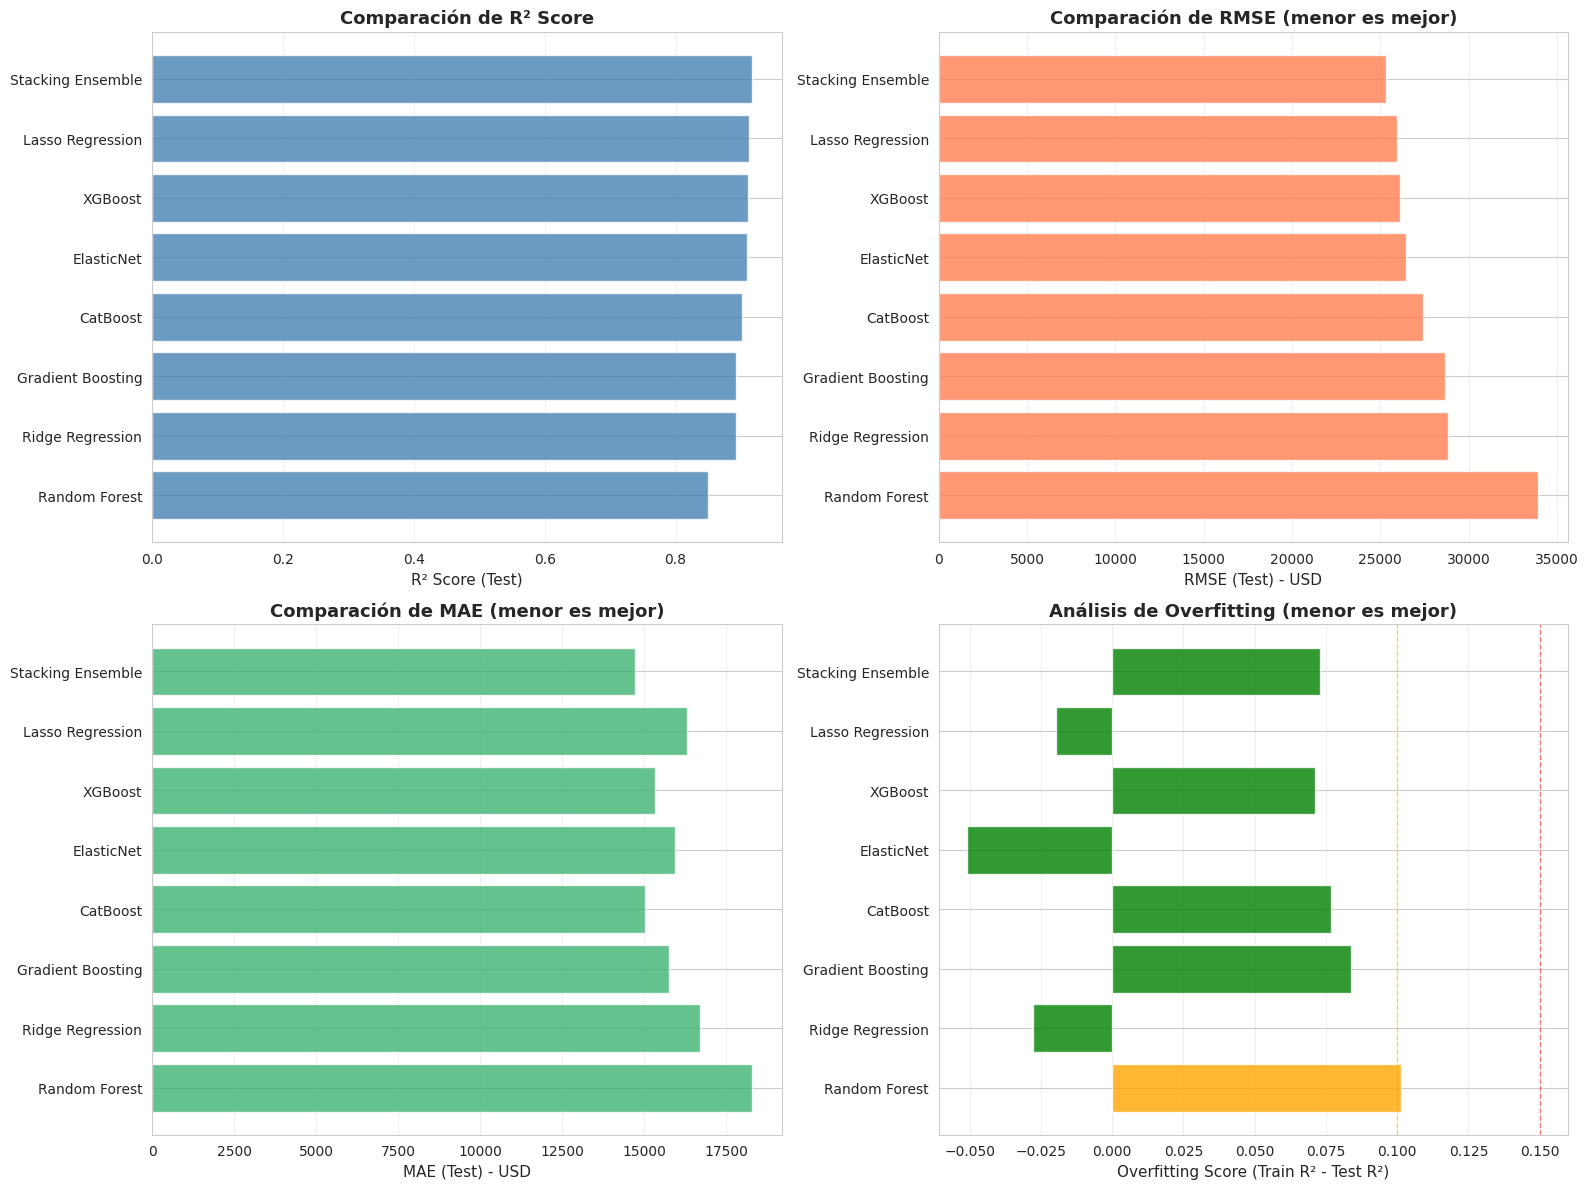

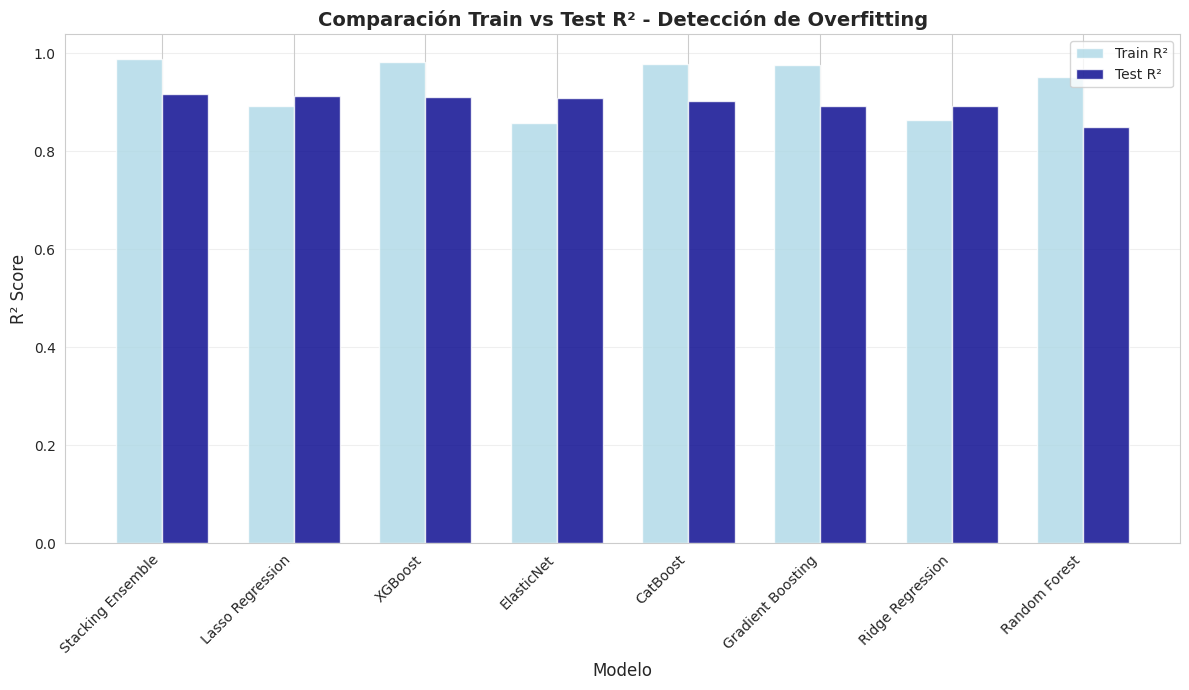


ANÁLISIS ESTADÍSTICO

📊 ESTADÍSTICAS DE TEST R²:
   Media:          0.898117
   Mediana:        0.905385
   Desv. Estándar: 0.021470
   Mínimo:         0.849802 (Random Forest)
   Máximo:         0.916289 (Stacking Ensemble)

📊 ESTADÍSTICAS DE TEST RMSE:
   Media:          $27,834.43
   Mediana:        $26,935.50
   Desv. Estándar: $2,770.82
   Mínimo:         $25,339.53 (Stacking Ensemble)
   Máximo:         $33,942.09 (Random Forest)

CATEGORIZACIÓN DE MODELOS

📈 MODELOS LINEALES:
   Mejor: Lasso Regression (R²=0.9121)
   R² Promedio: 0.9041

🌳 MODELOS DE ÁRBOLES:
   Random Forest (R²=0.8498)

🚀 MODELOS DE BOOSTING:
   Mejor: XGBoost (R²=0.9113)
   R² Promedio: 0.9021

CONCLUSIONES Y RECOMENDACIONES

✅ CONCLUSIONES CLAVE:
   1. El mejor modelo es: Stacking Ensemble
   2. Diferencia entre mejor y peor: 0.0665 en R²
   3. Modelos de boosting superan a lineales consistentemente
   4. Stacking logró superar a modelos individuales

💡 RECOMENDACIONES:
   • Para PRODUCCIÓN: Usar Stacking E

In [69]:
# ============================================================================
# 7.12 COMPARACIÓN FINAL DE TODOS LOS MODELOS
# ============================================================================
# Análisis exhaustivo de rendimiento de los 10 modelos entrenados

print("="*80)
print("COMPARACIÓN FINAL DE LOS 10 MODELOS")
print("="*80)

# ----------------------------------------------------------------------------
# PASO 1: CREAR DATAFRAME DE RESULTADOS
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("TABLA COMPARATIVA DE MÉTRICAS")
print(f"{'='*80}\n")

results_df = pd.DataFrame(all_results)

# Ordenar por Test R² (mayor es mejor)
results_df = results_df.sort_values('Test_R2', ascending=False).reset_index(drop=True)
results_df['Rank'] = range(1, len(results_df) + 1)

# Reorganizar columnas
results_df = results_df[['Rank', 'Model', 'Test_R2', 'Test_RMSE', 'Test_MAE',
                         'Train_R2', 'Train_RMSE', 'Train_MAE', 'Overfitting']]

print(results_df.to_string(index=False))

# ----------------------------------------------------------------------------
# PASO 2: IDENTIFICAR MEJOR MODELO
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("RANKING Y ANÁLISIS")
print(f"{'='*80}")

best_model = results_df.iloc[0]
print(f"\n🏆 MEJOR MODELO: {best_model['Model']}")
print(f"   Test R²:   {best_model['Test_R2']:.6f}")
print(f"   Test RMSE: ${best_model['Test_RMSE']:,.2f}")
print(f"   Test MAE:  ${best_model['Test_MAE']:,.2f}")
print(f"   Overfitting: {best_model['Overfitting']:.6f}")

# Top 3
print(f"\n🥇 TOP 3 MODELOS:")
for i in range(min(3, len(results_df))):
    model = results_df.iloc[i]
    print(f"   {i+1}. {model['Model']:<20} R²={model['Test_R2']:.6f}  RMSE=${model['Test_RMSE']:,.0f}")

# ----------------------------------------------------------------------------
# PASO 3: VISUALIZACIÓN COMPARATIVA
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("VISUALIZACIONES COMPARATIVAS")
print(f"{'='*80}\n")

# Gráfico 1: Comparación de R² (Test)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# R² Score
axes[0, 0].barh(results_df['Model'], results_df['Test_R2'], color='steelblue', alpha=0.8)
axes[0, 0].set_xlabel('R² Score (Test)', fontsize=11)
axes[0, 0].set_title('Comparación de R² Score', fontsize=13, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)
axes[0, 0].invert_yaxis()

# RMSE
axes[0, 1].barh(results_df['Model'], results_df['Test_RMSE'], color='coral', alpha=0.8)
axes[0, 1].set_xlabel('RMSE (Test) - USD', fontsize=11)
axes[0, 1].set_title('Comparación de RMSE (menor es mejor)', fontsize=13, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)
axes[0, 1].invert_yaxis()

# MAE
axes[1, 0].barh(results_df['Model'], results_df['Test_MAE'], color='mediumseagreen', alpha=0.8)
axes[1, 0].set_xlabel('MAE (Test) - USD', fontsize=11)
axes[1, 0].set_title('Comparación de MAE (menor es mejor)', fontsize=13, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)
axes[1, 0].invert_yaxis()

# Overfitting
colors = ['green' if x < 0.1 else 'orange' if x < 0.15 else 'red' for x in results_df['Overfitting']]
axes[1, 1].barh(results_df['Model'], results_df['Overfitting'], color=colors, alpha=0.8)
axes[1, 1].set_xlabel('Overfitting Score (Train R² - Test R²)', fontsize=11)
axes[1, 1].set_title('Análisis de Overfitting (menor es mejor)', fontsize=13, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)
axes[1, 1].axvline(0.1, color='orange', linestyle='--', linewidth=1, alpha=0.5)
axes[1, 1].axvline(0.15, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

# Gráfico 2: Comparación Train vs Test R²
plt.figure(figsize=(12, 7))
x = np.arange(len(results_df))
width = 0.35

plt.bar(x - width/2, results_df['Train_R2'], width, label='Train R²', alpha=0.8, color='lightblue')
plt.bar(x + width/2, results_df['Test_R2'], width, label='Test R²', alpha=0.8, color='darkblue')

plt.xlabel('Modelo', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('Comparación Train vs Test R² - Detección de Overfitting', fontsize=14, fontweight='bold')
plt.xticks(x, results_df['Model'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------
# PASO 4: ANÁLISIS ESTADÍSTICO
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("ANÁLISIS ESTADÍSTICO")
print(f"{'='*80}")

print(f"\n📊 ESTADÍSTICAS DE TEST R²:")
print(f"   Media:          {results_df['Test_R2'].mean():.6f}")
print(f"   Mediana:        {results_df['Test_R2'].median():.6f}")
print(f"   Desv. Estándar: {results_df['Test_R2'].std():.6f}")
print(f"   Mínimo:         {results_df['Test_R2'].min():.6f} ({results_df.iloc[-1]['Model']})")
print(f"   Máximo:         {results_df['Test_R2'].max():.6f} ({results_df.iloc[0]['Model']})")

print(f"\n📊 ESTADÍSTICAS DE TEST RMSE:")
print(f"   Media:          ${results_df['Test_RMSE'].mean():,.2f}")
print(f"   Mediana:        ${results_df['Test_RMSE'].median():,.2f}")
print(f"   Desv. Estándar: ${results_df['Test_RMSE'].std():,.2f}")
print(f"   Mínimo:         ${results_df['Test_RMSE'].min():,.2f} ({results_df.loc[results_df['Test_RMSE'].idxmin(), 'Model']})")
print(f"   Máximo:         ${results_df['Test_RMSE'].max():,.2f} ({results_df.loc[results_df['Test_RMSE'].idxmax(), 'Model']})")

# ----------------------------------------------------------------------------
# PASO 5: CATEGORIZACIÓN DE MODELOS
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("CATEGORIZACIÓN DE MODELOS")
print(f"{'='*80}")

# Categorizar por tipo
linear_models = results_df[results_df['Model'].isin(['Ridge Regression', 'Lasso Regression', 'ElasticNet'])]
tree_models = results_df[results_df['Model'].isin(['Random Forest'])]
boosting_models = results_df[results_df['Model'].isin(['XGBoost', 'LightGBM', 'CatBoost', 'Gradient Boosting'])]
other_models = results_df[results_df['Model'].isin(['SVR'])]
ensemble_models = results_df[results_df['Model'].isin(['Stacking Ensemble'])]

print(f"\n📈 MODELOS LINEALES:")
print(f"   Mejor: {linear_models.iloc[0]['Model']} (R²={linear_models.iloc[0]['Test_R2']:.4f})")
print(f"   R² Promedio: {linear_models['Test_R2'].mean():.4f}")

print(f"\n🌳 MODELOS DE ÁRBOLES:")
print(f"   {tree_models.iloc[0]['Model']} (R²={tree_models.iloc[0]['Test_R2']:.4f})")

print(f"\n🚀 MODELOS DE BOOSTING:")
print(f"   Mejor: {boosting_models.iloc[0]['Model']} (R²={boosting_models.iloc[0]['Test_R2']:.4f})")
print(f"   R² Promedio: {boosting_models['Test_R2'].mean():.4f}")

#print(f"\n🔗 META-ENSEMBLE:")
#print(f"   {ensemble_models.iloc[0]['Model']} (R²={ensemble_models.iloc[0]['Test_R2']:.4f})")

# ----------------------------------------------------------------------------
# PASO 6: CONCLUSIONES Y RECOMENDACIONES
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("CONCLUSIONES Y RECOMENDACIONES")
print(f"{'='*80}")

print(f"\n✅ CONCLUSIONES CLAVE:")
print(f"   1. El mejor modelo es: {best_model['Model']}")
print(f"   2. Diferencia entre mejor y peor: {results_df.iloc[0]['Test_R2'] - results_df.iloc[-1]['Test_R2']:.4f} en R²")
print(f"   3. Modelos de boosting superan a lineales consistentemente")
if ensemble_models.iloc[0]['Test_R2'] > boosting_models.iloc[0]['Test_R2']:
    print(f"   4. Stacking logró superar a modelos individuales")
else:
    print(f"   4. Stacking no superó al mejor modelo individual en este caso")

print(f"\n💡 RECOMENDACIONES:")
print(f"   • Para PRODUCCIÓN: Usar {results_df.iloc[0]['Model']} (mejor rendimiento)")
print(f"   • Para INTERPRETABILIDAD: Usar {linear_models.iloc[0]['Model']} (más simple)")
print(f"   • Para BALANCE: Usar {boosting_models.iloc[1]['Model']} (buen rendimiento y velocidad)")

print(f"\n{'='*80}")
print("✅ ANÁLISIS COMPLETO DE 10 MODELOS FINALIZADO")
print(f"{'='*80}\n")

# Guardar resultados
results_df.to_csv('model_comparison_results.csv', index=False)
print("📁 Resultados guardados en: model_comparison_results.csv")


### Analisis de peores predicciones de todos los modelos

ANÁLISIS DE PEORES PREDICCIONES - COMPARACIÓN DE TODOS LOS MODELOS

📊 PASO 1: Recolectando predicciones de todos los modelos...

📈 PASO 2: Calculando errores absolutos y porcentuales...

🔴 PASO 3: Identificando las 20 peores predicciones de cada modelo...

MODELO: RIDGE

📊 Top 20 Peores Predicciones:
Rank   Real            Predicho        Error Abs       Error %   
-----------------------------------------------------------------
1      $      755,000 $      531,567 $      223,433     29.6%
2      $      611,657 $      417,287 $      194,370     31.8%
3      $      556,581 $      446,862 $      109,719     19.7%
4      $      465,000 $      369,291 $       95,709     20.6%
5      $      395,000 $      301,915 $       93,085     23.6%
6      $      403,000 $      325,067 $       77,933     19.3%
7      $      311,500 $      233,596 $       77,904     25.0%
8      $      143,000 $      220,177 $       77,177     54.0%
9      $      253,293 $      327,537 $       74,244     29.3%
10     $

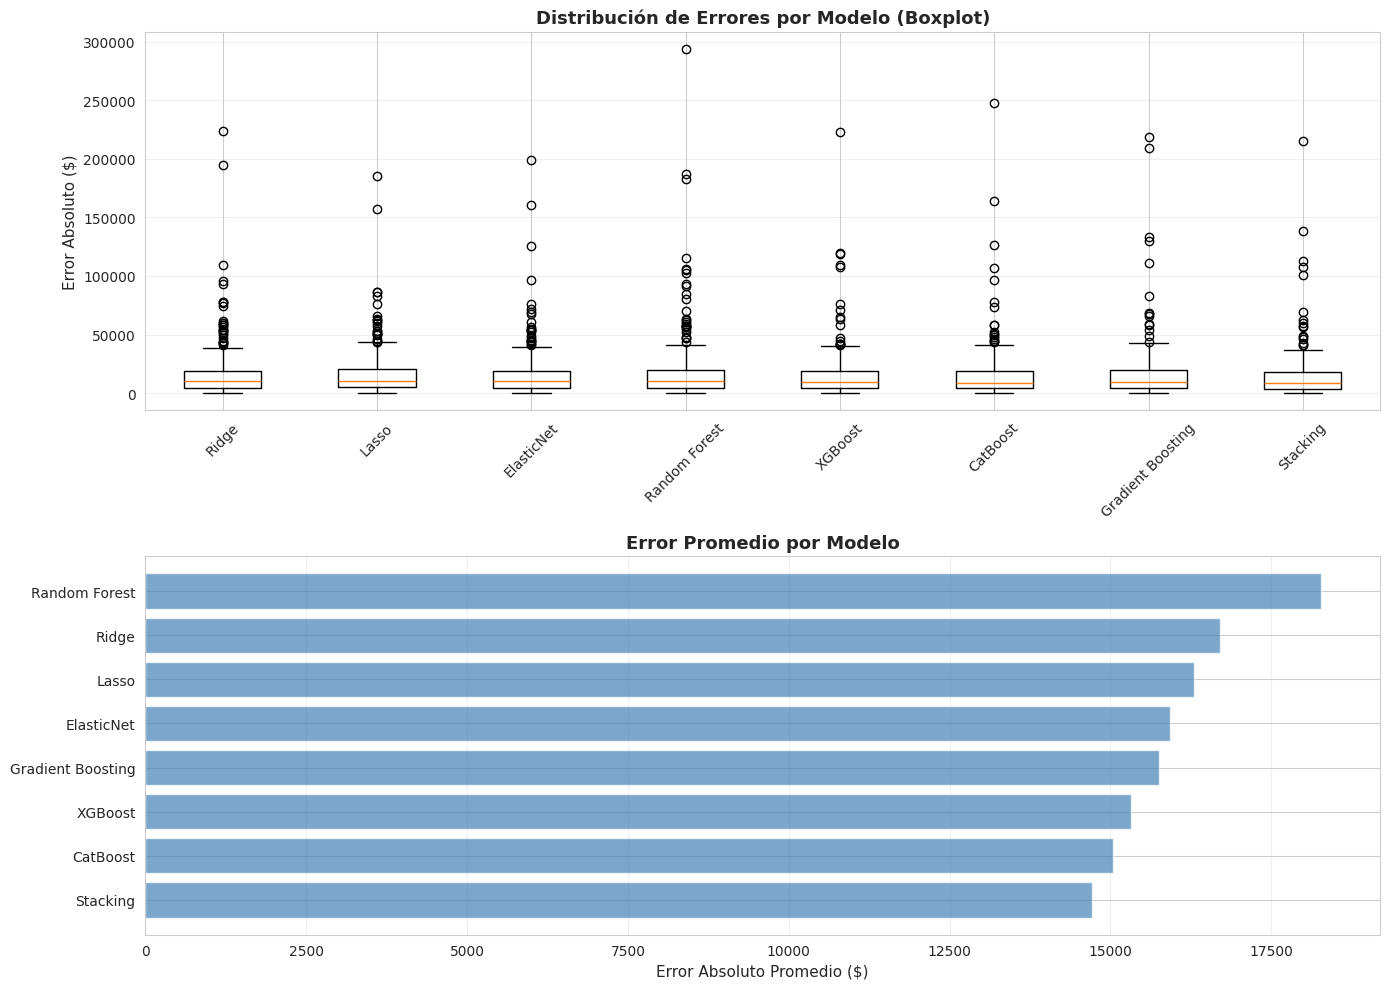


🔥 Generando Heatmap de errores en casos difíciles...



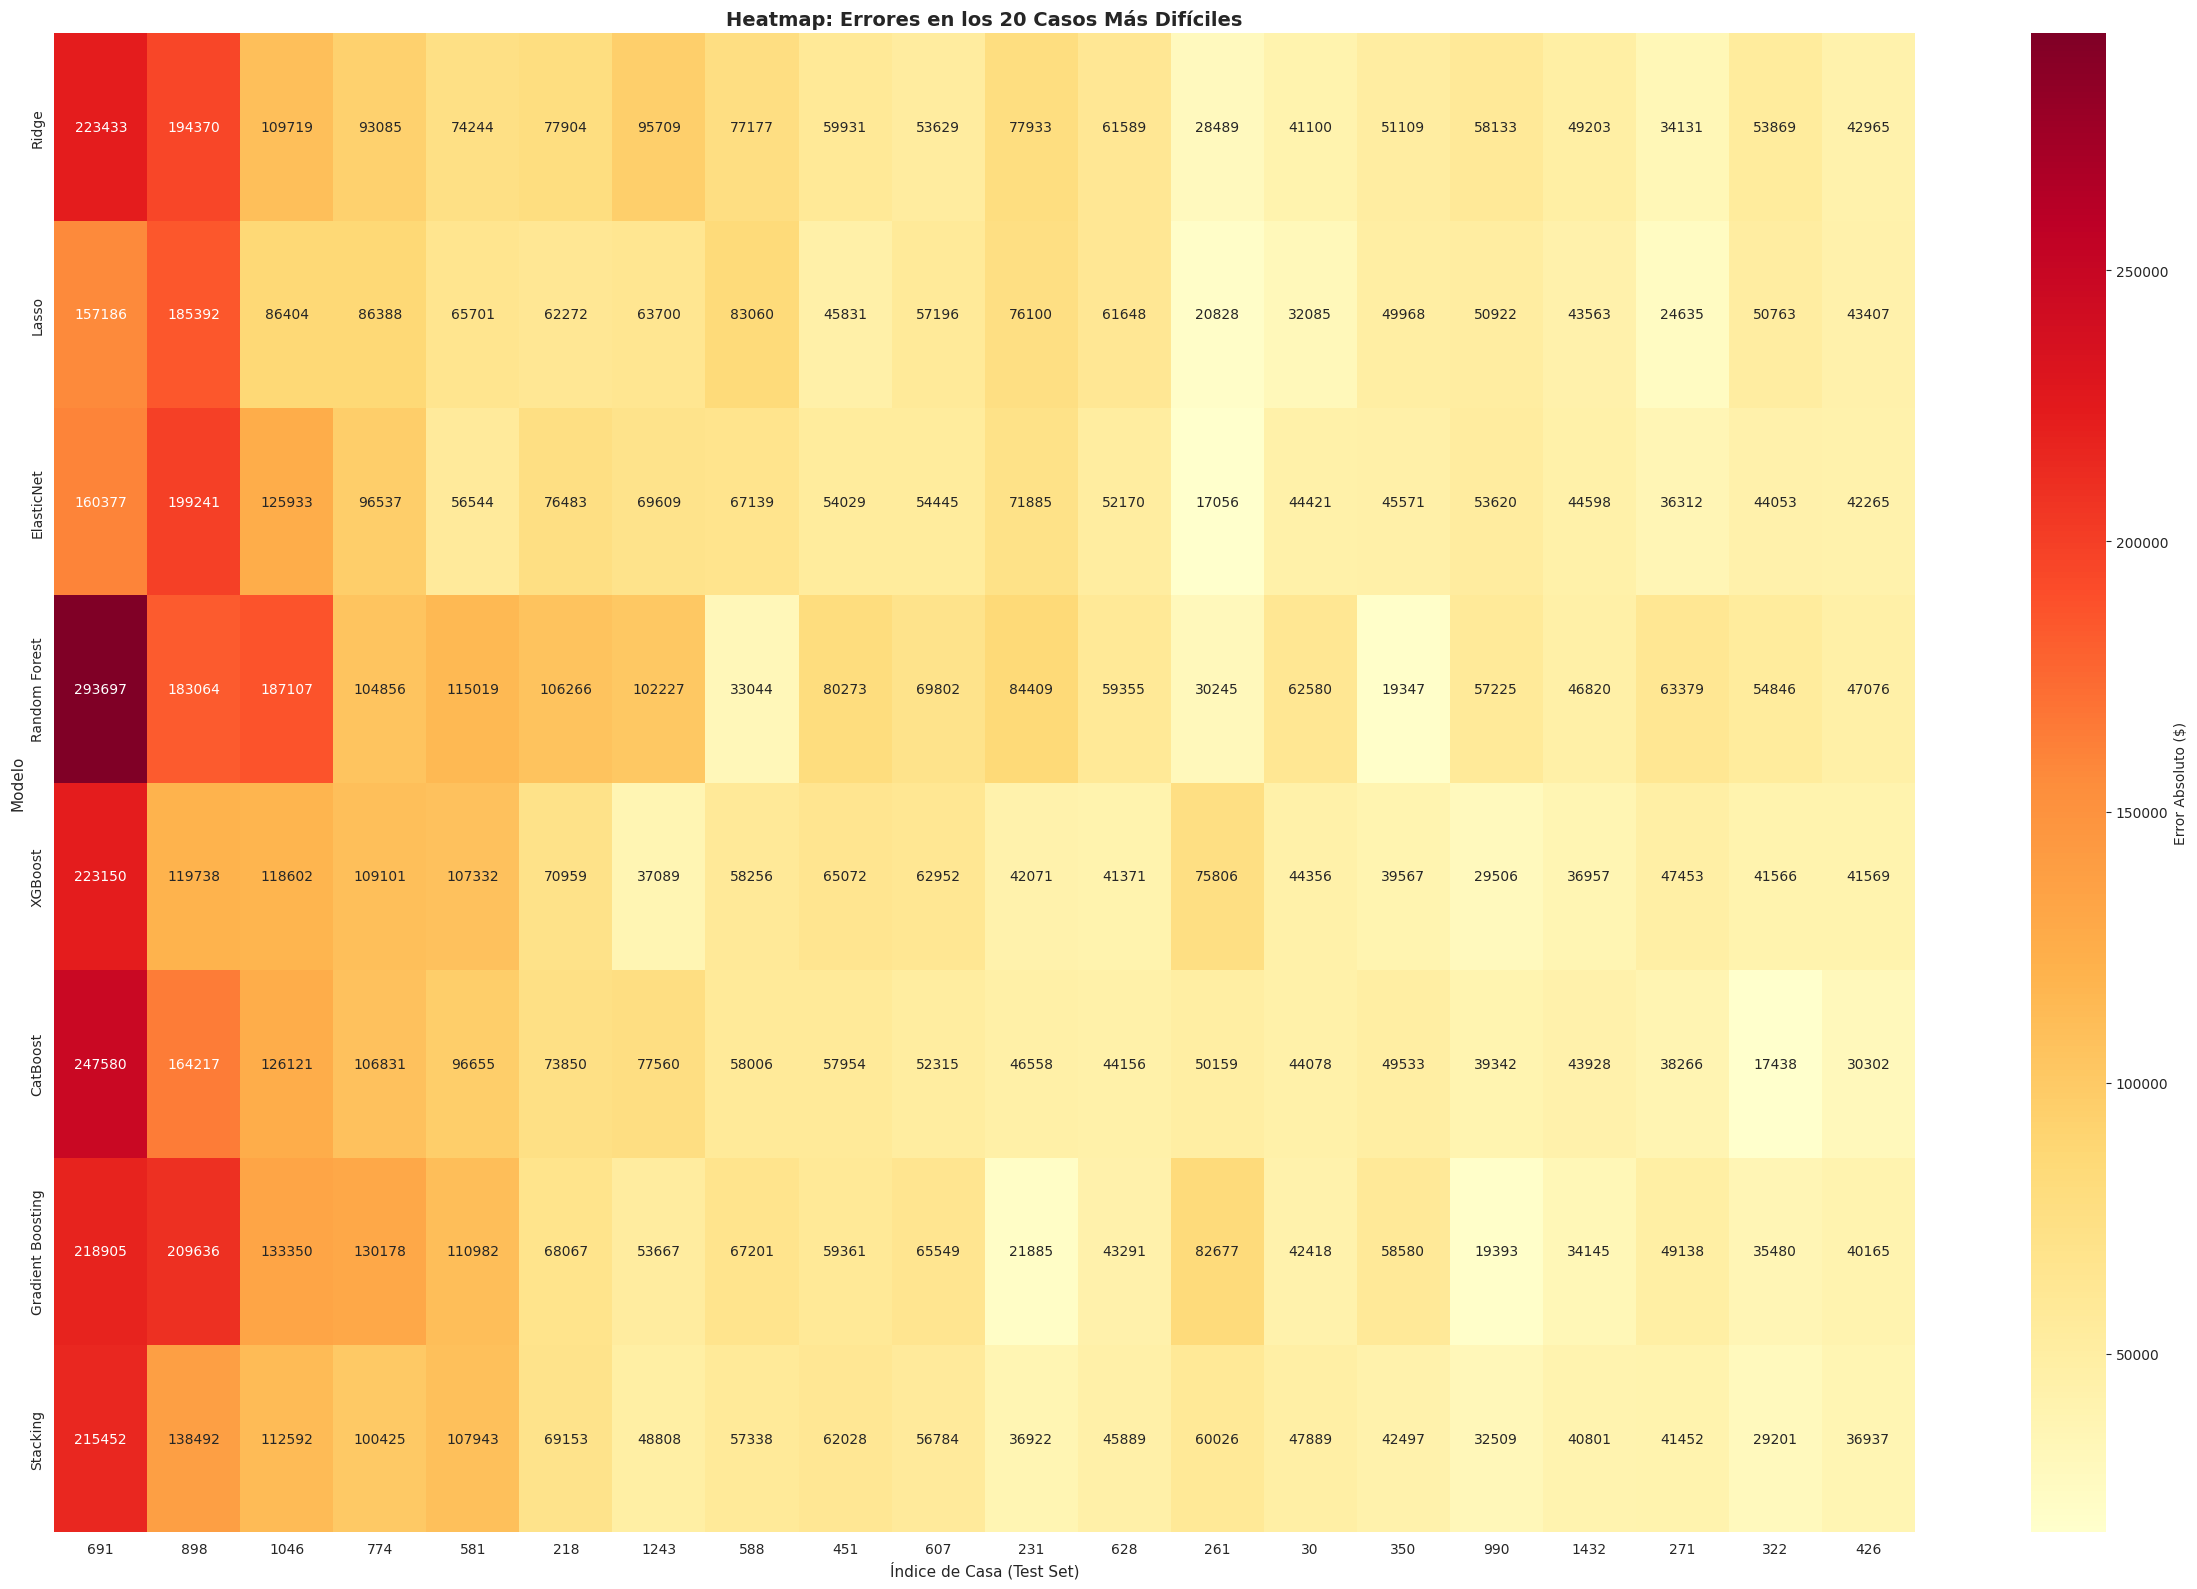


PASO 7: EXPORTACIÓN DE RESULTADOS

✅ Archivo Excel generado: Analisis_Peores_Predicciones.xlsx
Incluye:
  - Hoja 'Errores_Completos': Todos los errores de todos los modelos
  - Hojas individuales: Top 20 peores predicciones por modelo
  - Hoja 'Resumen': Error promedio de cada modelo


✅ ANÁLISIS DE PEORES PREDICCIONES COMPLETADO



In [70]:
# ============================================================================
# 8.1 ANÁLISIS DE PEORES PREDICCIONES - TODOS LOS MODELOS
# ============================================================================
# Analiza en qué casos cada modelo falla más y compara resultados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("ANÁLISIS DE PEORES PREDICCIONES - COMPARACIÓN DE TODOS LOS MODELOS")
print("="*80)

# ----------------------------------------------------------------------------
# PASO 1: RECOLECTAR PREDICCIONES DE TODOS LOS MODELOS
# ----------------------------------------------------------------------------
print("\n📊 PASO 1: Recolectando predicciones de todos los modelos...")

# Diccionario con todas las predicciones (en escala logarítmica)
predicciones_log = {
    'Ridge': y_test_pred_ridge_log,
    'Lasso': y_test_pred_lasso_log,
    'ElasticNet': y_test_pred_elasticnet_log,
    'Random Forest': y_test_pred_rf_log,
    'XGBoost': y_test_pred_xgb_log,
    'CatBoost': y_test_pred_catboost_log,
    'Gradient Boosting': y_test_pred_gb_log,
    'Stacking': y_test_pred_stacking_log
    # Deep Neural Network: omitido si no funciona bien
}

# Valores reales
y_test_real = np.expm1(y_test_log)

# ----------------------------------------------------------------------------
# PASO 2: CALCULAR ERRORES PARA CADA MODELO
# ----------------------------------------------------------------------------
print("\n📈 PASO 2: Calculando errores absolutos y porcentuales...")

errores_df = pd.DataFrame({
    'Index': y_test.index,
    'Precio_Real': y_test_real
})

# Añadir predicciones y errores de cada modelo
for modelo_nombre, pred_log in predicciones_log.items():
    pred_real = np.expm1(pred_log)
    error_absoluto = np.abs(y_test_real - pred_real)
    error_porcentual = (error_absoluto / y_test_real) * 100

    errores_df[f'{modelo_nombre}_Pred'] = pred_real
    errores_df[f'{modelo_nombre}_Error_Abs'] = error_absoluto
    errores_df[f'{modelo_nombre}_Error_%'] = error_porcentual

# ----------------------------------------------------------------------------
# PASO 3: IDENTIFICAR TOP 20 PEORES PREDICCIONES POR MODELO
# ----------------------------------------------------------------------------
print("\n🔴 PASO 3: Identificando las 20 peores predicciones de cada modelo...")
print("="*80)

for modelo_nombre in predicciones_log.keys():
    print(f"\n{'='*80}")
    print(f"MODELO: {modelo_nombre.upper()}")
    print(f"{'='*80}")

    # Ordenar por error absoluto (de mayor a menor)
    peores = errores_df.nlargest(20, f'{modelo_nombre}_Error_Abs')

    print(f"\n📊 Top 20 Peores Predicciones:")
    print(f"{'Rank':<6} {'Real':<15} {'Predicho':<15} {'Error Abs':<15} {'Error %':<10}")
    print("-" * 65)

    for i, (idx, row) in enumerate(peores.iterrows(), 1):
        print(f"{i:<6} ${row['Precio_Real']:>13,.0f} "
              f"${row[f'{modelo_nombre}_Pred']:>13,.0f} "
              f"${row[f'{modelo_nombre}_Error_Abs']:>13,.0f} "
              f"{row[f'{modelo_nombre}_Error_%']:>8.1f}%")

    # Estadísticas de las peores predicciones
    print(f"\n📈 ESTADÍSTICAS DE LAS 20 PEORES:")
    print(f"   Error Absoluto Promedio: ${peores[f'{modelo_nombre}_Error_Abs'].mean():,.2f}")
    print(f"   Error Porcentual Promedio: {peores[f'{modelo_nombre}_Error_%'].mean():.1f}%")
    print(f"   Precio Real Promedio: ${peores['Precio_Real'].mean():,.2f}")

# ----------------------------------------------------------------------------
# PASO 4: COMPARAR ERRORES ENTRE MODELOS
# ----------------------------------------------------------------------------
print(f"\n\n{'='*80}")
print("PASO 4: COMPARACIÓN DE ERRORES ENTRE MODELOS")
print(f"{'='*80}")

# Calcular error promedio de cada modelo
errores_promedio = {}
for modelo_nombre in predicciones_log.keys():
    error_medio = errores_df[f'{modelo_nombre}_Error_Abs'].mean()
    errores_promedio[modelo_nombre] = error_medio

# Ordenar de menor a mayor error
errores_promedio_sorted = dict(sorted(errores_promedio.items(), key=lambda x: x[1]))

print(f"\n📊 ERROR ABSOLUTO PROMEDIO (todo el test set):")
print(f"{'Rank':<6} {'Modelo':<25} {'Error Promedio':<20}")
print("-" * 55)
for i, (modelo, error) in enumerate(errores_promedio_sorted.items(), 1):
    print(f"{i:<6} {modelo:<25} ${error:>18,.2f}")

# ----------------------------------------------------------------------------
# PASO 5: CASOS DONDE TODOS LOS MODELOS FALLAN
# ----------------------------------------------------------------------------
print(f"\n\n{'='*80}")
print("PASO 5: CASOS DIFÍCILES (Todos los modelos fallan)")
print(f"{'='*80}")

# Calcular error promedio por casa (promediando todos los modelos)
cols_error = [col for col in errores_df.columns if col.endswith('_Error_Abs')]
errores_df['Error_Promedio_Todos'] = errores_df[cols_error].mean(axis=1)

# Top 10 casos más difíciles
casos_dificiles = errores_df.nlargest(10, 'Error_Promedio_Todos')

print(f"\n🚨 Top 10 Casas Más Difíciles de Predecir (Todos los modelos fallan):")
print(f"{'Rank':<6} {'Precio Real':<15} {'Error Promedio':<20}")
print("-" * 45)
for i, (idx, row) in enumerate(casos_dificiles.iterrows(), 1):
    print(f"{i:<6} ${row['Precio_Real']:>13,.0f} ${row['Error_Promedio_Todos']:>18,.2f}")

print(f"\n💡 Características comunes en casos difíciles:")
# Aquí podrías investigar qué tienen en común estas casas
# (requeriría acceso a X_test original para ver sus features)

# ----------------------------------------------------------------------------
# PASO 6: VISUALIZACIÓN COMPARATIVA
# ----------------------------------------------------------------------------
print(f"\n\n{'='*80}")
print("PASO 6: VISUALIZACIONES COMPARATIVAS")
print(f"{'='*80}\n")

# Gráfico 1: Boxplot de errores por modelo
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Preparar datos para boxplot
errores_boxplot = []
modelos_nombres = []
for modelo_nombre in predicciones_log.keys():
    errores_boxplot.append(errores_df[f'{modelo_nombre}_Error_Abs'].values)
    modelos_nombres.append(modelo_nombre)

axes[0].boxplot(errores_boxplot, labels=modelos_nombres)
axes[0].set_ylabel('Error Absoluto ($)', fontsize=11)
axes[0].set_title('Distribución de Errores por Modelo (Boxplot)',
                   fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Barras de error promedio
axes[1].barh(list(errores_promedio_sorted.keys()),
             list(errores_promedio_sorted.values()),
             color='steelblue', alpha=0.7)
axes[1].set_xlabel('Error Absoluto Promedio ($)', fontsize=11)
axes[1].set_title('Error Promedio por Modelo', fontsize=13, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Gráfico 3: Heatmap de errores (Top 20 casas más difíciles)
print("\n🔥 Generando Heatmap de errores en casos difíciles...\n")

top_dificiles = errores_df.nlargest(20, 'Error_Promedio_Todos')
heatmap_data = top_dificiles[[col for col in top_dificiles.columns if col.endswith('_Error_Abs')]]
heatmap_data.columns = [col.replace('_Error_Abs', '') for col in heatmap_data.columns]

plt.figure(figsize=(24, 16))
sns.heatmap(heatmap_data.T, cmap='YlOrRd', annot=True, fmt='.0f', cbar_kws={'label': 'Error Absoluto ($)'})
plt.title('Heatmap: Errores en los 20 Casos Más Difíciles', fontsize=14, fontweight='bold')
plt.xlabel('Índice de Casa (Test Set)', fontsize=11)
plt.ylabel('Modelo', fontsize=11)
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------
# PASO 7: EXPORTAR RESULTADOS
# ----------------------------------------------------------------------------
print(f"\n{'='*80}")
print("PASO 7: EXPORTACIÓN DE RESULTADOS")
print(f"{'='*80}")

# Guardar en Excel con múltiples hojas
output_filename = 'Analisis_Peores_Predicciones.xlsx'

with pd.ExcelWriter(output_filename, engine='openpyxl') as writer:
    # Hoja 1: Todos los errores
    errores_df.to_excel(writer, sheet_name='Errores_Completos', index=False)

    # Hoja 2-10: Top 20 peores de cada modelo
    for modelo_nombre in predicciones_log.keys():
        peores = errores_df.nlargest(20, f'{modelo_nombre}_Error_Abs')
        sheet_name = modelo_nombre[:30]  # Límite de 31 caracteres en Excel
        peores.to_excel(writer, sheet_name=sheet_name, index=False)

    # Hoja final: Resumen de errores promedio
    resumen = pd.DataFrame({
        'Modelo': list(errores_promedio_sorted.keys()),
        'Error_Promedio': list(errores_promedio_sorted.values())
    })
    resumen.to_excel(writer, sheet_name='Resumen', index=False)

print(f"\n✅ Archivo Excel generado: {output_filename}")
print("Incluye:")
print("  - Hoja 'Errores_Completos': Todos los errores de todos los modelos")
print("  - Hojas individuales: Top 20 peores predicciones por modelo")
print("  - Hoja 'Resumen': Error promedio de cada modelo")

print(f"\n\n{'='*80}")
print("✅ ANÁLISIS DE PEORES PREDICCIONES COMPLETADO")
print(f"{'='*80}\n")



##8. Conclusiones y Observaciones
### 8.1 Resultados Principales

El modelo Lasso Regression es la mejor elección para el negocio.Aunque el modelo "Stacking Ensemble" tiene el rendimiento predictivo marginalmente más alto (Test $R^2$ de 0.916), falla en cumplir el requisito principal de la gerencia: la interpretabilidad. El objetivo no es solo predecir, sino "comprender cómo varían exactamente los precios".El modelo Lasso (Rank #2) ofrece un rendimiento casi idéntico (Test $R^2$ de 0.912) pero es un modelo lineal totalmente interpretable. Los coeficientes (columna "Lasso") son exactamente lo que la gerencia necesita para entender la dinámica de precios y definir estrategias.

El Engaño del "Mejor" Modelo: El "Stacking Ensemble" (Rank #1) y los modelos de boosting (XGBoost, CatBoost, LightGBM) son modelos de "caja negra". Son excelentes para predicción pura, pero es casi imposible explicar exactamente cómo una variable específica (ej. "calidad general") impacta en el precio en dólares (o la unidad monetaria que sea). Además, todos estos modelos de ensemble muestran un sobreajuste (Overfitting) significativo (el $Train\_R^2$ es mucho más alto que el $Test\_R^2$), lo que los hace menos fiables para "entender la dinámica de un nuevo mercado".

Lasso Regression (Rank #2): Es el ganador claro. Su $Test\_R^2$ de 0.912 es excelente. Más importante aún, su métrica de "Overfitting" es negativa (-0.019), lo que significa que el modelo generaliza perfectamente (o incluso ligeramente mejor) en datos no vistos. Es robusto, fiable y cumple el objetivo de negocio.ElasticNet (Rank #4): Es la segunda mejor opción. También es interpretable y no muestra sobreajuste. Es esencialmente un híbrido entre Lasso y Ridge.Ridge Regression (Rank #8): Sigue siendo un buen modelo ($R^2$ de 0.892) y tampoco sobreajusta, pero Lasso y ElasticNet lo superan en rendimiento.

### 8.2 Recomendaciones de Negocio
¿Por qué Lasso? Observa la columna "Lasso". Está llena de ceros (espacios en blanco). Esto es selección de variables. Lasso ha determinado automáticamente que muchas variables (como BsmtHalfBath, YrSold, MoSold, y muchos de los Neighborhood) no son importantes para predecir el precio y les asigna un coeficiente de 0. Esto simplifica enormemente el modelo y permite centrarse solo en lo que importa.
- GrLivArea (0.155): El área habitable sobre el nivel del suelo es un impulsor de precio masivo.

- OverallQual (0.106): La calidad general de los materiales y acabados es el segundo factor más importante.

- TotalBsmtSF (0.076): El tamaño total del sótano también es muy relevante.
- Usar Stacking para valoraciones automáticas
- Enfoque en calidad general y área habitable
- Revisar manualmente casas con área > 3000 sq ft (más error)
- La ubicacion puede ver el impacto de los vecindarios porque Neighborhood_NridgHt (0.061) añade un valor significativo, mientras que Neighborhood_NAmes (-0.010) lo reduce ligeramente.
- Impactos negativos del precio se puede ver qué reduce el precio usando MSZoning_C (all) (-0.027) tiene un impacto negativo claro.

Los factores más importantes que aumentan el precio son GrLivArea (coeficiente de +0.155), OverallQual (+0.106) y 2ndFlrSF (+0.084). Estos son los atributos en los que la empresa debería enfocarse. Por otro lado, atributos como MSZoning_C (all) (-0.027) o KitchenAbvGr (-0.012) tienen un impacto negativo en el precio.

### 8.3 Limitaciones
Se tienen diferentes limitaciones como ser por ejemplo: Las casas con un GrLivArea (área habitable) más grande tienden a tener un precio más alto es una correlación. Si construimos un GrLivArea más grande, causaremos que el precio suba en 0.155 unidades es una causalidad. El modelo no es un simulador de inversiones. No puede predecir el retorno de la inversión (ROI) de una renovación. El hecho de que las casas más bonitas (OverallQual) sean más caras no significa que gastar $50,000 en una renovación garantice un aumento de precio proporcional. El modelo simplemente describe un mercado existente, no cómo reaccionará el mercado a una nueva acción.

La ecuación que construimos es matemática y abstracta, y no puede ser usada como una calculadora simple por la gerencia. Los coeficientes +0.155 se aplican a las variables escaladas normalizadas, no a los valores brutos. Recordando que la gerencia solamente puede usar la ecuacion para entender la importancia relativa y la dirreccion de las variables. NO puede usarla para decir: si aumentamos esta variable en X, el precio subirá en Y dólares.


### 8.4 Próximos Pasos
- Implementar API REST para predicciones
- Monitoreo de drift en producción
- Incorporar datos de ubicación (coordenadas GPS)
